In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import matplotlib.font_manager
import random 
from matplotlib import rcParams, cm
import scipy.stats as ss
import h5py
import glob
import seaborn as sns
import time
import os
import itertools
import timeit
import networkx as nx
import collections 
import scipy.io
from matplotlib import gridspec 
#For ROI Maps
from scipy.io import loadmat
from skimage import measure
from scipy import ndimage

#For Fitting Baselines
from scipy.optimize import curve_fit

#For Clustering
from sklearn.cluster.bicluster import SpectralBiclustering

/home/hanlabadmins/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.bicluster module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
%matplotlib inline

In [3]:
#matplotlib.font_manager._rebuild()
#Set matplotlib fonts for figures
rcParams['font.family'] = 'Arial'

## Last day of training/extinction 

In [4]:
def makeAliFilenames(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                if ((m_day != 2) | (m_sess != 2)): #Skip d2_s2.  Only do d5_s2
                    mouse_dir = 'ali{}_d{}_s{}/'.format(m_num, m_day, m_sess)
                    directories.append(mouse_dir)
                    if m_day == 2:
                        filenames[mouse_dir] = 'trace_kyleFinalwDoughnut_AllBGs_BinaryVideo.hdf5'
                    else:
                        filenames[mouse_dir] = 'trace_kyleFinalwDoughnut_AllBGs_matched_BinaryVideo.hdf5'
    return directories, filenames

In [5]:
def makeAliFilenames_modified(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                if ((m_day != 2) | (m_sess != 2)): #Skip d2_s2.  Only do d5_s2
                    mouse_dir = 'ali{}_d{}_s{}/'.format(m_num, m_day, m_sess)
                    directories.append(mouse_dir)
                    filenames[mouse_dir] = 'binary_traces.h5'
                   
    return directories, filenames

In [6]:
def makeRebeccaFilenames(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                mouse_dir = '{}/{}_d{}_s{}/'.format(m_num, m_num, m_day, m_sess)
                directories.append(mouse_dir)
                filenames[mouse_dir] = 'trace_kyleFinal_BinaryVideo.hdf5'
    return directories, filenames

In [7]:
def makeRebeccaFilenames_modified(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                mouse_dir = '{}/{}_d{}_s{}/'.format(m_num, m_num, m_day, m_sess)
                directories.append(mouse_dir)
                filenames[mouse_dir] = 'binary_traces.h5'
    return directories, filenames

In [8]:
def combineFilenames(base, dirs, fnDict):
    #Combine Filenames into list for multiple directories with a common base.  fnDict is a dictionary of the filename for each directory
    outFiles = []
    for d in dirs:
        outFiles.append(os.path.join(base+d+fnDict[d]))
    return outFiles

In [9]:
#Initialize Input Values
#Ali Mice
aliBase = '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/'
aliMice, aliDays, aliSessions = ([24, 25, 26], [2,5], [1, 2])
aliFolders, aliFilenames = makeAliFilenames(aliMice, aliDays, aliSessions)
aliFiles = combineFilenames(aliBase, aliFolders, aliFilenames)
#Rebecca Mice
rBase = '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/'

rMice, rDays, rSessions = ([2982,4540], [1,9], [1])
rFolders, rFilenames = makeRebeccaFilenames(rMice, rDays, rSessions)
rFiles = combineFilenames(rBase, rFolders, rFilenames)
#New Rebecca Mice
nrBase = '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/'
nrMice, nrDays, nrSessions = ([2712, 2713,2714,8089], [1, 5], [1]) #Also have 2 as full imaging session.  Drop 2714 because of data quality
nrFolders, nrFilenames = makeRebeccaFilenames(nrMice, nrDays, nrSessions)
nrFiles = combineFilenames(nrBase, nrFolders, nrFilenames)
#Combine All Filenames into one List
allFiles = aliFiles + rFiles + nrFiles
print(allFiles)

['/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali24_d2_s1/trace_kyleFinalwDoughnut_AllBGs_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali24_d5_s1/trace_kyleFinalwDoughnut_AllBGs_matched_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali24_d5_s2/trace_kyleFinalwDoughnut_AllBGs_matched_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali25_d2_s1/trace_kyleFinalwDoughnut_AllBGs_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali25_d5_s1/trace_kyleFinalwDoughnut_AllBGs_matched_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali25_d5_s2/trace_kyleFinalwDoughnut_AllBGs_matched_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali26_d2_s1/trace_kyleFinalwDoughnut_AllBGs_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali26_d5_s1/trace_kyleFinalwDoughnut_AllBGs_matched_BinaryVide

### Load behavior data 

In [10]:
def loadFiles(allFiles, fieldName, whichData=None, multiIndex=False, fixedSize=None):
    #Get File Inputs
    firstf = allFiles[0]
    firstdir = firstf.split('/')[-2]
    f = h5py.File(firstf, 'r')
    if multiIndex: #Adjust indexing for first DataFrame if using a multi-index
        first_array = np.array(f[fieldName]).T
        index_iterables = [[firstdir], range(first_array.shape[1])]
        index = pd.MultiIndex.from_product(index_iterables, names=['mouse','cell_num'])
        df = pd.DataFrame(data=first_array, columns=index)
    else:
        if fixedSize == None:
            df = pd.DataFrame(data=np.array(f[fieldName]).T, columns=[firstdir])
        else:
            df = pd.DataFrame(data=np.array(f[fieldName]).T[:(fixedSize)], columns=[firstdir])
    
    df.index.name='Time'
    df_size = df.shape[0] #Determine Size of DataFrame
    for f in allFiles[1:]: #Loop through remaining files and add to DataFrame
        fdir = f.split('/')[-2] #Current Filename/Dir
        f = h5py.File(f, 'r')
        if multiIndex: #Iteratively add multiIndexed DataFrames
            data_arr = np.array(f[fieldName]).T
            index_iterables = [[fdir], range(data_arr.shape[1])]
            index = pd.MultiIndex.from_product(index_iterables, names=['mouse', 'cell_num'])
            df = df.join(pd.DataFrame(data=data_arr, columns=index))
        else:
            #print(f)
            #print(df.shape)
            #print(df_size)
            #print(np.array(f[fieldName]).T.shape)
            try: #Standard Loading
                df.loc[:,fdir] = np.array(f[fieldName]).T 
            except ValueError: #Exception cases where behavior was different size from other behavior sessions
                if (whichData == 'Ali'): #Ali26_d5_s2 and Ali25_d5_s2 are one frame short
                    df.loc[:,fdir] = np.insert(np.array(f[fieldName]).T, 0, np.array(f[fieldName]).T.mean())
                elif np.array(f[fieldName]).T.shape[0]<df_size:
                    temp = np.array(f[fieldName]).T
                    df.loc[:,fdir] = np.append(temp, temp.mean().reshape(1,-1), axis=0)
                elif (whichData == 'Rebecca'): #2982_d9_s1 is one frame longer
                    new_size = np.array(f[fieldName]).shape[1]
                    diff_size = abs(new_size-df_size)
                    df.loc[:,fdir] = np.array(f[fieldName]).T[:-diff_size]
    drop_index = df.index[df.isna().any(axis='columns')]
    df = df.drop(drop_index)
    return df

In [11]:
aliSounds = loadFiles(aliFiles, 'binSounds', whichData='Ali')
rSounds = loadFiles(rFiles, 'binSounds', whichData='Rebecca')
nrSounds = loadFiles(nrFiles, 'binSounds', whichData='Rebecca', fixedSize=39500)
sound_traces = pd.concat([aliSounds,rSounds,nrSounds], axis=1)

In [12]:
aliPuffs = loadFiles(aliFiles, 'binPuffs', whichData='Ali')
rPuffs = loadFiles(rFiles, 'binPuffs', whichData='Rebecca')
nrPuffs = loadFiles(nrFiles, 'binPuffs', whichData='Rebecca', fixedSize=39500)
puff_traces = pd.concat([aliPuffs,rPuffs,nrPuffs], axis=1)

In [13]:
aliTrials = loadFiles(aliFiles, 'binTrials', whichData='Ali')
rTrials = loadFiles(rFiles, 'binTrials', whichData='Rebecca')
nrTrials = loadFiles(nrFiles, 'binTrials', whichData='Rebecca', fixedSize=39500)
trial_traces = pd.concat([aliTrials,rTrials,nrTrials], axis=1)

In [14]:
aliEyeTraces = loadFiles(aliFiles, 'eyeTrace', whichData='Ali')
rEyeTraces = loadFiles(rFiles, 'eyeTrace', whichData='Rebecca')
nrEyeTraces = loadFiles(nrFiles, 'eyeTrace', whichData='Rebecca', fixedSize=39500)
eye_traces = pd.concat([aliEyeTraces,rEyeTraces,nrEyeTraces], axis=1)

In [15]:
def linear_func(x, a, b):
    return a*x + b

In [16]:
def curve_fit_wrapper(y, x, func):
    #Wrap curve_fit to match Pandas DataFrame Use and return only parameters, not covariance
    return curve_fit(func, x, y)[0]

In [17]:
def generate_line_wrapper(params, x, func):
    #Apply Funcion in a way that works with Pandas DataFrame
    return func(x, *params)

In [18]:
def pick_thresh_idx_wrapper(bool_arr):
    return bool_arr.index[bool_arr == True][-1]

In [19]:
def calcThresholds(trace_df, drop_thresh, pct_fit, make_plots):
    #Calculate thresholds for each trace by removing linearized value
    #Sort each trace
    sorted_traces = trace_df.apply(np.sort, axis=0)
    #Calculate indexes for use
    Ntot = sorted_traces.shape[0]
    Nhalf = np.floor(Ntot/2).astype(int)
    Nfit = np.floor(Ntot * pct_fit).astype(int)
    fit_start = np.floor((Ntot-Nfit)/2).astype(int)
    fit_end = Ntot-fit_start
    #Generate X Data and Fit Line
    x_tot = np.arange(0, Ntot)
    fitted_params = sorted_traces.loc[fit_start:fit_end,:].apply(curve_fit_wrapper, args=(x_tot[fit_start:(fit_end+1)], linear_func)) #Add 1 to fit end because of np/pd differences in indexing
    fit_lines = fitted_params.apply(generate_line_wrapper, args=(x_tot, linear_func))
    #Adjust traces by fit line and determine thresholds
    shift_traces = sorted_traces.subtract(fit_lines)
    half_thresh = (shift_traces < drop_thresh).loc[:Nhalf,:]
    thresh_idxs = half_thresh.apply(pick_thresh_idx_wrapper)
    pick_thresh = []
    for idx, col in zip(thresh_idxs, thresh_idxs.index):
        pick_thresh.append(sorted_traces.loc[idx, col])
    if make_plots: #Make Plots of Interest
        #Fixed Plot Parameters
        maxWidth = 3.
        #Dynamic Parameters
        Nplots = sorted_traces.shape[1]
        layoutR, layoutC = [np.ceil(Nplots/maxWidth).astype(int), int(min(Nplots, maxWidth))]
        all_ax = sorted_traces.plot(subplots=True, figsize=(9,layoutR*5), layout=(layoutR, layoutC), legend=False)
        step=0
        for ax_row in all_ax:
            for sel_ax in ax_row:
                fit_lines.iloc[:,step].plot(ax=sel_ax, legend=True, linestyle='--', color='k')
                step+=1
    return pd.DataFrame(data=np.array(pick_thresh).reshape(1,-1), columns=thresh_idxs.index.tolist())

In [20]:
def findPulses(inputTrace):
    #Find location of onset and offset of pulses
    #inputTrace = 1-D Numpy Array Trace of values assumed to be similar to a train of ttl pulses, where there is a clear onset and offset for each pulse.
    #locationTrace = Pseudo-logical 1-D trace, with 1s at pulse onset, and -1s at pulse offset, and 0s everywhere else
    
    shiftedInput = inputTrace - inputTrace.mean() #Shift to have mean 0 and baseline below 0
    changes = np.sign(shiftedInput) #Find where sign changes
    locationTrace = np.zeros(inputTrace.shape); #Initialize Output
    #locationTrace = np.zeros((behav_df.shape[0]+1,behav_df.shape[1]))
    diffArray = np.diff(changes)
    locationTrace[np.insert(diffArray==2,0,0)] = 1 #Set onsets to 1
    locationTrace[np.insert(diffArray==-2,0,0)] = -1 #Set offsets to -1
    return locationTrace

In [21]:
def makeBehavTrialBlocks(trace_df, behav_df):
    #Make Blocks of Trials for plain index behavior, and return df with those trial blocks removed
    #Pre-defined Values
    tot_block_time = 201 #201 timepoints is about 10 seconds
    before_sound_time = 40 #40 timepoints before the puff 2 seconds
    after_sound_time = tot_block_time - before_sound_time - 1 #Time after sound.  Subtract 1 as index between before sound and after sound is included as "spot"
    #Shorten behav_df to length of trace_df
    behav_length = behav_df.shape[0]
    trace_length = trace_df.shape[0]
    if behav_length > trace_length:
        behav_df = behav_df.loc[:(trace_length-1),:]
    #Make Trial Blocks for Each Mouse
    trace_blocks=[]
    trace_noBlocks_df = trace_df.copy()
    for mouse in trace_df:
        soundPulses = findPulses(behav_df.loc[:,mouse])
        sound_on_inds = behav_df.index[soundPulses == 1]
        if sound_on_inds[-1]+after_sound_time > trace_df.loc[:,mouse].shape[0]: #Get rid of last pulse on at end of recording
            sound_on_inds = sound_on_inds[:-1]
        cur_block = np.zeros((sound_on_inds.shape[0], tot_block_time))
        for idx, spot in enumerate(sound_on_inds):
            cur_block[idx,:] = trace_df.loc[(spot-before_sound_time):(spot+after_sound_time),mouse].values
            trace_noBlocks_df.loc[:, mouse] = trace_noBlocks_df.loc[:, mouse].drop(range((spot-before_sound_time), (spot+after_sound_time)))
        trace_blocks.append(cur_block)
    return np.stack(trace_blocks), trace_noBlocks_df.dropna().reset_index(drop=True)

In [22]:
def norm_MA_block(trace_df, windSize, sounds):
    #Normalize traces, take moving window of windSize, and make trial blocks
    norm_df = (trace_df - trace_df.mean(axis=0)) / trace_df.mean(axis=0)
    wind_df = norm_df.subtract(norm_df.rolling(windSize).mean())
    blocks, allButBlocks = makeBehavTrialBlocks(wind_df, sounds)
    return blocks, allButBlocks

In [23]:
aliEyeBlocks, aliAllButEyeBlocks = norm_MA_block(aliEyeTraces, 20, aliSounds)
rEyeBlocks, rAllButEyeBlocks = norm_MA_block(rEyeTraces, 20, rSounds)
nrEyeBlocks, nrAllButEyeBlocks = norm_MA_block(nrEyeTraces, 20, nrSounds)

In [24]:
aliEyeThresholds = calcThresholds(aliAllButEyeBlocks, -0.02, 0.95, 0)
aliEyeThresholds

,ali24_d2_s1,ali24_d5_s1,ali24_d5_s2,ali25_d2_s1,ali25_d5_s1,ali25_d5_s2,ali26_d2_s1,ali26_d5_s1,ali26_d5_s2
0,-0.056923,-0.083445,-0.049021,-0.094611,-0.106464,-0.044256,-0.054119,-0.046476,-0.060289


In [25]:
rEyeThresholds = calcThresholds(rAllButEyeBlocks, -0.02, 0.95, 0)
rEyeThresholds

,2982_d1_s1,2982_d9_s1,4540_d1_s1,4540_d9_s1
0,-0.128594,-0.07293,-0.096284,-0.11725


In [26]:
nrEyeThresholds = calcThresholds(nrAllButEyeBlocks, -0.02, 0.95, 0)
nrEyeThresholds

,2712_d1_s1,2712_d5_s1,2713_d1_s1,2713_d5_s1,2714_d1_s1,2714_d5_s1,8089_d1_s1,8089_d5_s1
0,-0.127987,-0.09615,-0.094401,-0.106988,-0.131883,-0.115779,-0.12457,-0.082427


In [27]:
def binaryBehaviorScoring(blocks, thresholds, make_plots):
    #Take blocks (trial by trial blocks as np.array) and use thresholds (pandas df) to determine values
    #Fixed Parameters
    start=40
    end=52
    #Thresholding
    blockMins = blocks[:,:,start:end].min(axis=2)
    binScoring = pd.DataFrame(columns=thresholds.columns)
    for idx, mouse in enumerate(thresholds):
        binScoring.loc[:,mouse] = blockMins[idx,:] < thresholds.loc[0,mouse]
    if make_plots:
        #Fixed Plot Parameters
        maxWidth = 2.
        endView = 60
        cmax = .1
        cmin = -.1
        #Dynamic Parameters
        Nplots = thresholds.shape[1]
        layoutR, layoutC = [np.ceil(Nplots/maxWidth).astype(int), int(min(Nplots, maxWidth))]
        fig, all_ax = plt.subplots(figsize=(9, layoutR*4), nrows=layoutR, ncols=layoutC)
        fig.tight_layout()
        try: #Reshape if only one row of axes indexes
            all_ax.shape[1]
        except:
            all_ax = all_ax.reshape(1,-1)
        step=0
        for ax_row in all_ax:
            for sel_ax in ax_row:
                if step == Nplots:
                    sel_ax.set_axis_off()
                else:
                    sns.heatmap(blocks[step,:,:endView], ax=sel_ax, vmin=cmin, vmax=cmax, cmap=plt.get_cmap("bwr"))
                    sel_ax.axvline(x=start, linestyle='-.', color='k')
                    sel_ax.axvline(x=end, linestyle='--', color='k')
                    sel_ax.set_title(thresholds.columns[step])
                    step+=1
    return binScoring

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


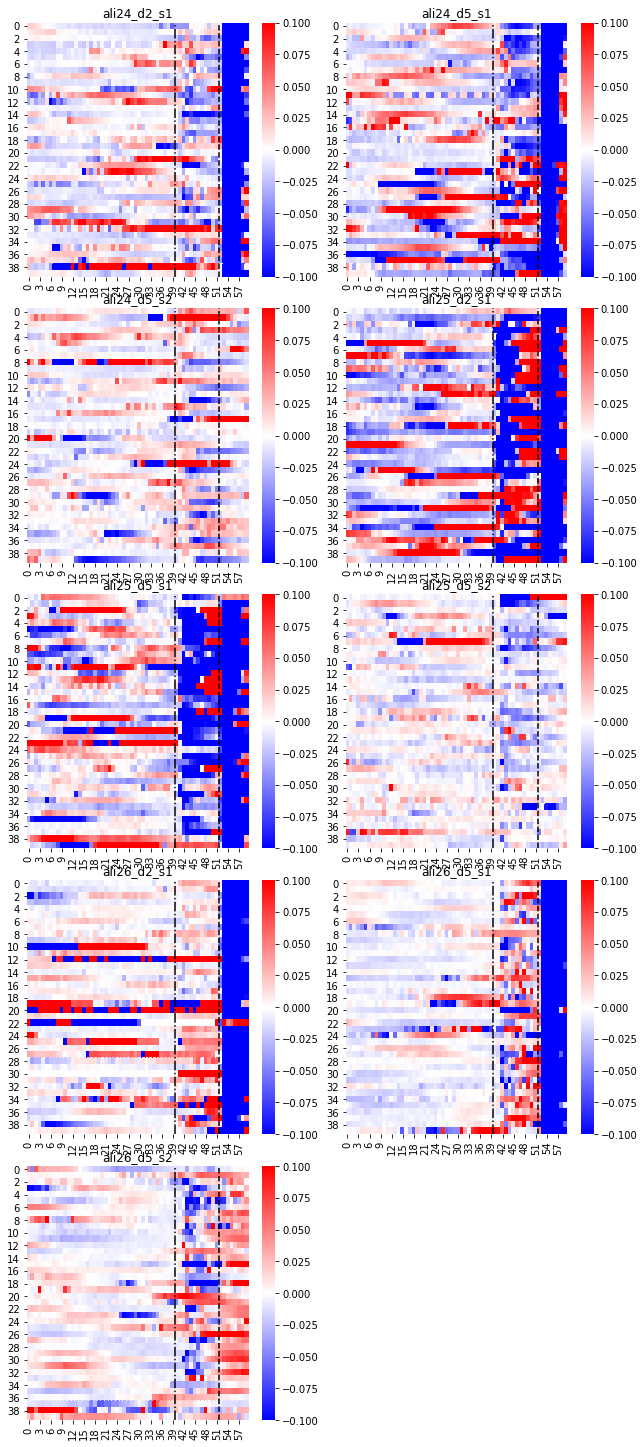

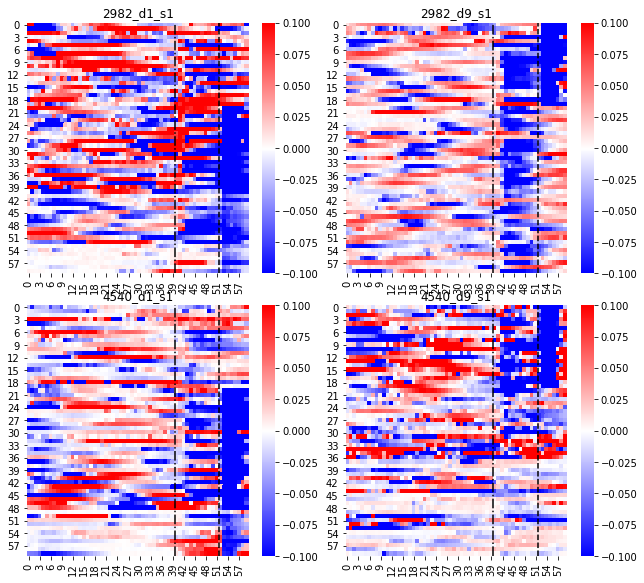

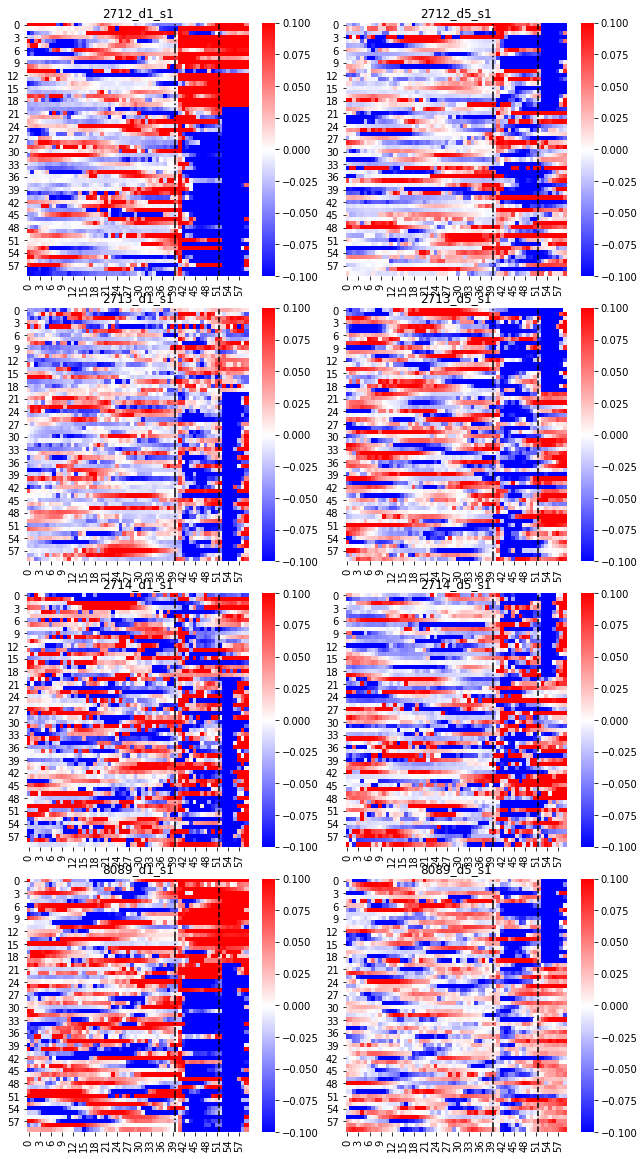

In [28]:
aliBehaviorScoring = binaryBehaviorScoring(aliEyeBlocks, aliEyeThresholds, 1)
rBehaviorScoring = binaryBehaviorScoring(rEyeBlocks, rEyeThresholds, 1)
nrBehaviorScoring = binaryBehaviorScoring(nrEyeBlocks, nrEyeThresholds, 1)

### Load traces to make hdf5 files 

In [29]:
def linear_func(x, a, b):
    return a*x + b

In [30]:
def curve_fit_wrapper(y, x, func):
    #Wrap curve_fit to match Pandas DataFrame Use and return only parameters, not covariance
    return curve_fit(func, x, y)[0]

In [31]:
def calcBaselineDistributions(df, regress_thresh=0.05, pct_datapoints=0.5):
    #Take DataFrame of traces, fit linear baseline, and calculate calcium threshold from devaition of residuals from that fit
    #Number of points for linear fit (Default is 0.5, or first half of sorted data)
    N_linfit = int(np.floor(df.shape[0]*pct_datapoints))
    #Calculate Distribution Fits and Generate Parameters and Outputs Matrix
    dist_series = df.apply(lambda x: ss.probplot(x)[0], axis=0)
    distributions = pd.DataFrame(data=[dist_series[item] for item in dist_series])
    #Rename Columns/Rows, since doesn't work at creation time for some reason...
    distributions.columns = ['Theoretical', 'Measured']
    distributions.index = dist_series.columns
    param_series = distributions.apply(lambda x: curve_fit(linear_func, x['Theoretical'][:N_linfit], x['Measured'][:N_linfit]), axis=1)
    distributions[['Parameters','Covariance']] = pd.DataFrame(data=[item for item in param_series], index=distributions.index, columns=['Parameters', 'Covariance'])
    distributions['Line'] = distributions.apply(lambda x: linear_func(x['Theoretical'], *x['Parameters']), axis=1)
    distributions['Difference'] = distributions.apply(lambda x: (x['Measured'] - x['Line']) / (np.nanmax(x['Measured']) - np.nanmin(x['Measured'])), axis=1)
    distributions['Deviation_idx'] = distributions.apply(lambda x: np.argmax(x['Difference'][N_linfit:] > regress_thresh)+N_linfit, axis=1)
    distributions['Ca_thresh'] = distributions.apply(lambda x: x['Measured'][x['Deviation_idx']], axis=1)
    
    return distributions

In [32]:
def scaleTraces(df):
    #Take DataFrame of traces, subtract off linear baseline and scale by percentage of maximum values for cell
    distribution_calculations = calcBaselineDistributions(df)
    #Get list of values into DataFrames/Series for scaling
    scale_vals = distribution_calculations.loc[:,('Parameters', 'Ca_thresh')].transpose(copy=True)
    baseline_list = []
    for row in scale_vals.loc['Parameters',:]:
        baseline_list.append(row[1])
    scale_vals.loc['Baseline',:] = pd.Series(baseline_list, index=scale_vals.columns)
    scale_vals.loc['Unit_Val',:] = scale_vals.loc['Ca_thresh',:] - scale_vals.loc['Baseline',:]
    #Adjust by subtracting baseline and dividing by scaling unit
    scaled_df = (df - scale_vals.loc['Baseline',:]) / scale_vals.loc['Unit_Val',:]
    
    return scaled_df

In [33]:
def loadTraces(files, whichData):
    #Load all the trace data and normalize traces with baseline adjustments
    #Load and doughnut subtract traces
    rawTraces = loadFiles(files, 'trace', whichData=whichData, multiIndex=True)
    BGTraces = loadFiles(files, 'BG10trace', whichData=whichData, multiIndex=True)
    traces = rawTraces.subtract(BGTraces)
    #Adjust Baseline Calculations
    scaled_traces= scaleTraces(traces)
    #Load Color Info TODO: Add Loading Color Values to loadFiles
    #colors = loadFiles(files, 'color', whichData)
    
    return scaled_traces

In [34]:
aliTraces = loadTraces(aliFiles, 'Ali')
rTraces = loadTraces(rFiles, 'Rebecca')
nrTraces = loadTraces(nrFiles, 'Rebecca')

In [35]:
aliTraces['ali24_d2_s1']

cell_num,0,1,2,3,4,5,6,7,8,9,...,852,853,854,855,856,857,858,859,860,861
Time,,,,,,,,,,,,,,,,,,,,,
0,-0.461516,-0.497097,-0.652726,-0.168431,0.495000,-0.153820,-0.068769,0.890229,-0.773249,5.215903,...,5.490304,-0.155853,0.255617,-0.104393,0.043359,-0.579772,-1.451264,-0.050304,5.612103,1.785891
1,-0.395316,-0.655350,-0.589537,-0.252190,0.668997,-0.145207,-0.194169,0.539226,-0.766853,5.773234,...,5.904214,-0.181698,0.239496,-0.197551,0.112081,-0.484373,-1.404085,-0.210584,4.988415,1.674637
2,-0.543414,-0.639917,-0.570285,-0.393034,0.412696,-0.245741,-0.157625,0.738957,-0.703462,5.679803,...,6.068524,-0.002118,0.373774,-0.107313,-0.138942,-0.518256,-1.439934,-0.095438,5.245147,1.757100
3,-0.462569,-0.646211,-0.754720,-0.310509,0.483202,-0.329685,-0.107366,0.625590,-0.842252,5.666190,...,6.163079,0.284609,0.370264,-0.149570,-0.045534,-0.491470,-1.421954,-0.152642,5.179964,1.832815
4,-0.525762,-0.664187,-0.639919,-0.403341,0.535767,-0.397402,-0.123824,0.703478,-0.663389,5.919297,...,6.206057,0.497006,0.565240,-0.315285,-0.335472,-0.586579,-1.334913,-0.485370,5.757262,1.502217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26477,0.120754,0.394666,0.698158,0.051486,0.333190,-0.000527,0.325845,0.493867,0.077709,-0.142910,...,-0.528638,-0.148596,1.254770,-0.102286,-0.103279,-0.015152,-0.162292,0.158429,-0.261489,-1.083724
26478,0.235514,0.392382,0.596067,0.012334,0.274931,-0.003576,0.239937,0.347444,0.210927,-0.024792,...,-0.393736,-0.078252,1.280962,-0.104606,-0.087718,-0.021351,-0.183026,0.295794,-0.385950,-0.822436
26479,0.268053,0.314845,0.411199,0.063282,0.081282,0.130743,0.254548,0.186793,0.198180,-0.127172,...,-0.155353,-0.063040,1.190491,-0.282001,0.075151,0.040519,-0.379785,0.347117,-0.589324,-0.856227


## Function to make trial blocks

In [36]:
def findPulses(inputTrace):
    #Find location of onset and offset of pulses
    #inputTrace = 1-D Numpy Array Trace of values assumed to be similar to a train of ttl pulses, where there is a clear onset and offset for each pulse.
    #locationTrace = Pseudo-logical 1-D trace, with 1s at pulse onset, and -1s at pulse offset, and 0s everywhere else
    
    shiftedInput = inputTrace - inputTrace.mean() #Shift to have mean 0 and baseline below 0
    changes = np.sign(shiftedInput) #Find where sign changes
    locationTrace = np.zeros(inputTrace.shape); #Initialize Output
    #locationTrace = np.zeros((behav_df.shape[0]+1,behav_df.shape[1]))
    diffArray = np.diff(changes)
    locationTrace[np.insert(diffArray==2,0,0)] = 1 #Set onsets to 1
    locationTrace[np.insert(diffArray==-2,0,0)] = -1 #Set offsets to -1
    return locationTrace

In [37]:
def makeTraceTrialBlocks(trace_df, behav_df):
    #Make Blocks of Trials for Traces (with MultiIndex), and return df with those trial blocks removed
    #Pre-defined Values
    tot_block_time = 201 #201 timepoints is about 10 seconds
    before_sound_time = 40 #40 timepoints before the puff 2 seconds
    after_sound_time = tot_block_time - before_sound_time - 1 #Time after sound.  Subtract 1 as index between before sound and after sound is included as "spot"
    #Shorten behav_df to length of trace_df
    behav_length = behav_df.shape[0]
    trace_length = trace_df.shape[0]
    if behav_length > trace_length:
        behav_df = behav_df.loc[:(trace_length-1),:]
    #Initialize Lists
    trace_blocks=[]
    trace_noBlocks=[]
    for mouse, cell_df in trace_df.groupby(level='mouse', axis=1):
        print(mouse) #Output Tracking
        #Shape Behavior Data
        soundPulses = findPulses(behav_df.loc[:,mouse])
        sound_on_inds = behav_df.index[soundPulses == 1]
        if sound_on_inds[-1]+after_sound_time > trace_df.loc[:,mouse].shape[0]: #Get rid of last pulse on at end of recording
            sound_on_inds = sound_on_inds[:-1]
        #Setup Numpy Arrays for Faster Loops
        cur_block = np.zeros((tot_block_time, sound_on_inds.shape[0], cell_df.shape[1]))
        cur_noBlock = cell_df.copy()
        cur_blockDrop = []
        for trial_idx, spot in enumerate(sound_on_inds):
            cur_block[:, trial_idx, :] = cell_df.loc[(spot-before_sound_time):(spot+after_sound_time), :].values
            cur_blockDrop.append(range((spot-before_sound_time), (spot+after_sound_time)))
        #Drop Indexes from Current Values and Save Dataframe
        flat_blockDrop = [value for sublist in cur_blockDrop for value in sublist]
        trace_noBlocks.append(cur_noBlock.drop(flat_blockDrop).reset_index(drop=True))
        #Make DataFrame for Current Cell Case
        mIdx = pd.MultiIndex.from_product([[mouse], range(sound_on_inds.shape[0]), range(cell_df.shape[1])], names=['mouse', 'trial', 'cell_num'])
        cur_df = pd.DataFrame(data=cur_block.reshape(tot_block_time,-1), columns=mIdx)
        trace_blocks.append(cur_df)
    #Convert Lists into Concatenated DataFrame
    trace_noBlocks_df = pd.concat(trace_noBlocks, axis=1)
    trace_blocks_df = pd.concat(trace_blocks, axis=1)
    trace_blocks_df.index.name = 'Time'
    return trace_blocks_df, trace_noBlocks_df

In [38]:
print('Ali Blocks')
aliTraceBlocks, aliTraceNoBlocks = makeTraceTrialBlocks(aliTraces, aliSounds) 
print('Rebecca Blocks')
rTraceBlocks, rTraceNoBlocks = makeTraceTrialBlocks(rTraces, rSounds)
print('New Rebecca Blocks')
nrTraceBlocks, nrTraceNoBlocks = makeTraceTrialBlocks(nrTraces, nrSounds)

Ali Blocks
ali24_d2_s1
ali24_d5_s1
ali24_d5_s2
ali25_d2_s1
ali25_d5_s1
ali25_d5_s2
ali26_d2_s1
ali26_d5_s1
ali26_d5_s2
Rebecca Blocks
2982_d1_s1
2982_d9_s1
4540_d1_s1
4540_d9_s1
New Rebecca Blocks
2712_d1_s1
2712_d5_s1
2713_d1_s1
2713_d5_s1
2714_d1_s1
2714_d5_s1
8089_d1_s1
8089_d5_s1


###  Convert to hdf5 files for Rebecca's mice to run event detection

In [39]:
# Convert to hdf5 files - r mice
traces= nrTraces['2713_d5_s1']
f1 = h5py.File("traces_2713_n.h5", "w")
dset1 = f1.create_dataset("/traces", data=traces)
list(f1.keys())
f1.close()

## Function to match cells

In [39]:
def loadMatchedIndexes(files):
    #Function to load matched cell indexes and output them in a DataFrame
    allInds=[]
    for f in files:
        name = f.split('/')[-2]
        if ('d5' in name):
            f_open = h5py.File(f,'r')
            mIdx = pd.MultiIndex.from_tuples([(name,'lastTraining')], names=['mouse','session'])
            cellIndexes = pd.DataFrame(data=np.array(f_open['lastTraining_d5_s1_index']), columns=mIdx)
            cellIndexes[name,'firstExtinction'] = np.array(f_open['firstExtinction_d5_s2_index'])
            allInds.append(cellIndexes)
    return pd.concat(allInds, axis=1)

In [40]:
def matchDF(traces, match_df):
    #Function to compare match values in a dataframe and output only those matched in appropriate sessions
    #Includes re-sorting to ensure column match at cell-level
    mice = traces.columns.unique('mouse')
    matchedInds=[]
    for mouse in mice:
        print(mouse)
        if ('d5' in mouse): #If a d5 Session with Matching
            match_sess = match_df[mouse].dropna()
            if ('s1' in mouse):
                search_col = 'firstExtinction'
                sel_col = 'lastTraining'
                sel_inds = (match_sess.loc[(match_sess[search_col] != -1), sel_col] - 1).values.astype(int)
                trace_sess = traces[mouse]
                out_sess = trace_sess.loc[:,sel_inds]
            elif ('s2' in mouse):
                search_col = 'lastTraining'
                sel_col = 'firstExtinction'
                #Number Magic because Pandas Dataframes with MultiIndexing doesn't sort correctly... :(
                sel_inds_wrongSorting = (match_sess.loc[(match_sess[search_col] != -1), sel_col] - 1).values.astype(int)
                sel_inds_toSort = (match_sess.loc[(match_sess[search_col] != -1), search_col] - 1).values.astype(int)
                sorting_inds = np.argsort(sel_inds_toSort)
                sel_inds = sel_inds_wrongSorting[sorting_inds]
                #corr_sorting_multi_cols = pd.MultiIndex.from_product([sel_inds], names=['cell_num'])
                trace_sess = traces[mouse]
                out_sess = trace_sess.loc[:,sel_inds]
            mIdx = pd.MultiIndex.from_product([[mouse],range(sel_inds.shape[0])], names=['mouse','cell_num'])
            out_sess.columns = mIdx
            matchedInds.append(out_sess)
        else: #No d5 Session with Matching
            noChange = traces[mouse]
            noChange.columns = pd.MultiIndex.from_product([[mouse],noChange.columns], names=['mouse','cell_num'])
            matchedInds.append(noChange)
    return pd.concat(matchedInds, axis=1)

In [41]:
def matchCells(files, traces):
    #Function to cell index matches and output a DataFrame with those cell indexes matched
    #Load Matched Indexes
    matchInds = loadMatchedIndexes(files)
    
    #Match Indexes and Output
    matchedTraces = matchDF(traces, matchInds)
        
    return matchedTraces, matchInds

In [42]:
aliMatched, aliMatchInds = matchCells(aliFiles, aliTraces)

ali24_d2_s1
ali24_d5_s1
ali24_d5_s2
ali25_d2_s1
ali25_d5_s1
ali25_d5_s2
ali26_d2_s1
ali26_d5_s1
ali26_d5_s2


In [43]:
aliMatched['ali24_d5_s2']

cell_num,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
Time,,,,,,,,,,,,,,,,,,,,,
0,0.629707,2.483463,0.743450,-0.185985,1.554337,0.804631,-0.401126,0.065011,0.340540,-0.012337,...,6.077310,-0.207962,0.449190,-0.114548,0.582028,0.340386,0.168062,-0.056299,-0.179139,-0.082281
1,0.377613,1.625554,0.410474,-0.077159,1.110302,0.540219,-0.114167,0.551829,0.390692,0.302409,...,6.870301,0.172985,0.004472,0.117908,0.700049,0.801184,0.238979,0.860605,-0.022463,-0.050181
2,0.610118,1.759359,0.571712,0.185531,0.708037,0.443287,-0.252406,0.155510,0.576524,0.741790,...,6.258085,0.038875,0.289321,0.177569,0.367802,0.311984,0.130178,0.331479,0.023311,-0.295997
3,0.291673,1.715133,0.455964,0.109929,0.550209,0.629552,-0.250862,-0.078476,-0.040920,0.177596,...,6.736138,-0.058714,0.356201,-0.045235,0.256651,0.468748,0.320689,0.541928,0.153167,-0.082501
4,0.669722,2.233406,0.423925,-0.047278,0.683989,1.002839,-0.090860,-0.040722,-0.072608,0.427765,...,5.716721,-0.123220,-0.037144,-0.110409,0.265162,0.270411,-0.075739,0.495635,-0.082114,-0.323106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26477,-0.336262,1.872870,0.799064,0.136675,0.093991,-0.534435,-0.150714,-0.420963,-0.400259,0.386804,...,0.498633,-0.142575,-0.410921,-0.013377,0.299817,0.049249,0.058258,-0.561950,-0.268784,-0.174313
26478,-0.150462,1.767604,0.457788,-0.026425,0.730204,-0.605818,-0.294153,-0.205086,-0.169417,0.415317,...,0.126306,-0.163486,-0.539975,0.025371,0.059061,-0.152025,-0.179291,-0.399407,-0.312427,0.066082
26479,-0.173118,1.646680,0.434252,0.098621,0.370127,-0.544766,-0.393788,-0.435381,-0.009565,0.475415,...,0.242624,-0.276963,-0.692361,-0.154683,0.029743,-0.149542,-0.445777,-0.954296,0.016627,-0.142976


### Convert matched traces to hdf5 files for event detection in Ali's animals

In [44]:
traces= aliMatched['ali24_d5_s1']
f1 = h5py.File("traces_ali24_s1_matched.h5", "w")
dset1 = f1.create_dataset("/traces", data=traces)
f1.close()

In [45]:
traces= aliMatched['ali24_d5_s2']
f1 = h5py.File("traces_ali24_s2_matched.h5", "w")
dset1 = f1.create_dataset("/traces", data=traces)
f1.close()

In [46]:
traces= aliMatched['ali25_d5_s1']
f1 = h5py.File("traces_ali25_s1_matched.h5", "w")
dset1 = f1.create_dataset("/traces", data=traces)
f1.close()

In [47]:
traces= aliMatched['ali25_d5_s2']
f1 = h5py.File("traces_ali25_s2_matched.h5", "w")
dset1 = f1.create_dataset("/traces", data=traces)
f1.close()

In [48]:
traces= aliMatched['ali26_d5_s1']
f1 = h5py.File("traces_ali26_s1_matched.h5", "w")
dset1 = f1.create_dataset("/traces", data=traces)
f1.close()

In [49]:
traces= aliMatched['ali26_d5_s2']
f1 = h5py.File("traces_ali26_s2_matched.h5", "w")
dset1 = f1.create_dataset("/traces", data=traces)
f1.close()

## Loading binary traces after event detection ( event onsets as 1)

In [50]:
#Initialize Input Values
#Ali Mice
aliBase = '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/'
aliMice, aliDays, aliSessions = ([24,25,26], [2,5], [1,2])
aliFolders, aliFilenames = makeAliFilenames_modified(aliMice, aliDays, aliSessions)
bin_aliFiles = combineFilenames(aliBase, aliFolders, aliFilenames)
#Rebecca Mice
rBase = '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/'
rMice, rDays, rSessions = ([2982,4540], [1,9], [1])
rFolders, rFilenames = makeRebeccaFilenames_modified(rMice, rDays, rSessions)
bin_rFiles = combineFilenames(rBase, rFolders, rFilenames)
#New Rebecca Mice
nrBase = '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/'
nrMice, nrDays, nrSessions = ([2712, 2713,2714,8089], [1,5], [1]) #Also have 2 as full imaging session.  Drop 2714 because of data quality
nrFolders, nrFilenames = makeRebeccaFilenames_modified(nrMice, nrDays, nrSessions)
bin_nrFiles = combineFilenames(nrBase, nrFolders, nrFilenames)
#Combine All Filenames into one List
bin_allFiles = bin_aliFiles + bin_rFiles + bin_nrFiles
print(bin_allFiles)

['/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali24_d2_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali24_d5_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali24_d5_s2/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali25_d2_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali25_d5_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali25_d5_s2/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali26_d2_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali26_d5_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali26_d5_s2/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/2982/2982_d1_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff-R

In [51]:
def loadbinaryTraces(files, whichData):
    #Load all the trace data and normalize traces with baseline adjustments
    #Load and doughnut subtract traces
    binTraces = loadFiles(files, 'binary_trace', whichData=whichData, multiIndex=True)
    
    return binTraces

In [52]:
ali_binary_traces=loadbinaryTraces(bin_aliFiles, 'Ali')
r_binary_traces=loadbinaryTraces(bin_rFiles, 'Rebecca')
nr_binary_traces=loadbinaryTraces(bin_nrFiles, 'Rebecca')

#### Sanity Check

In [53]:
np.unique(ali_binary_traces['ali24_d5_s2'])

array([0., 1.])

In [54]:
ali_binary_traces['ali24_d5_s2']

cell_num,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
Time,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Make trial blocks

In [55]:
print('Ali Binary Blocks')
bin_aliTraceBlocks, bin_aliTraceNoBlocks = makeTraceTrialBlocks(ali_binary_traces, aliSounds)
#bin_aliTraceBlocks, bin_aliTraceNoBlocks = makeTraceTrialBlocks(aliMatched, aliSounds)
print('Rebecca Binary Blocks')
bin_rTraceBlocks, bin_rTraceNoBlocks = makeTraceTrialBlocks(r_binary_traces, rSounds) 
print('New Rebecca Binary Blocks')
bin_nrTraceBlocks, bin_nrTraceNoBlocks = makeTraceTrialBlocks(nr_binary_traces, nrSounds) 

Ali Binary Blocks
ali24_d2_s1
ali24_d5_s1
ali24_d5_s2
ali25_d2_s1
ali25_d5_s1
ali25_d5_s2
ali26_d2_s1
ali26_d5_s1
ali26_d5_s2
Rebecca Binary Blocks
2982_d1_s1
2982_d9_s1
4540_d1_s1
4540_d9_s1
New Rebecca Binary Blocks
2712_d1_s1
2712_d5_s1
2713_d1_s1
2713_d5_s1
2714_d1_s1
2714_d5_s1
8089_d1_s1
8089_d5_s1


In [56]:
print(bin_aliTraceBlocks['ali24_d5_s1'].columns.unique('cell_num').shape)
print(bin_aliTraceBlocks['ali25_d5_s1'].columns.unique('cell_num').shape)
print(bin_aliTraceBlocks['ali26_d5_s1'].columns.unique('cell_num').shape)
print(bin_rTraceBlocks['2982_d9_s1'].columns.unique('cell_num').shape)
print(bin_rTraceBlocks['4540_d9_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2712_d5_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2713_d5_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2714_d5_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['8089_d5_s1'].columns.unique('cell_num').shape)

(301,)
(133,)
(419,)
(306,)
(266,)
(127,)
(141,)
(153,)
(75,)


In [57]:
total_cells_lastday = bin_aliTraceBlocks['ali24_d5_s1'].columns.unique('cell_num').shape[0]+bin_aliTraceBlocks['ali26_d5_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['2982_d9_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['4540_d9_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2713_d5_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2714_d5_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['8089_d5_s1'].columns.unique('cell_num').shape[0]
total_cells_lastday

1661

In [58]:
total_cells_lastday_all = bin_aliTraceBlocks['ali24_d5_s1'].columns.unique('cell_num').shape[0]+bin_aliTraceBlocks['ali25_d5_s1'].columns.unique('cell_num').shape[0]+bin_aliTraceBlocks['ali26_d5_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['2982_d9_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['4540_d9_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2713_d5_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2714_d5_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['8089_d5_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2712_d5_s1'].columns.unique('cell_num').shape[0]
total_cells_lastday_all

1921

In [59]:
#Colormap Creation from Other Colormap
full_gist = cm.get_cmap('gist_stern',256)
topgist_cm = ListedColormap(full_gist(np.linspace(0.25, 1, 256)))

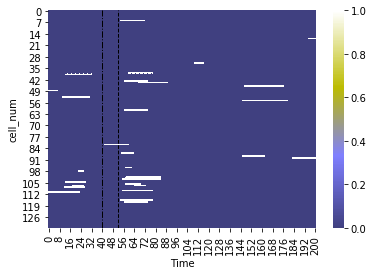

In [60]:
a=bin_aliTraceBlocks['ali25_d5_s1'].loc[:,38]
sns.heatmap(a.T,cmap=topgist_cm)
plt.axvline(x=40, linestyle='-.', color='k', linewidth=1)
plt.axvline(x=52, linestyle='--', color='k', linewidth=1)
#plt.savefig('event_detection_ali26_20.png',format='png')

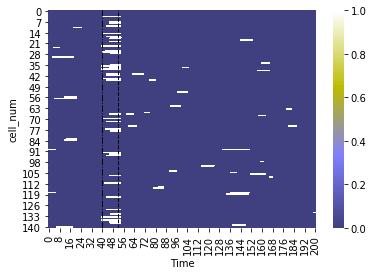

In [61]:
a=bin_nrTraceBlocks['2713_d5_s1'].loc[:,13]
sns.heatmap(a.T,cmap=topgist_cm)
plt.axvline(x=40, linestyle='-.', color='k', linewidth=1)
plt.axvline(x=52, linestyle='--', color='k', linewidth=1)
plt.savefig('event_detection_2713_13.png',format='png')

## New method of shuffling to determine active cells 

In [62]:
bin_aliTraceNoBlocks['ali24_d5_s1'].shape

(18482, 301)

In [63]:
20*1*20

400

In [64]:
# need to select 20 non overlapping segments for every cell and search for 1's ! 
#0th cell
bin_aliTraceNoBlocks['ali24_d5_s1'].loc[:,0]
#np.array(np.where(mouse_df.loc[:,cell]==1)).size

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
18477    0.0
18478    0.0
18479    0.0
18480    0.0
18481    0.0
Name: 0, Length: 18482, dtype: float64

In [65]:
# https://stackoverflow.com/questions/18641272/n-random-contiguous-and-non-overlapping-subsequences-each-of-length

In [66]:
def rand_parts(seq, n, l):
    indices = range(len(seq) - (l - 1) * n)
    result = []
    offset = 0
    for i in sorted(random.sample(indices, n)):
        i += offset
        result.append(seq[i:i+l])
        offset += l - 1
    return result

In [67]:
seq=np.arange(0,18482,1)

seq

array([    0,     1,     2, ..., 18479, 18480, 18481])

In [68]:
type(rand_parts([1, 2, 3, 4, 5, 6], 2, 2))

list

In [69]:
ind=rand_parts(seq,20,20)
ind

[array([656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668,
        669, 670, 671, 672, 673, 674, 675]),
 array([700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712,
        713, 714, 715, 716, 717, 718, 719]),
 array([1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654,
        1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663]),
 array([3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115,
        3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124]),
 array([3738, 3739, 3740, 3741, 3742, 3743, 3744, 3745, 3746, 3747, 3748,
        3749, 3750, 3751, 3752, 3753, 3754, 3755, 3756, 3757]),
 array([5708, 5709, 5710, 5711, 5712, 5713, 5714, 5715, 5716, 5717, 5718,
        5719, 5720, 5721, 5722, 5723, 5724, 5725, 5726, 5727]),
 array([6709, 6710, 6711, 6712, 6713, 6714, 6715, 6716, 6717, 6718, 6719,
        6720, 6721, 6722, 6723, 6724, 6725, 6726, 6727, 6728]),
 array([7004, 7005, 7006, 7007, 7008, 7009, 7010, 7011, 7012, 7013, 7014,


In [70]:
temp_df=bin_aliTraceNoBlocks['ali24_d5_s1'].loc[ind[19],0]
np.array(np.where(temp_df==1)).size

10

In [71]:
# Do below 1000 times and build distribution for each cell- get mean and std dev
# Below is for one cell in a session- 2nd cell

ind=rand_parts(seq,20,20)
active_trials=[]
for i in np.arange(0,20,1):
    temp_df=bin_aliTraceNoBlocks['ali24_d5_s1'].loc[ind[i],100]
    a= np.array(np.where(temp_df==1)).size
   
    active_trials.append(a)
    print(active_trials)
print(np.mean(active_trials))

[0]
[0, 0]
[0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 2]
[0, 0, 0, 0, 0, 2, 0]
[0, 0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 0, 2, 0, 0, 5]
[0, 0, 0, 0, 0, 2, 0, 0, 5, 0]
[0, 0, 0, 0, 0, 2, 0, 0, 5, 0, 0]
[0, 0, 0, 0, 0, 2, 0, 0, 5, 0, 0, 0]
[0, 0, 0, 0, 0, 2, 0, 0, 5, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 2, 0, 0, 5, 0, 0, 0, 0, 10]
[0, 0, 0, 0, 0, 2, 0, 0, 5, 0, 0, 0, 0, 10, 0]
[0, 0, 0, 0, 0, 2, 0, 0, 5, 0, 0, 0, 0, 10, 0, 0]
[0, 0, 0, 0, 0, 2, 0, 0, 5, 0, 0, 0, 0, 10, 0, 0, 0]
[0, 0, 0, 0, 0, 2, 0, 0, 5, 0, 0, 0, 0, 10, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 2, 0, 0, 5, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 2, 0, 0, 5, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0]
0.85


## Sum over 20 frames and then take mean 

In [73]:
# Alternative way .look for each segment - add all 1's take mean across 20 trials ?

import time
start = time.time()

percent_active_trials=np.zeros((1000,1))
threshold=[]
threshold2=[]
for cell in range(0,10,1):
    print(cell)
    for n in range(0,1000,1):
        ind=rand_parts(seq,20,20)
        active_trials=[]
        for i in np.arange(0,20,1):
            temp_df=bin_aliTraceNoBlocks['ali24_d5_s1'].loc[ind[i],cell]
            active_trials.append(np.array(np.where(temp_df==1)).size)
#percent_active_trials=active_trials/20*100
        percent_active_trials[n]=np.mean(active_trials)
    threshold.append(np.mean(percent_active_trials)+2*np.std(percent_active_trials))
    threshold2.append(np.percentile(percent_active_trials,95))
    
print(threshold)
print(threshold2)
end = time.time()
print(end - start)

0
1
2
3
4
5
6
7
8
9
[2.045236598428336, 1.5629135191575183, 2.1746243204416698, 1.579007844633822, 1.5734367577102346, 1.7676903236593575, 1.790857560534556, 1.7588739097866348, 1.9942299369813148, 0.7989461944225107]
[1.95, 1.55, 2.102499999999998, 1.5024999999999977, 1.5524999999999978, 1.75, 1.7524999999999977, 1.7024999999999977, 2.0, 1.0]
180.33250904083252


## Functions 

In [74]:
# Compare 2nd cell firing rate in first 20 trials to above mean + 2std dev
def identify_active_cells(mouse_df,threshold):
    trials = mouse_df.columns.unique('trial')
    Ntrials = trials.shape[0]
    cells = mouse_df.columns.unique('cell_num')
    Ncells = cells.shape[0]
    tone_time=40
    window_end = 60
    out_bin= np.zeros((Ncells))
    for cell in cells:
        active_trials=[]
        for trial in trials:
            temp_df=mouse_df[trial].loc[tone_time:window_end,cell]
            a=np.array(np.where(temp_df==1))
            active_trials.append(a.size)
    #print(active_trials)
        out_bin[cell]=np.mean(active_trials)
    percent_active_trials=np.squeeze(out_bin)
    a=percent_active_trials>threshold
    active_cells=np.squeeze(np.argwhere(a==1))
    n_active_cells=np.argwhere(a==1).size
    percent_active_cells=(np.argwhere(a==1).size/threshold.shape[0])*100       


    
    return active_cells,n_active_cells,percent_active_cells

In [75]:
#f1 = h5py.File("Threshold2_CS_EX_binary_traces_2.h5", "r")
f1=h5py.File('Thresholds_CS_EX.h5','r')
f1.keys()

<KeysViewHDF5 ['2712', '2713', '2714', '2982', '4540', '8089', 'Ali_24', 'Ali_24_EX', 'Ali_25', 'Ali_25_EX', 'Ali_26', 'Ali_26_EX']>

In [76]:
# Can make into a dataframe for easier use  but not useful here as different animals have different requirements.
threshold_ali24=np.array(f1['Ali_24'])
threshold_ali25=np.array(f1['Ali_25'])
threshold_ali26=np.array(f1['Ali_26'])
threshold_2982=np.array(f1['2982'])
threshold_4540=np.array(f1['4540'])
threshold_2712=np.array(f1['2712'])
threshold_2713=np.array(f1['2713'])
threshold_2714=np.array(f1['2714'])
threshold_8089=np.array(f1['8089'])


threshold_ali24_EX=np.array(f1['Ali_24_EX'])
threshold_ali25_EX=np.array(f1['Ali_25_EX'])
threshold_ali26_EX=np.array(f1['Ali_26_EX'])
f1.close()

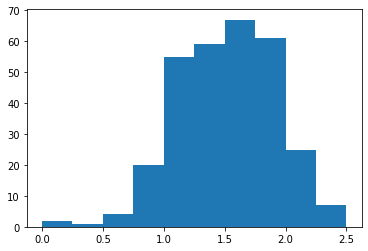

In [70]:
plt.hist(threshold_ali24)

plt.savefig('threshold_histogram.eps')

In [77]:
Nfirst=20
Ntrials=40
mouse_df=bin_aliTraceBlocks['ali24_d5_s1'].loc[:, bin_aliTraceBlocks['ali24_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_ali24,n_active_cells_ali24,percent_active_cells_ali24=identify_active_cells(mouse_df,threshold_ali24)
mouse_df=bin_aliTraceBlocks['ali25_d5_s1'].loc[:, bin_aliTraceBlocks['ali25_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_ali25,n_active_cells_ali25,percent_active_cells_ali25=identify_active_cells(mouse_df,threshold_ali25)
mouse_df=bin_aliTraceBlocks['ali26_d5_s1'].loc[:, bin_aliTraceBlocks['ali26_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_ali26,n_active_cells_ali26,percent_active_cells_ali26=identify_active_cells(mouse_df,threshold_ali26)

In [78]:
print(n_active_cells_ali24,percent_active_cells_ali24)
print(n_active_cells_ali25,percent_active_cells_ali25)
print(n_active_cells_ali26,percent_active_cells_ali26)

71 23.588039867109632
17 12.781954887218044
105 25.059665871121716


## Rebecca's mice 

In [79]:
Nfirst=20
mouse_df=bin_rTraceBlocks['2982_d9_s1'].loc[:, bin_rTraceBlocks['2982_d9_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
active_cells_2982,n_active_cells_2982,percent_active_cells_2982=identify_active_cells(mouse_df,threshold_2982)
mouse_df=bin_rTraceBlocks['4540_d9_s1'].loc[:, bin_rTraceBlocks['4540_d9_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
active_cells_4540,n_active_cells_4540,percent_active_cells_4540=identify_active_cells(mouse_df,threshold_4540)

In [80]:
print(n_active_cells_2982,percent_active_cells_2982)
print(n_active_cells_4540,percent_active_cells_4540)

23 7.516339869281046
20 7.518796992481203


In [81]:
Nfirst=20
mouse_df=bin_nrTraceBlocks['2712_d5_s1'].loc[:, bin_nrTraceBlocks['2712_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
active_cells_2712,n_active_cells_2712,percent_active_cells_2712=identify_active_cells(mouse_df,threshold_2712)
mouse_df=bin_nrTraceBlocks['2713_d5_s1'].loc[:, bin_nrTraceBlocks['2713_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
active_cells_2713,n_active_cells_2713,percent_active_cells_2713=identify_active_cells(mouse_df,threshold_2713)
mouse_df=bin_nrTraceBlocks['2714_d5_s1'].loc[:, bin_nrTraceBlocks['2714_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
active_cells_2714,n_active_cells_2714,percent_active_cells_2714=identify_active_cells(mouse_df,threshold_2714)
mouse_df=bin_nrTraceBlocks['8089_d5_s1'].loc[:, bin_nrTraceBlocks['8089_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
active_cells_8089,n_active_cells_8089,percent_active_cells_8089=identify_active_cells(mouse_df,threshold_8089)

In [82]:
print(n_active_cells_2712,percent_active_cells_2712)
print(n_active_cells_2713,percent_active_cells_2713)
print(n_active_cells_2714,percent_active_cells_2714)
print(n_active_cells_8089,percent_active_cells_8089)

27 21.25984251968504
25 17.73049645390071
5 3.2679738562091507
6 8.0


In [83]:
Active_cells_last_day_all=n_active_cells_ali24+n_active_cells_ali25+n_active_cells_ali26+n_active_cells_2982+n_active_cells_4540+n_active_cells_2712+n_active_cells_2713+n_active_cells_2714+n_active_cells_8089
Active_cells_last_day_all

299

In [84]:
Active_cells_last_day=n_active_cells_ali24+n_active_cells_ali26+n_active_cells_2982+n_active_cells_4540+n_active_cells_2713+n_active_cells_2714+n_active_cells_8089
Active_cells_last_day

255

### Active cells during extinction

In [85]:
Nfirst=20
Ntrials=40
mouse_df=bin_aliTraceBlocks['ali24_d5_s2'].loc[:, bin_aliTraceBlocks['ali24_d5_s2'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_ali24_EX,n_active_cells_ali24_EX,percent_active_cells_ali24_EX=identify_active_cells(mouse_df,threshold_ali24_EX)
mouse_df=bin_aliTraceBlocks['ali25_d5_s2'].loc[:, bin_aliTraceBlocks['ali25_d5_s2'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_ali25_EX,n_active_cells_ali25_EX,percent_active_cells_ali25_EX=identify_active_cells(mouse_df,threshold_ali25_EX)
mouse_df=bin_aliTraceBlocks['ali26_d5_s2'].loc[:, bin_aliTraceBlocks['ali26_d5_s2'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_ali26_EX,n_active_cells_ali26_EX,percent_active_cells_ali26_EX=identify_active_cells(mouse_df,threshold_ali26_EX)

In [86]:
Nfirst=40
Ntrials=60
mouse_df=bin_rTraceBlocks['2982_d9_s1'].loc[:, bin_rTraceBlocks['2982_d9_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_2982_EX,n_active_cells_2982_EX,percent_active_cells_2982_EX=identify_active_cells(mouse_df,threshold_2982)
mouse_df=bin_rTraceBlocks['4540_d9_s1'].loc[:, bin_rTraceBlocks['4540_d9_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_4540_EX,n_active_cells_4540_EX,percent_active_cells_4540_EX=identify_active_cells(mouse_df,threshold_4540)

In [87]:
Nfirst=40
Ntrials=60
mouse_df=bin_nrTraceBlocks['2712_d5_s1'].loc[:, bin_nrTraceBlocks['2712_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_2712_EX,n_active_cells_2712_EX,percent_active_cells_2712_EX=identify_active_cells(mouse_df,threshold_2712)
mouse_df=bin_nrTraceBlocks['2713_d5_s1'].loc[:, bin_nrTraceBlocks['2713_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_2713_EX,n_active_cells_2713_EX,percent_active_cells_2713_EX=identify_active_cells(mouse_df,threshold_2713)
mouse_df=bin_nrTraceBlocks['2714_d5_s1'].loc[:, bin_nrTraceBlocks['2714_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_2714_EX,n_active_cells_2714_EX,percent_active_cells_2714_EX=identify_active_cells(mouse_df,threshold_2714)
mouse_df=bin_nrTraceBlocks['8089_d5_s1'].loc[:, bin_nrTraceBlocks['8089_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_8089_EX,n_active_cells_8089_EX,percent_active_cells_8089_EX=identify_active_cells(mouse_df,threshold_8089)

In [88]:
Active_cells_EX=n_active_cells_ali24_EX+n_active_cells_ali26_EX+n_active_cells_2982_EX+n_active_cells_4540_EX+n_active_cells_2713_EX+n_active_cells_2714_EX+n_active_cells_8089_EX
Active_cells_EX

166

In [89]:
Active_cells_EX_all=n_active_cells_ali24_EX+n_active_cells_ali25_EX+n_active_cells_ali26_EX+n_active_cells_2982_EX+n_active_cells_4540_EX+n_active_cells_2712_EX+n_active_cells_2713_EX+n_active_cells_2714_EX+n_active_cells_8089_EX
Active_cells_EX_all

190

In [90]:
n_active_cells_ali24_EX,n_active_cells_ali25_EX,n_active_cells_ali26_EX,n_active_cells_2982_EX,n_active_cells_4540_EX,n_active_cells_2712_EX,n_active_cells_2713_EX,n_active_cells_2714_EX,n_active_cells_8089_EX

(57, 12, 37, 17, 14, 12, 17, 11, 13)

In [91]:
# Function to find common cells percentage and common cell numbers 
def common_cells(i,j):
    pct_1=np.in1d(i,j).sum() / float(i.shape[0])*100
    pct_2=np.in1d(i,j).sum() / float(j.shape[0])*100
    pct_3=(np.in1d(i,j).sum()) / (float(j.shape[0]+i.shape[0]-np.in1d(i,j).sum()))*100
    n= np.in1d(i,j).sum()
    return n,pct_1,pct_2,(pct_1+pct_2)/2,pct_3

In [92]:
common_cells_ali24=common_cells(active_cells_ali24,active_cells_ali24_EX)[0]
common_cells_ali25=common_cells(active_cells_ali25,active_cells_ali25_EX)[0]
common_cells_ali26=common_cells(active_cells_ali26,active_cells_ali26_EX)[0]
common_cells_2982=common_cells(active_cells_2982,active_cells_2982_EX)[0]
common_cells_4540=common_cells(active_cells_4540,active_cells_4540_EX)[0]
common_cells_2712=common_cells(active_cells_2712,active_cells_2712_EX)[0]
common_cells_2713=common_cells(active_cells_2713,active_cells_2713_EX)[0]
common_cells_2714=common_cells(active_cells_2714,active_cells_2714_EX)[0]
common_cells_8089=common_cells(active_cells_8089,active_cells_8089_EX)[0]

In [93]:
common_cells_list= [common_cells_ali24,common_cells_ali25,common_cells_ali26,common_cells_2982,common_cells_4540,common_cells_2712,common_cells_2713,common_cells_2714,common_cells_8089]
common_cells_list

[11, 4, 19, 2, 2, 4, 4, 2, 1]

In [94]:
np.sum(common_cells_list)

49

In [95]:
common_cells_percent_ali24=common_cells(active_cells_ali24,active_cells_ali24_EX)[4]
common_cells_percent_ali25=common_cells(active_cells_ali25,active_cells_ali25_EX)[4]
common_cells_percent_ali26=common_cells(active_cells_ali26,active_cells_ali26_EX)[4]
common_cells_percent_2982=common_cells(active_cells_2982,active_cells_2982_EX)[4]
common_cells_percent_4540=common_cells(active_cells_4540,active_cells_4540_EX)[4]
common_cells_percent_2712=common_cells(active_cells_2712,active_cells_2712_EX)[4]
common_cells_percent_2713=common_cells(active_cells_2713,active_cells_2713_EX)[4]
common_cells_percent_2714=common_cells(active_cells_2714,active_cells_2714_EX)[4]
common_cells_percent_8089=common_cells(active_cells_8089,active_cells_8089_EX)[4]
common_cells_percent_list_CS= [common_cells_percent_ali24,common_cells_percent_ali25,common_cells_percent_ali26,common_cells_percent_2982,common_cells_percent_4540,common_cells_percent_2712,common_cells_percent_2713,common_cells_percent_2714,common_cells_percent_8089]
common_cells_percent_list_CS

[9.401709401709402,
 16.0,
 15.447154471544716,
 5.263157894736842,
 6.25,
 11.428571428571429,
 10.526315789473683,
 14.285714285714285,
 5.555555555555555]

### Indentities of active cells CS and EX for ali 24 for spatial map figure in paper 

In [96]:
CS_cells=active_cells_ali24
EX_cells=(active_cells_ali24_EX)
f = h5py.File("Active_Cells_ali24.h5", "w")
dset1 = f.create_dataset("/CS_cells", data=CS_cells)
dset1 = f.create_dataset("/EX_cells", data=EX_cells)
list(f.keys())
f.close()

## Active cells for spatial calculations (bootstrap) and network analysis 

In [97]:
def active_cells_file(CS_cells,EX_cells,filename):
    f = h5py.File(filename, "w")
    dset1 = f.create_dataset("/CS_cells", data=CS_cells)
    dset1 = f.create_dataset("/EX_cells", data=EX_cells)
    list(f.keys())  
    f.close()

In [98]:
active_cells_file(active_cells_ali25,active_cells_ali25_EX,"Active_Cells_ali25.h5")
active_cells_file(active_cells_ali26,active_cells_ali26_EX,"Active_Cells_ali26.h5")
active_cells_file(active_cells_2982,active_cells_2982_EX,"Active_Cells_2982.h5")
active_cells_file(active_cells_4540,active_cells_4540_EX,"Active_Cells_4540.h5")
active_cells_file(active_cells_2712,active_cells_2712_EX,"Active_Cells_2712.h5")
active_cells_file(active_cells_2713,active_cells_2713_EX,"Active_Cells_2713.h5")
active_cells_file(active_cells_2714,active_cells_2714_EX,"Active_Cells_2714.h5")
active_cells_file(active_cells_8089,active_cells_8089_EX,"Active_Cells_8089.h5")

## Using first 20 trials

In [99]:
Nfirst=20

mouse_df=bin_aliTraceBlocks['ali24_d5_s2'].loc[:, bin_aliTraceBlocks['ali24_d5_s2'].columns.get_level_values('trial').isin(range(Nfirst))]
active_cells_ali24_EX_2,n_active_cells_ali24_EX,percent_active_cells_ali24_EX_2=identify_active_cells(mouse_df,threshold_ali24_EX)
mouse_df=bin_aliTraceBlocks['ali25_d5_s2'].loc[:, bin_aliTraceBlocks['ali25_d5_s2'].columns.get_level_values('trial').isin(range(Nfirst))]
active_cells_ali25_EX_2,n_active_cells_ali25_EX,percent_active_cells_ali25_EX_2=identify_active_cells(mouse_df,threshold_ali25_EX)
mouse_df=bin_aliTraceBlocks['ali26_d5_s2'].loc[:, bin_aliTraceBlocks['ali26_d5_s2'].columns.get_level_values('trial').isin(range(Nfirst))]
active_cells_ali26_EX_2,n_active_cells_ali26_EX,percent_active_cells_ali26_EX_2=identify_active_cells(mouse_df,threshold_ali26_EX)

In [100]:
Nfirst=20
Ntrials=40
mouse_df=bin_rTraceBlocks['2982_d9_s1'].loc[:, bin_rTraceBlocks['2982_d9_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_2982_EX_2,n_active_cells_2982_EX,percent_active_cells_2982_EX_2=identify_active_cells(mouse_df,threshold_2982)
mouse_df=bin_rTraceBlocks['4540_d9_s1'].loc[:, bin_rTraceBlocks['4540_d9_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_4540_EX_2,n_active_cells_4540_EX,percent_active_cells_4540_EX_2=identify_active_cells(mouse_df,threshold_4540)

In [101]:
Nfirst=20
Ntrials=40
mouse_df=bin_nrTraceBlocks['2712_d5_s1'].loc[:, bin_nrTraceBlocks['2712_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_2712_EX_2,n_active_cells_2712_EX,percent_active_cells_2712_EX_2=identify_active_cells(mouse_df,threshold_2712)
mouse_df=bin_nrTraceBlocks['2713_d5_s1'].loc[:, bin_nrTraceBlocks['2713_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_2713_EX_2,n_active_cells_2713_EX,percent_active_cells_2713_EX_2=identify_active_cells(mouse_df,threshold_2713)
mouse_df=bin_nrTraceBlocks['2714_d5_s1'].loc[:, bin_nrTraceBlocks['2714_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_2714_EX_2,n_active_cells_2714_EX,percent_active_cells_2714_EX_2=identify_active_cells(mouse_df,threshold_2714)
mouse_df=bin_nrTraceBlocks['8089_d5_s1'].loc[:, bin_nrTraceBlocks['8089_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_8089_EX_2,n_active_cells_8089_EX,percent_active_cells_8089_EX_2=identify_active_cells(mouse_df,threshold_8089)

In [102]:
Active_cells_EX_first20=n_active_cells_ali24_EX+n_active_cells_ali26_EX+n_active_cells_2982_EX+n_active_cells_4540_EX+n_active_cells_2713_EX+n_active_cells_2714_EX+n_active_cells_8089_EX
Active_cells_EX_first20

210

In [103]:
Active_cells_EX_all_first20=n_active_cells_ali24_EX+n_active_cells_ali25_EX+n_active_cells_ali26_EX+n_active_cells_2982_EX+n_active_cells_4540_EX+n_active_cells_2712_EX+n_active_cells_2713_EX+n_active_cells_2714_EX+n_active_cells_8089_EX
Active_cells_EX_all_first20

226

In [104]:
common_cells_ali24=common_cells(active_cells_ali24,active_cells_ali24_EX_2)[0]
common_cells_ali25=common_cells(active_cells_ali25,active_cells_ali25_EX_2)[0]
common_cells_ali26=common_cells(active_cells_ali26,active_cells_ali26_EX_2)[0]
common_cells_2982=common_cells(active_cells_2982,active_cells_2982_EX_2)[0]
common_cells_4540=common_cells(active_cells_4540,active_cells_4540_EX_2)[0]
common_cells_2712=common_cells(active_cells_2712,active_cells_2712_EX_2)[0]
common_cells_2713=common_cells(active_cells_2713,active_cells_2713_EX_2)[0]
common_cells_2714=common_cells(active_cells_2714,active_cells_2714_EX_2)[0]
common_cells_8089=common_cells(active_cells_8089,active_cells_8089_EX_2)[0]

In [105]:
common_cells_list_first20= [common_cells_ali24,common_cells_ali25,common_cells_ali26,common_cells_2982,common_cells_4540,common_cells_2712,common_cells_2713,common_cells_2714,common_cells_8089]
common_cells_list_first20

[26, 1, 19, 5, 2, 1, 5, 1, 1]

In [106]:
np.sum(common_cells_list_first20)

61

In [107]:
common_cells_percent_ali24=common_cells(active_cells_ali24,active_cells_ali24_EX_2)[4]
common_cells_percent_ali25=common_cells(active_cells_ali25,active_cells_ali25_EX_2)[4]
common_cells_percent_ali26=common_cells(active_cells_ali26,active_cells_ali26_EX_2)[4]
common_cells_percent_2982=common_cells(active_cells_2982,active_cells_2982_EX_2)[4]
common_cells_percent_4540=common_cells(active_cells_4540,active_cells_4540_EX_2)[4]
common_cells_percent_2712=common_cells(active_cells_2712,active_cells_2712_EX_2)[4]
common_cells_percent_2713=common_cells(active_cells_2713,active_cells_2713_EX_2)[4]
common_cells_percent_2714=common_cells(active_cells_2714,active_cells_2714_EX_2)[4]
common_cells_percent_8089=common_cells(active_cells_8089,active_cells_8089_EX_2)[4]
common_cells_percent_list_CS_2= [common_cells_percent_ali24,common_cells_percent_ali25,common_cells_percent_ali26,common_cells_percent_2982,common_cells_percent_4540,common_cells_percent_2712,common_cells_percent_2713,common_cells_percent_2714,common_cells_percent_8089]
common_cells_percent_list_CS_2

[20.0,
 4.166666666666666,
 14.728682170542637,
 10.638297872340425,
 5.263157894736842,
 2.941176470588235,
 13.513513513513514,
 7.6923076923076925,
 8.333333333333332]

## Latency

In [108]:
#Load onset binary trace 
def loadonsetbinaryTraces(files, whichData):
   
    binTraces = loadFiles(files, 'onset_binary_trace', whichData=whichData, multiIndex=True)
    
    return binTraces

In [109]:
ali_onset_binary_traces=loadonsetbinaryTraces(bin_aliFiles, 'Ali')
r_onset_binary_traces=loadonsetbinaryTraces(bin_rFiles, 'Rebecca')
nr_onset_binary_traces=loadonsetbinaryTraces(bin_nrFiles, 'Rebecca')

In [110]:
print('Ali onset Binary Blocks')
onset_bin_aliTraceBlocks, _ = makeTraceTrialBlocks(ali_onset_binary_traces, aliSounds)
print('Rebecca onset Binary Blocks')
onset_bin_rTraceBlocks, _ = makeTraceTrialBlocks(r_onset_binary_traces, rSounds) 
print('New Rebecca Binary Blocks')
onset_bin_nrTraceBlocks,_ = makeTraceTrialBlocks(nr_onset_binary_traces, nrSounds) 

Ali onset Binary Blocks
ali24_d2_s1
ali24_d5_s1
ali24_d5_s2
ali25_d2_s1
ali25_d5_s1
ali25_d5_s2
ali26_d2_s1
ali26_d5_s1
ali26_d5_s2
Rebecca onset Binary Blocks
2982_d1_s1
2982_d9_s1
4540_d1_s1
4540_d9_s1
New Rebecca Binary Blocks
2712_d1_s1
2712_d5_s1
2713_d1_s1
2713_d5_s1
2714_d1_s1
2714_d5_s1
8089_d1_s1
8089_d5_s1


### Mean trial number 

In [111]:
Nfirst=20
Ntrials=40
mouse_df=onset_bin_aliTraceBlocks['ali25_d5_s1'].loc[:, onset_bin_aliTraceBlocks['ali25_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
trials = mouse_df.columns.unique('trial')
Ntrials = trials.shape[0]
cells = mouse_df.columns.unique('cell_num')
Ncells = cells.shape[0]
tone_time=40
window_end = 60

out_bin= np.zeros((Ncells,Ntrials))
for trial in trials:
    temp_df=mouse_df[trial].loc[tone_time:window_end,:]
    a=np.array(np.where(temp_df==1))
    index = a[1]
    out_bin[index,trial-20]=1
print(out_bin.shape)

active_cells =active_cells_ali25
Nactive_cells = active_cells.shape[0]
active_trial_number= []
for i,active_cell in enumerate(active_cells):
    binary_trials= out_bin[active_cell,:]
    active_trials= list(np.where(binary_trials==1)[0])
    active_trial_number.append(len(active_trials))
    #print(len(active_trials))
active_trial_number = [i for i in active_trial_number if i != 0]
print(active_trial_number)
#print(np.mean(active_trial_number)/20*100)

(133, 20)
[1, 4, 3, 2, 1, 1, 1, 3, 1, 1, 2, 2, 3, 3, 3, 3]


In [120]:
def mean_trial_percent(mouse_df,active_cells):
    trials = mouse_df.columns.unique('trial')
    Ntrials = trials.shape[0]
    cells = mouse_df.columns.unique('cell_num')
    Ncells = cells.shape[0]
    tone_time=40
    window_end = 60

    out_bin= np.zeros((Ncells,Ntrials))
    for trial in trials:
        temp_df=mouse_df[trial].loc[tone_time:window_end,:]
        a=np.array(np.where(temp_df==1))
        index = a[1]
        if trials[0]==20:
             out_bin[index,trial-20]=1
        elif trials[0]==40:
             out_bin[index,trial-40]=1
        else:
            out_bin[index,trial]=1
    print(out_bin.shape)

    Nactive_cells = active_cells.shape[0]
    active_trial_number= []
    for i,active_cell in enumerate(active_cells):
        binary_trials= out_bin[active_cell,:]
        active_trials= list(np.where(binary_trials==1)[0])
        active_trial_number.append(len(active_trials))
    #active_trial_number = [i for i in active_trial_number if i != 0]

   
    return np.mean(active_trial_number)/20*100

In [116]:
Nfirst=20
Ntrials=40
mouse_df=onset_bin_aliTraceBlocks['ali24_d5_s1'].loc[:, onset_bin_aliTraceBlocks['ali24_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
mean_ali24=mean_trial_percent(mouse_df,active_cells_ali24)
mouse_df=onset_bin_aliTraceBlocks['ali25_d5_s1'].loc[:, onset_bin_aliTraceBlocks['ali25_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
mean_ali25=mean_trial_percent(mouse_df,active_cells_ali25)
mouse_df=onset_bin_aliTraceBlocks['ali26_d5_s1'].loc[:, onset_bin_aliTraceBlocks['ali26_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
mean_ali26=mean_trial_percent(mouse_df,active_cells_ali26)

(301, 20)
(133, 20)
(419, 20)


In [117]:
Nfirst=20
mouse_df=onset_bin_rTraceBlocks['2982_d9_s1'].loc[:, onset_bin_rTraceBlocks['2982_d9_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
mean_2982=mean_trial_percent(mouse_df,active_cells_2982)
mouse_df=onset_bin_rTraceBlocks['4540_d9_s1'].loc[:, onset_bin_rTraceBlocks['4540_d9_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
mean_4540=mean_trial_percent(mouse_df,active_cells_4540)
mouse_df=onset_bin_nrTraceBlocks['2712_d5_s1'].loc[:, onset_bin_nrTraceBlocks['2712_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
mean_2712=mean_trial_percent(mouse_df,active_cells_2712)
mouse_df=onset_bin_nrTraceBlocks['2713_d5_s1'].loc[:, onset_bin_nrTraceBlocks['2713_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
mean_2713=mean_trial_percent(mouse_df,active_cells_2713)
mouse_df=onset_bin_nrTraceBlocks['2714_d5_s1'].loc[:, onset_bin_nrTraceBlocks['2714_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
mean_2714=mean_trial_percent(mouse_df,active_cells_2714)
mouse_df=onset_bin_nrTraceBlocks['8089_d5_s1'].loc[:, onset_bin_nrTraceBlocks['8089_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
mean_8089=mean_trial_percent(mouse_df,active_cells_8089)

(306, 20)
(266, 20)
(127, 20)
(141, 20)
(153, 20)
(75, 20)


In [118]:
mean_trial_percent =[mean_ali24,mean_ali25,mean_ali26,mean_2982,mean_4540,mean_2712,mean_2713,mean_2714,mean_8089]
print(np.mean(mean_trial_percent),np.std(mean_trial_percent))

12.266534958543533 2.248324245201305


In [121]:
Nfirst=20
Ntrials=40
mouse_df=onset_bin_aliTraceBlocks['ali24_d5_s2'].loc[:, onset_bin_aliTraceBlocks['ali24_d5_s2'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
mean_ali24_EX=mean_trial_percent(mouse_df,active_cells_ali24_EX)
mouse_df=onset_bin_aliTraceBlocks['ali25_d5_s2'].loc[:, onset_bin_aliTraceBlocks['ali25_d5_s2'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
mean_ali25_EX=mean_trial_percent(mouse_df,active_cells_ali25_EX)
mouse_df=onset_bin_aliTraceBlocks['ali26_d5_s2'].loc[:, onset_bin_aliTraceBlocks['ali26_d5_s2'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
mean_ali26_EX=mean_trial_percent(mouse_df,active_cells_ali26_EX)

(301, 20)
(133, 20)
(419, 20)


In [122]:
Nfirst=40
Ntrials=60
mouse_df=onset_bin_rTraceBlocks['2982_d9_s1'].loc[:, onset_bin_rTraceBlocks['2982_d9_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
mean_2982_EX=mean_trial_percent(mouse_df,active_cells_2982_EX)
mouse_df=onset_bin_rTraceBlocks['4540_d9_s1'].loc[:, onset_bin_rTraceBlocks['4540_d9_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
mean_4540_EX=mean_trial_percent(mouse_df,active_cells_4540_EX)
mouse_df=onset_bin_nrTraceBlocks['2712_d5_s1'].loc[:, onset_bin_nrTraceBlocks['2712_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
mean_2712_EX=mean_trial_percent(mouse_df,active_cells_2712_EX)
mouse_df=onset_bin_nrTraceBlocks['2713_d5_s1'].loc[:, onset_bin_nrTraceBlocks['2713_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
mean_2713_EX=mean_trial_percent(mouse_df,active_cells_2713_EX)
mouse_df=onset_bin_nrTraceBlocks['2714_d5_s1'].loc[:, onset_bin_nrTraceBlocks['2714_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
mean_2714_EX=mean_trial_percent(mouse_df,active_cells_2714_EX)
mouse_df=onset_bin_nrTraceBlocks['8089_d5_s1'].loc[:, onset_bin_nrTraceBlocks['8089_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
mean_8089_EX=mean_trial_percent(mouse_df,active_cells_8089_EX)

(306, 20)
(266, 20)
(127, 20)
(141, 20)
(153, 20)
(75, 20)


In [123]:
mean_trial_percent_EX =[mean_ali24_EX,mean_ali25_EX,mean_ali26_EX,mean_2982_EX,mean_4540_EX,mean_2712_EX,mean_2713_EX,mean_2714_EX,mean_8089_EX]
print(np.mean(mean_trial_percent_EX),np.std(mean_trial_percent_EX))

9.711904626765309 2.5147438987215964


(419, 20)


([<matplotlib.axis.XTick at 0x7efeb002e7d0>,
 <a list of 10 Text xticklabel objects>)

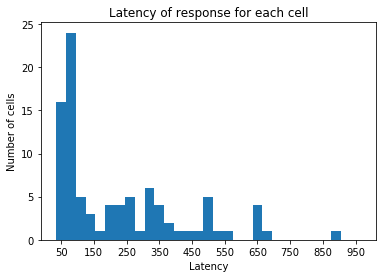

In [125]:
Nfirst=20
Ntrials=40
mouse_df=onset_bin_aliTraceBlocks['ali26_d5_s1'].loc[:, onset_bin_aliTraceBlocks['ali26_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
trials = mouse_df.columns.unique('trial')
Ntrials = trials.shape[0]
cells = mouse_df.columns.unique('cell_num')
Ncells = cells.shape[0]
tone_time=40
window_end = 60

out_bin= np.zeros((Ncells,Ntrials))
for trial in trials:
    temp_df=mouse_df[trial].loc[tone_time:window_end,:]
    a=np.array(np.where(temp_df==1))
    index = a[1]
    out_bin[index,trial-20]=1
print(out_bin.shape)

active_cells =active_cells_ali26
Nactive_cells = active_cells.shape[0]
avg_latency= np.zeros((Nactive_cells,1))
# Use enumerate maybe easy to store

for i,active_cell in enumerate(active_cells):
    binary_trials= out_bin[active_cell,:]
    active_trials= list(np.where(binary_trials==1)[0])
    #print(active_trials)
    if np.size(active_trials)==0:
        avg_latency[i] = 0
    else:
        tot_latency=0
        for trial in active_trials:
            active_trial_df= mouse_df[trial+20].loc[tone_time:window_end,active_cell]
            if len(np.where(active_trial_df==1)[0])==1:
                latency = (int(np.where(active_trial_df==1)[0])+1)*50
            else:
                latency = (int(np.where(active_trial_df==1)[0][0])+1)*50
            #print(latency)
            tot_latency+=latency
            avg_latency[i] = tot_latency/len(active_trials)
t=600
data=avg_latency[avg_latency!=0]
n_bins= np.arange(min(data), max(data)+100, 30)
plt.hist(data,n_bins,align='left')
plt.xlabel('Latency')
plt.ylabel('Number of cells')
plt.title('Latency of response for each cell')
plt.xticks(np.arange(min(data),max(data)+100,100))



In [126]:
def get_latency(mouse_df,active_cells):
    
    trials = mouse_df.columns.unique('trial')
    Ntrials = trials.shape[0]
    cells = mouse_df.columns.unique('cell_num')
    Ncells = cells.shape[0]
    tone_time=40
    window_end = 60

    out_bin= np.zeros((Ncells,Ntrials))
    for trial in trials:
        temp_df=mouse_df[trial].loc[tone_time:window_end,:]
        a=np.array(np.where(temp_df==1))
        index = a[1]
        if trials[0]==20:
            out_bin[index,trial-20]=1
        elif trials[0]==40:
             out_bin[index,trial-40]=1
        else:
             out_bin[index,trial]=1
   
    Nactive_cells = active_cells.shape[0]
    avg_latency= np.zeros((Nactive_cells,1))
    # Use enumerate maybe easy to store

    for i,active_cell in enumerate(active_cells):
        binary_trials= out_bin[active_cell,:]
        active_trials= list(np.where(binary_trials==1)[0])
        if np.size(active_trials)==0:
            avg_latency[i] = 0
        else:
            tot_latency=0
            for trial in active_trials:
                if trials[0]==20:
                    active_trial_df= mouse_df[trial+20].loc[tone_time:window_end,active_cell]
                elif trials[0]==40:
                    active_trial_df= mouse_df[trial+40].loc[tone_time:window_end,active_cell]
                else:
                    active_trial_df= mouse_df[trial].loc[tone_time:window_end,active_cell]
                if len(np.where(active_trial_df==1)[0])==1:
                    latency = (int(np.where(active_trial_df==1)[0])+1)*50
                else:
                    latency = (int(np.where(active_trial_df==1)[0][0])+1)*50
                tot_latency+=latency
                avg_latency[i] = tot_latency/len(active_trials)
    data=avg_latency[avg_latency!=0]
    t=600
    n_bins= np.arange(min(data), max(data)+100, 30)
    plt.hist(data,n_bins,align='left')
    plt.xlabel('Latency')
    plt.ylabel('Number of cells')
    plt.title('Latency of response for each cell(in ms)')
    plt.xticks(np.arange(min(data),max(data)+100,100))
    plt.axvline(t,color='r')
    return np.squeeze(data)

382.45238095238096

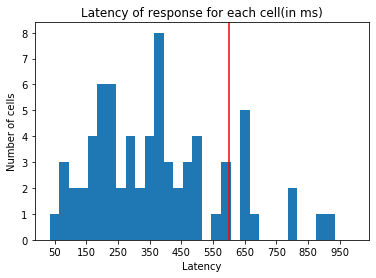

In [127]:
Nfirst=20
Ntrials=40
mouse_df=onset_bin_aliTraceBlocks['ali24_d5_s1'].loc[:, onset_bin_aliTraceBlocks['ali24_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
avg_latency_ali24_CS=get_latency(mouse_df,active_cells_ali24)
np.mean(avg_latency_ali24_CS)

454.42708333333337

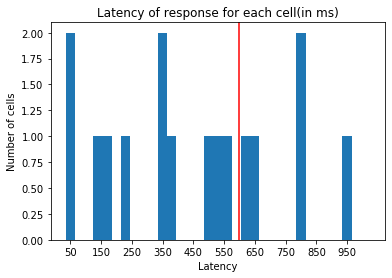

In [128]:
Nfirst=20
Ntrials=40
mouse_df=onset_bin_aliTraceBlocks['ali25_d5_s1'].loc[:, onset_bin_aliTraceBlocks['ali25_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
avg_latency_ali25_CS=get_latency(mouse_df,active_cells_ali25)
np.mean(avg_latency_ali25_CS)

236.0243328100471

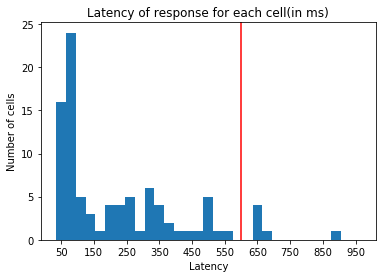

In [129]:
Nfirst=20
Ntrials=40
mouse_df=onset_bin_aliTraceBlocks['ali26_d5_s1'].loc[:, onset_bin_aliTraceBlocks['ali26_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
avg_latency_ali26_CS=get_latency(mouse_df,active_cells_ali26)
np.mean(avg_latency_ali26_CS)

399.375

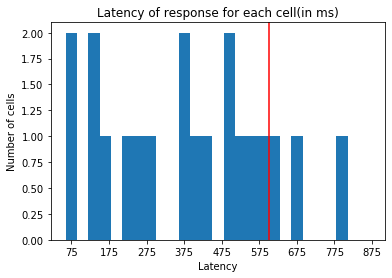

In [130]:
Nfirst=20
mouse_df=onset_bin_rTraceBlocks['2982_d9_s1'].loc[:, onset_bin_rTraceBlocks['2982_d9_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
avg_latency_2982_CS=get_latency(mouse_df,active_cells_2982)
np.mean(avg_latency_2982_CS)

399.41666666666663

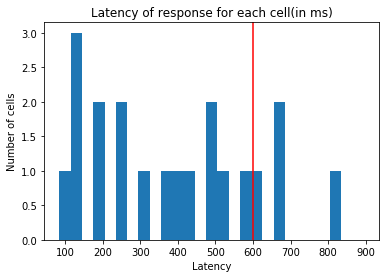

In [131]:
Nfirst=20
mouse_df=onset_bin_rTraceBlocks['4540_d9_s1'].loc[:, onset_bin_rTraceBlocks['4540_d9_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
avg_latency_4540_CS=get_latency(mouse_df,active_cells_4540)
np.mean(avg_latency_4540_CS)

514.0384615384615

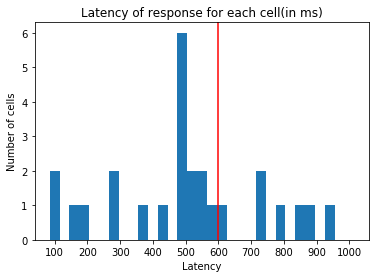

In [132]:
Nfirst=20
mouse_df=onset_bin_nrTraceBlocks['2712_d5_s1'].loc[:, onset_bin_nrTraceBlocks['2712_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
avg_latency_2712_CS=get_latency(mouse_df,active_cells_2712)
np.mean(avg_latency_2712_CS)

396.49999999999994

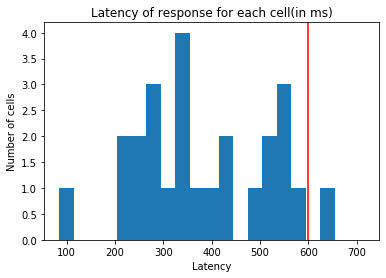

In [133]:
Nfirst=20
mouse_df=onset_bin_nrTraceBlocks['2713_d5_s1'].loc[:, onset_bin_nrTraceBlocks['2713_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
avg_latency_2713_CS=get_latency(mouse_df,active_cells_2713)
np.mean(avg_latency_2713_CS)

272.5

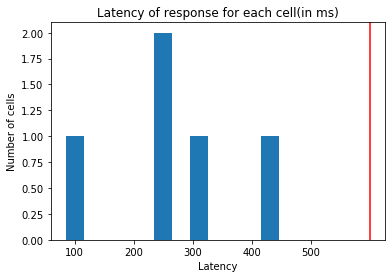

In [134]:
Nfirst=20
mouse_df=onset_bin_nrTraceBlocks['2714_d5_s1'].loc[:, onset_bin_nrTraceBlocks['2714_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
avg_latency_2714_CS=get_latency(mouse_df,active_cells_2714)
np.mean(avg_latency_2714_CS)

460.0

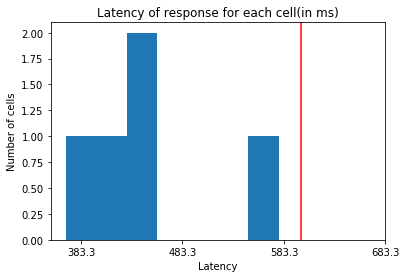

In [135]:
Nfirst=20
mouse_df=onset_bin_nrTraceBlocks['8089_d5_s1'].loc[:, onset_bin_nrTraceBlocks['8089_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
avg_latency_8089_CS=get_latency(mouse_df,active_cells_8089)
np.mean(avg_latency_8089_CS)

## Fisher's test between last day and extinction (second 20)

### n=9

In [137]:
table =[(Active_cells_EX_all,Active_cells_last_day_all),(total_cells_lastday_all-Active_cells_EX_all,total_cells_lastday_all-Active_cells_last_day_all)]
print(table)
ss.fisher_exact(table)

[(190, 299), (1731, 1622)]


(0.5954375165436879, 1.5527092261212662e-07)

In [138]:
Active_cells_EX_all/total_cells_lastday_all*100,Active_cells_last_day_all/total_cells_lastday_all*100

(9.890681936491411, 15.564809994794379)

## Fisher's test between extinction (first 20) and extinction (second 20) , n=9

In [141]:
table =[(Active_cells_EX_all_first20,Active_cells_EX_all),(total_cells_lastday_all-Active_cells_EX_all_first20,total_cells_lastday_all-Active_cells_EX_all)]
print(table)
ss.fisher_exact(table)

[(226, 190), (1695, 1731)]


(1.2147368421052631, 0.06908191507278133)

In [142]:
Active_cells_EX_all_first20/total_cells_lastday_all*100,Active_cells_EX_all/total_cells_lastday_all*100

(11.76470588235294, 9.890681936491411)

## Network analysis

In [143]:
Nfirst=20
mouse_df=onset_bin_aliTraceBlocks['ali24_d5_s1'].loc[:, onset_bin_aliTraceBlocks['ali24_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
trials = mouse_df.columns.unique('trial')
Ntrials = trials.shape[0]
cells = mouse_df.columns.unique('cell_num')
Ncells = cells.shape[0]
tone_time=40
window_end = 60
out_bin= np.zeros((Ncells,Ntrials))
mIdx = pd.MultiIndex.from_product([trials,cells], names=['trial','cell_num'])
out_df = pd.DataFrame(data=np.zeros((Ncells, Ncells*Ntrials)), columns=mIdx)
out_df.index.name='cell_num'
for trial in trials:
    temp_df=mouse_df[trial].loc[tone_time:window_end,:]
    a=np.array(np.where(temp_df==1))
    index = a[1]
    bin_arr= np.zeros(Ncells)
    bin_arr[index]=1
    bin_df = pd.DataFrame(data=np.outer(bin_arr, bin_arr).astype(int))
    bin_df.columns.name='cell_num'
    bin_df.index.name='cell_num'
    out_df[trial] = bin_df
out_df

trial     0                                       ...  19                      \
cell_num 0   1   2   3   4   5   6   7   8   9    ... 291 292 293 294 295 296   
cell_num                                          ...                           
0          0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
1          0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
2          0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
3          0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
4          0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
...       ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
296        0   0   0   0   0   0   0   0   0   0  ...   0   0   1   0   0   1   
297        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
298        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
299        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
300        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   

trial                     
cell_num 297 298 299 300  
cell_num                  
0          0   0   0   0  
1          0   0   0   0  
2          0   0   0   0  
3          0   0   0   0  
4          0   0   0   0  
...       ..  ..  ..  ..  
296        0   0   0   0  
297        0   0   0   0  
298        0   0   0   0  
299        0   0   0   0  
300        0   0   0   0  

[301 rows x 6020 columns]

In [144]:
temp_df=mouse_df[0].loc[tone_time:window_end,:]
a=np.array(np.where(temp_df==1))
index=(a[1])

bin_arr= np.zeros(Ncells)
bin_arr[index]=1
bin_arr

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [145]:
def coFireArrayCalculation(mouse_df,tone_time, puff_time):
    trials = mouse_df.columns.unique('trial')
    Ntrials = trials.shape[0]
    cells = mouse_df.columns.unique('cell_num')
    Ncells = cells.shape[0]
    out_bin= np.zeros((Ncells,Ntrials))
    mIdx = pd.MultiIndex.from_product([trials,cells], names=['trial','cell_num'])
    out_df = pd.DataFrame(data=np.zeros((Ncells, Ncells*Ntrials)), columns=mIdx)
    out_df.index.name='cell_num'
    for trial in trials:
        temp_df=mouse_df[trial].loc[tone_time:puff_time,:]
        a=np.array(np.where(temp_df==1))
        index = a[1]
        bin_arr= np.zeros(Ncells)
        bin_arr[index]=1
        bin_df = pd.DataFrame(data=np.outer(bin_arr, bin_arr).astype(int))
        bin_df.columns.name='cell_num'
        bin_df.index.name='cell_num'
        out_df[trial] = bin_df
    return out_df

In [146]:
def makePairwiseFiringMaps(block_df, tone_time=40, puff_time=60):
    #Code to make pairwise maps for each session if cells fired between the tone and puff
    #Parameters
    mice = block_df.columns.unique('mouse')
    #Loop Through and Generate Data
    pairwise_dfs=[]
    for mouse in mice:
        curPairwiseFires = coFireArrayCalculation(block_df[mouse], tone_time, puff_time)
        trials, cell_num = [curPairwiseFires.columns.unique('trial'), curPairwiseFires.columns.unique('cell_num')]
        mIdx = pd.MultiIndex.from_product([[mouse],trials,cell_num], names=['mouse','trial','cell_num'])
        curPairwiseFires.columns = mIdx
        pairwise_dfs.append(curPairwiseFires)
    allPairwiseFires = pd.concat(pairwise_dfs, axis=1)
    return allPairwiseFires

In [147]:
def makeSelfCluster(mouse_df):
    #Cluster a Pairwise Map Unto Itself
    pairedMap = mouse_df.dropna().groupby(level='cell_num',axis=1).sum()
    spec_cluster = SpectralBiclustering(n_clusters=(2,2), random_state=0, method='log')
    spec_cluster.fit(pairedMap)
    clusteredMap = pairedMap.loc[np.argsort(spec_cluster.row_labels_),:]
    clusteredMap = clusteredMap.loc[:, np.argsort(spec_cluster.column_labels_)]
    return clusteredMap, spec_cluster

In [148]:
def makeSelfCluster_3(mouse_df):
    #Cluster a Pairwise Map Unto Itself
    pairedMap = mouse_df.dropna().groupby(level='cell_num',axis=1).sum()
    spec_cluster = SpectralBiclustering(n_clusters=(3,3), random_state=0, method='log')
    spec_cluster.fit(pairedMap)
    clusteredMap = pairedMap.loc[np.argsort(spec_cluster.row_labels_),:]
    clusteredMap = clusteredMap.loc[:, np.argsort(spec_cluster.column_labels_)]
    return clusteredMap, spec_cluster

In [149]:
def makeOtherCluster(mouse_df, clus):
    #Cluster a Pairwise Map Unto Itself
    pairedMap = mouse_df.dropna().groupby(level='cell_num',axis=1).sum()
    clusteredMap = pairedMap.loc[np.argsort(clus.row_labels_),:]
    clusteredMap = clusteredMap.loc[:, np.argsort(clus.column_labels_)]
    return clusteredMap

In [150]:
def plotAllPairwiseMaps_CS(pw_df, cmin=0, cmax=None, cmap=plt.get_cmap("bwr")):
    #Plot all Pairwise Maps, with each clustered by itself
    #Fixed Plot Parameters
    maxWidth = 2.
    #Parameters
    mice = pw_df.columns.unique('mouse')
    trials = pw_df.columns.unique('trial')
    Nplots = mice.shape[0]
    if cmax == None:
        cmax = trials.shape[0]/10
    #Plotting Paramters
    layoutR, layoutC = [np.ceil(Nplots/maxWidth).astype(int), int(min(Nplots, maxWidth))]
    #Make Plots
    fig, all_ax = plt.subplots(figsize=(9, layoutR*4), nrows=layoutR, ncols=layoutC)
    fig.tight_layout()
    try: #Reshape if only one row of axes indexes
        all_ax.shape[1]
    except:
        all_ax = all_ax.reshape(1,-1)
    #Loop Through and Make Plots 
    step=0
    trialSplit = 20
    for ax_row in all_ax:
        for sel_ax in ax_row:
            if step == Nplots:
                sel_ax.set_axis_off()
            else:
                print(mice[step])
                sliced_df = pw_df.loc[:,(mice[step],0):(mice[step],trialSplit-1)]
                clusteredMap_CS, spec_cluster_CS = makeSelfCluster(sliced_df)
                sns.heatmap(clusteredMap_CS, ax=sel_ax, vmin=cmin, vmax=cmax, cmap=cmap)
                sel_ax.set_title(mice[step]+'_first{}'.format(trialSplit))
                clus_num = np.zeros(2)
                clus_size= np.zeros(2)
                step1=0
                CS_clus_inds = dict()
                for clus in range(4): #Assume biclustering with 2 main clusters
                    if np.equal(spec_cluster_CS.get_shape(clus)[0], spec_cluster_CS.get_shape(clus)[1]):
                        clus_num[step1] = clus
                        clus_size[step1] = spec_cluster_CS.get_shape(clus)[0]
                        step1+=1
                small_loc = clus_size.argmin()
                large_loc = clus_size.argmax()
                CS_clus_inds = spec_cluster_CS.get_indices(clus_num[small_loc].astype(int))[0]
                
                
                
                step+=1
                
    return clusteredMap_CS,spec_cluster_CS,CS_clus_inds

In [151]:
def plotAllPairwiseMaps_EX(pw_df, cmin=0, cmax=None, cmap=plt.get_cmap("bwr")):
    #Plot all Pairwise Maps, with each clustered by itself
    #Fixed Plot Parameters
    maxWidth = 2.
    #Parameters
    mice = pw_df.columns.unique('mouse')
    trials = pw_df.columns.unique('trial')
    Nplots = mice.shape[0]
    Ntrials = trials.shape[0]
    if cmax == None:
        cmax = trials.shape[0]/10
    #Plotting Paramters
    layoutR, layoutC = [np.ceil(Nplots/maxWidth).astype(int), int(min(Nplots, maxWidth))]
    #Make Plots
    fig, all_ax = plt.subplots(figsize=(9, layoutR*4), nrows=layoutR, ncols=layoutC)
    fig.tight_layout()
    try: #Reshape if only one row of axes indexes
        all_ax.shape[1]
    except:
        all_ax = all_ax.reshape(1,-1)
    #Loop Through and Make Plots 
    step=0
    trialSplit = 40
    for ax_row in all_ax:
        for sel_ax in ax_row:
            if step == Nplots:
                sel_ax.set_axis_off()
            else:
                print(mice[step])
                sliced_df = pw_df.loc[:,(mice[step],trialSplit):(mice[step],Ntrials-1)]
                clusteredMap_EX, spec_cluster_EX = makeSelfCluster(sliced_df)
                sns.heatmap(clusteredMap_EX, ax=sel_ax, vmin=cmin, vmax=cmax, cmap=cmap)
                sel_ax.set_title(mice[step]+'_last{}'.format(Ntrials-trialSplit))
                clus_num = np.zeros(2)
                clus_size= np.zeros(2)
                step1=0
                EX_clus_inds = dict()
                for clus in range(4): #Assume biclustering with 2 main clusters
                    if np.equal(spec_cluster_EX.get_shape(clus)[0], spec_cluster_EX.get_shape(clus)[1]):
                        clus_num[step1] = clus
                        clus_size[step1] = spec_cluster_EX.get_shape(clus)[0]
                        step1+=1
                small_loc = clus_size.argmin()
                large_loc = clus_size.argmax()
                EX_clus_inds = spec_cluster_EX.get_indices(clus_num[small_loc].astype(int))[0]
                
                
                step+=1
                
    return clusteredMap_EX,spec_cluster_EX,EX_clus_inds

In [152]:
# Use for Rebecca's mice or all trials of Ali's mice

def plotMatchedPairwiseMaps_modified_2(pw_df, whichData=None, trialSplit=20, cmin=0, cmax=None, cmap=plt.get_cmap("bwr")):
    #Plot all Pairwise Maps, with each clustered by itself
    #Fixed Plot Parameters
    maxWidth = 2.
    #Parameters
    mice = pw_df.columns.unique('mouse')
    trials = pw_df.columns.unique('trial')
    Nmice = mice.shape[0] / 2 #Divide by 3 because 3 recording sessions per mouse
    Ntrials = trials.shape[0]
    if whichData == 'Rebecca':
        Nplots = mice.shape[0] + Nmice*2 #Add 3 plots per session
    elif whichData == 'Ali':
        Nplots = mice.shape[0] + Nmice #Add 1 plot per mouse
    if cmax == None:
        cmax = trials.shape[0]/10
    #Plotting Paramters
    layoutR, layoutC = [np.ceil(Nplots/maxWidth).astype(int), int(min(Nplots, maxWidth))]
    #Make Plots
    fig, all_ax = plt.subplots(figsize=(9, layoutR*4), nrows=layoutR, ncols=layoutC)
    fig.tight_layout()
    try: #Reshape if only one row of axes indexes
        all_ax.shape[1]
    except:
        all_ax = all_ax.reshape(1,-1)
    #Loop Through and Make Plots 
    step=0
    for ridx, ax_row in enumerate(all_ax):
        for cidx, sel_ax in enumerate(ax_row):
            
            
            if whichData == 'Rebecca':
                if (ridx%2 == 0) | (ridx%2 == 1): #If 0th or 2nd order row (First Day or Last Day)
                    if (cidx%2 == 0): #If First Column of 0th or 2nd order row
                        sliced_df = pw_df.loc[:,(mice[step],0):(mice[step],trialSplit-1)]
                        CS_clusteredMap, CS_spec_cluster = makeSelfCluster(sliced_df)
                        sns.heatmap(CS_clusteredMap, ax=sel_ax, vmin=cmin, vmax=cmax, cmap=cmap)
                        sel_ax.set_title(mice[step]+'_first{}'.format(trialSplit))
                        clus_num = np.zeros(2)
                        clus_size= np.zeros(2)
                        step1=0
                        CS_clus_inds = dict()
                        for clus in range(4): #Assume biclustering with 2 main clusters
                            if np.equal(CS_spec_cluster.get_shape(clus)[0], CS_spec_cluster.get_shape(clus)[1]):
                                clus_num[step1] = clus
                                clus_size[step1] = CS_spec_cluster.get_shape(clus)[0]
                                step1+=1
                        small_loc = clus_size.argmin()
                        large_loc = clus_size.argmax()
                        CS_clus_inds = CS_spec_cluster.get_indices(clus_num[small_loc].astype(int))[0]
                    else: #If Second Column of 0th or 2nd order row
                        sliced_df = pw_df.loc[:,(mice[step],trialSplit+20):(mice[step],Ntrials-1)]
                        EX_clusteredMap, EX_spec_cluster  = makeSelfCluster(sliced_df)
                        sns.heatmap(EX_clusteredMap, ax=sel_ax, vmin=cmin, vmax=cmax, cmap=cmap)
                        sel_ax.set_title(mice[step]+'_last{}'.format(Ntrials-trialSplit-20))
                        clus_num = np.zeros(2)
                        clus_size= np.zeros(2)
                        step1=0
                        EX_clus_inds = dict()
                        for clus in range(4): #Assume biclustering with 2 main clusters
                            if np.equal(EX_spec_cluster.get_shape(clus)[0], EX_spec_cluster.get_shape(clus)[1]):
                                clus_num[step1] = clus
                                clus_size[step1] = EX_spec_cluster.get_shape(clus)[0]
                                step1+=1
                        small_loc = clus_size.argmin()
                        large_loc = clus_size.argmax()
                        EX_clus_inds = EX_spec_cluster.get_indices(clus_num[small_loc].astype(int))[0]
                        step+=1
               
    return CS_clusteredMap,CS_spec_cluster,CS_clus_inds,EX_clusteredMap,EX_spec_cluster,EX_clus_inds

In [153]:
# Last 20 trials of Ali's mice

def plotMatchedPairwiseMaps_modified_last20(pw_df, whichData=None, trialSplit=20, cmin=0, cmax=None, cmap=plt.get_cmap("bwr")):
    #Plot all Pairwise Maps, with each clustered by itself
    #Fixed Plot Parameters
    maxWidth = 2.
    #Parameters
    mice = pw_df.columns.unique('mouse')
    trials = pw_df.columns.unique('trial')
    Nmice = mice.shape[0] / 3 #Divide by 3 because 3 recording sessions per mouse
    Ntrials = trials.shape[0]
    if whichData == 'Rebecca':
        Nplots = mice.shape[0] + Nmice*3 #Add 3 plots per session
    elif whichData == 'Ali':
        Nplots = mice.shape[0] + Nmice #Add 1 plot per mouse
    if cmax == None:
        cmax = trials.shape[0]/10
    #Plotting Paramters
    layoutR, layoutC = [np.ceil(Nplots/maxWidth).astype(int), int(min(Nplots, maxWidth))]
    #Make Plots
    fig, all_ax = plt.subplots(figsize=(9, layoutR*4), nrows=layoutR, ncols=layoutC)
    fig.tight_layout()
    try: #Reshape if only one row of axes indexes
        all_ax.shape[1]
    except:
        all_ax = all_ax.reshape(1,-1)
    #Loop Through and Make Plots 
    step=0
    for ridx, ax_row in enumerate(all_ax):
        for cidx, sel_ax in enumerate(ax_row):
            print(mice[step])
            if whichData == 'Ali':
                if (ridx%2 == 0): #If Even Row
                    if (cidx%2 == 1): #Off Column without pair
                        sel_ax.set_axis_off()
                    else: #First Column of Even Rows
                        clusteredMap, spec_cluster = makeSelfCluster(pw_df[mice[step]])
                        sns.heatmap(clusteredMap, ax=sel_ax, vmin=cmin, vmax=cmax, cmap=cmap)
                        sel_ax.set_title(mice[step])
                        step+=1
                else: #If Odd Row
                    if (cidx%2 == 0): #If First Column of Odd Row
                        sliced_df = pw_df.loc[:,(mice[step],trialSplit):(mice[step],39)]
                        CS_clusteredMap, CS_spec_cluster = makeSelfCluster(sliced_df[mice[step]])
                        sns.heatmap(CS_clusteredMap, ax=sel_ax, vmin=cmin, vmax=cmax, cmap=cmap)
                        sel_ax.set_title(mice[step])
                        clus_num = np.zeros(2)
                        clus_size= np.zeros(2)
                        step1=0
                        CS_clus_inds = dict()
                        for clus in range(4): #Assume biclustering with 2 main clusters
                            if np.equal(CS_spec_cluster.get_shape(clus)[0], CS_spec_cluster.get_shape(clus)[1]):
                                clus_num[step1] = clus
                                clus_size[step1] = CS_spec_cluster.get_shape(clus)[0]
                                step1+=1
                        small_loc = clus_size.argmin()
                        large_loc = clus_size.argmax()
                        CS_clus_inds = CS_spec_cluster.get_indices(clus_num[small_loc].astype(int))[0]
                        step+=1
                    else: #If Second Column of Odd Row
                        sliced_df = pw_df.loc[:,(mice[step],trialSplit):(mice[step],39)]
                        EX_clusteredMap, EX_spec_cluster  = makeSelfCluster(sliced_df[mice[step]])
                        sns.heatmap(EX_clusteredMap, ax=sel_ax, vmin=cmin, vmax=cmax, cmap=cmap)
                        sel_ax.set_title(mice[step])
                        clus_num = np.zeros(2)
                        clus_size= np.zeros(2)
                        step1=0
                        EX_clus_inds = dict()
                        for clus in range(4): #Assume biclustering with 2 main clusters
                            if np.equal(EX_spec_cluster.get_shape(clus)[0], EX_spec_cluster.get_shape(clus)[1]):
                                clus_num[step1] = clus
                                clus_size[step1] = EX_spec_cluster.get_shape(clus)[0]
                                step1+=1
                        small_loc = clus_size.argmin()
                        large_loc = clus_size.argmax()
                        EX_clus_inds = EX_spec_cluster.get_indices(clus_num[small_loc].astype(int))[0]
                        step+=1
            
            
    return CS_clusteredMap,CS_spec_cluster,CS_clus_inds,EX_clusteredMap,EX_spec_cluster,EX_clus_inds

In [154]:
rPairwiseMaps = makePairwiseFiringMaps(onset_bin_rTraceBlocks)
nrPairwiseMaps = makePairwiseFiringMaps(onset_bin_nrTraceBlocks)
aliPairwiseMaps = makePairwiseFiringMaps(onset_bin_aliTraceBlocks)

ali24_d2_s1
ali24_d5_s1
ali24_d5_s1
ali24_d5_s2


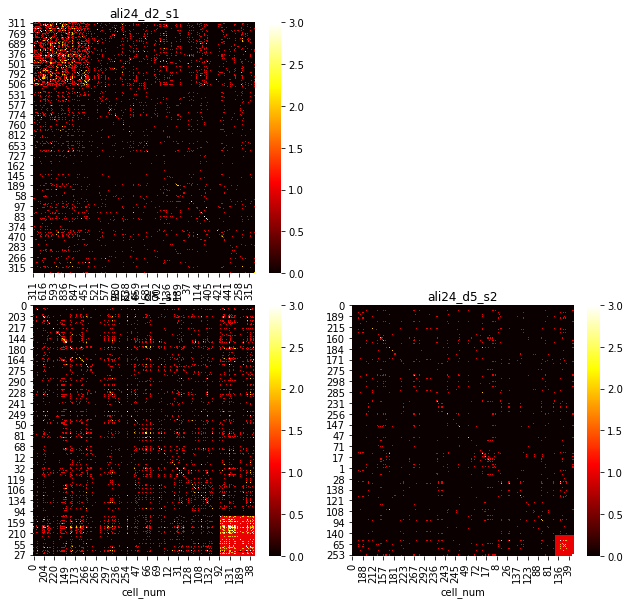

In [155]:
# Last 20 trials
CS_clusteredMap_24,CS_spec_cluster_24,CS_clus_inds_24_last20,EX_clusteredMap_24,EX_spec_cluster_24,EX_clus_inds_24_last20= plotMatchedPairwiseMaps_modified_last20(aliPairwiseMaps.loc(axis=1)[('ali24_d2_s1'):('ali24_d5_s2')], whichData='Ali', cmax=3, cmap=plt.get_cmap('hot'))
#plt.savefig('cluster_maps_ali24_last20.png',format='png',dpi=1200,transparent=True)

ali25_d2_s1
ali25_d5_s1
ali25_d5_s1
ali25_d5_s2


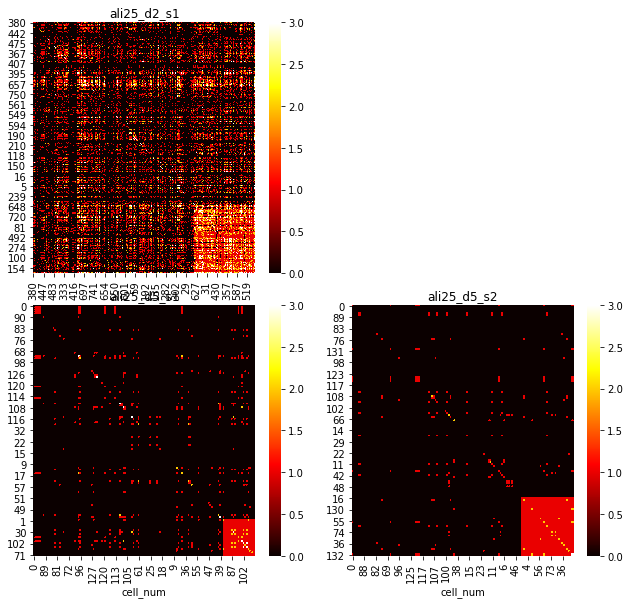

In [156]:
# Last 20 trials
CS_clusteredMap_25,CS_spec_cluster_25,CS_clus_inds_25_last20,EX_clusteredMap_25,EX_spec_cluster_25,EX_clus_inds_25_last20= plotMatchedPairwiseMaps_modified_last20(aliPairwiseMaps.loc(axis=1)[('ali25_d2_s1'):('ali25_d5_s2')], whichData='Ali', cmax=3, cmap=plt.get_cmap('hot'))
#plt.savefig('cluster_maps_ali25_last20.png',format='png',dpi=1200,transparent=True)

ali26_d2_s1
ali26_d5_s1
ali26_d5_s1
ali26_d5_s2


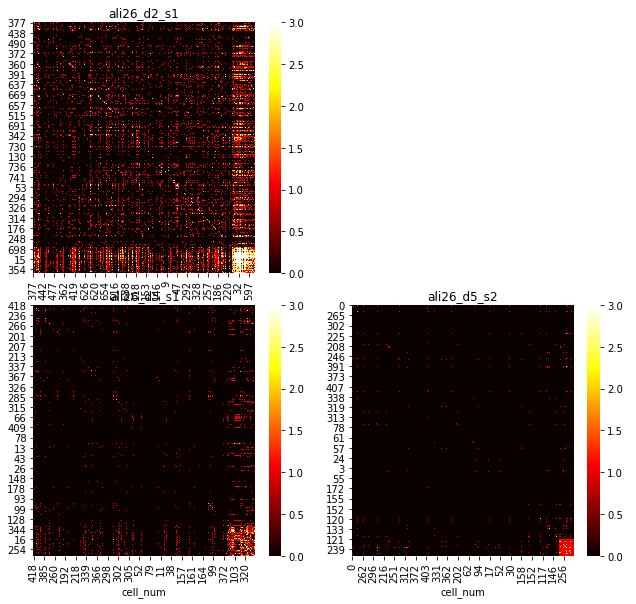

In [157]:
# Last 20 trials
CS_clusteredMap_26,CS_spec_cluster_26,CS_clus_inds_26_last20,EX_clusteredMap_26,EX_spec_cluster_26,EX_clus_inds_26_last20= plotMatchedPairwiseMaps_modified_last20(aliPairwiseMaps.loc(axis=1)[('ali26_d2_s1'):('ali26_d5_s2')], whichData='Ali', cmax=3, cmap=plt.get_cmap('hot'))
#plt.savefig('cluster_maps_ali26_last20.png',format='png',dpi=1200,transparent=True)

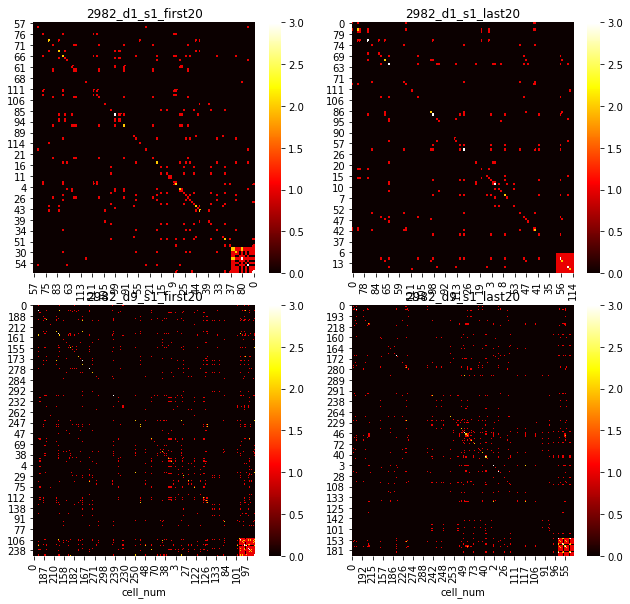

In [158]:
CS_clusteredMap_2982,CS_spec_cluster_2982,CS_all_clus_inds_2982,EX_clusteredMap_2982,EX_spec_cluster_2982,EX_all_clus_inds_2982= plotMatchedPairwiseMaps_modified_2(rPairwiseMaps.loc(axis=1)[('2982_d1_s1'):('2982_d9_s2')], whichData='Rebecca', cmax=3, cmap=plt.get_cmap('hot'))
#plt.savefig('cluster_maps_2982.png',format='png',dpi=1200,transparent=True)

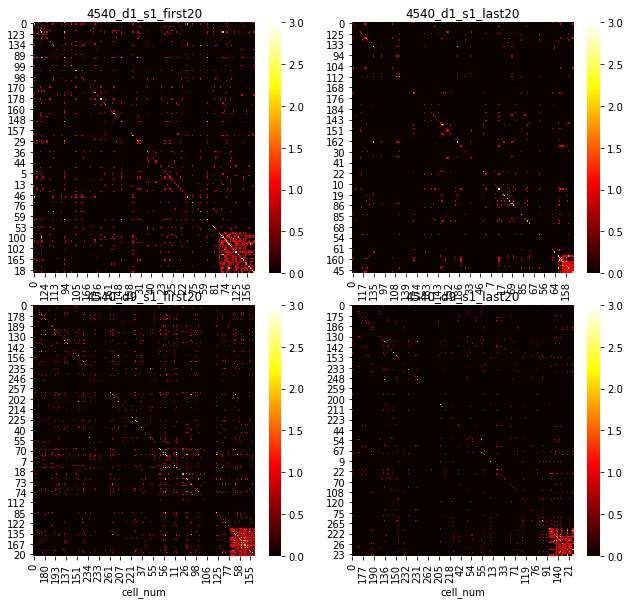

In [159]:
CS_clusteredMap_4540,CS_spec_cluster_4540,CS_all_clus_inds_4540,EX_clusteredMap_4540,EX_spec_cluster_4540,EX_all_clus_inds_4540= plotMatchedPairwiseMaps_modified_2(rPairwiseMaps.loc(axis=1)[('4540_d1_s1'):('4540_d9_s2')], whichData='Rebecca', cmax=3, cmap=plt.get_cmap('hot'))
#plt.savefig('cluster_maps_4540.png',format='png',dpi=1200,transparent=True)

2712_d1_s1
2712_d5_s1
2712_d1_s1
2712_d5_s1


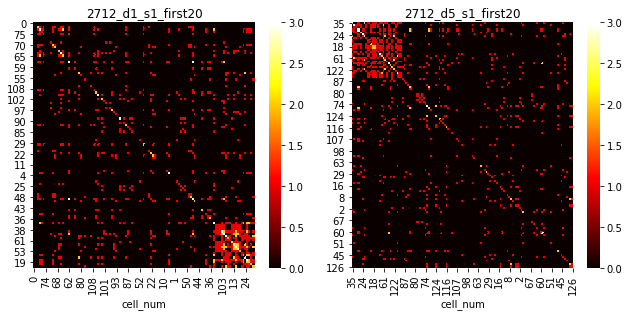

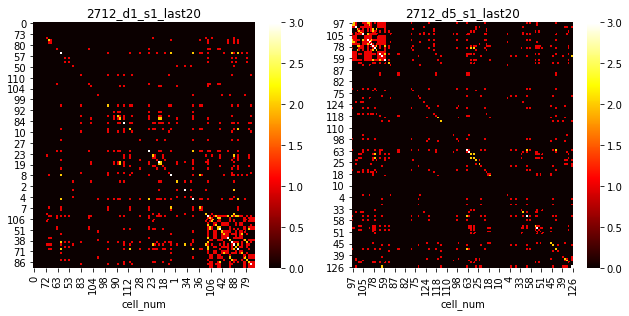

In [160]:
CS_clusteredMap_2712,CS_spec_cluster_2712,CS_all_clus_inds_2712 = plotAllPairwiseMaps_CS(nrPairwiseMaps.loc(axis=1)[('2712_d1_s1'):('2712_d5_s1')], cmax=3, cmap=plt.get_cmap('hot'))
#plt.savefig('cluster_maps_2712_first20.png',format='png',dpi=1200,transparent=True)
EX_clusteredMap_2712,EX_spec_cluster_2712,EX_all_clus_inds_2712 = plotAllPairwiseMaps_EX(nrPairwiseMaps.loc(axis=1)[('2712_d1_s1'):('2712_d5_s1')], cmax=3, cmap=plt.get_cmap('hot'))
#plt.savefig('cluster_maps_2712_last40.png',format='png',dpi=1200,transparentplotAllPairwiseMaps_CS=True)

2713_d1_s1
2713_d5_s1
2713_d1_s1
2713_d5_s1


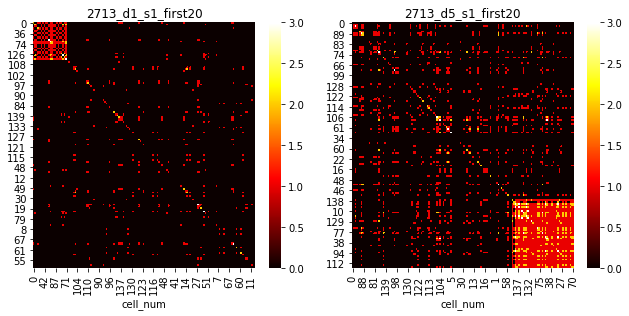

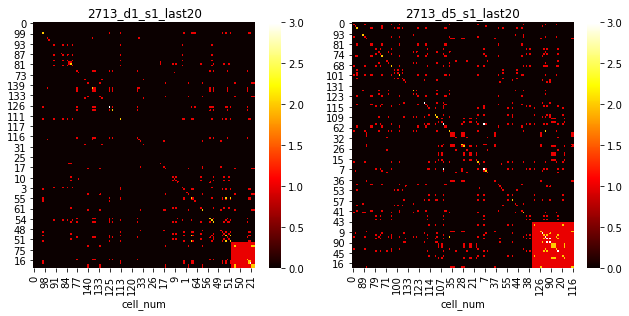

In [161]:
CS_clusteredMap_2713,CS_spec_cluster_2713,CS_all_clus_inds_2713 = plotAllPairwiseMaps_CS(nrPairwiseMaps.loc(axis=1)[('2713_d1_s1'):('2713_d5_s1')], cmax=3, cmap=plt.get_cmap('hot'))
#plt.savefig('cluster_maps_2713_first20.png',format='png',dpi=1200,transparent=True)
EX_clusteredMap_2713,EX_spec_cluster_2713,EX_all_clus_inds_2713 = plotAllPairwiseMaps_EX(nrPairwiseMaps.loc(axis=1)[('2713_d1_s1'):('2713_d5_s1')], cmax=3, cmap=plt.get_cmap('hot'))
#plt.savefig('cluster_maps_2713_last40.png',format='png',dpi=1200,transparent=True)

2714_d1_s1
2714_d5_s1
2714_d1_s1
2714_d5_s1


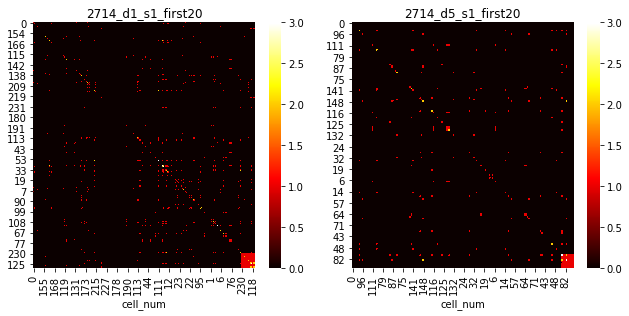

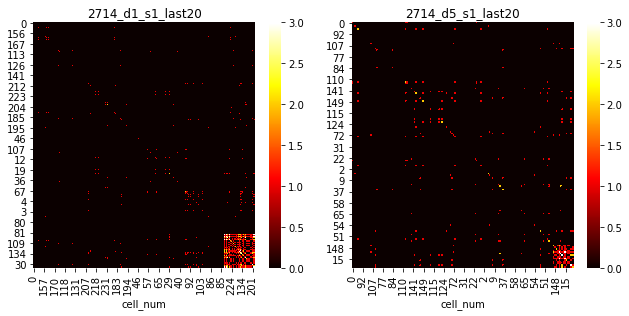

In [162]:
CS_clusteredMap_2714,CS_spec_cluster_2714,CS_all_clus_inds_2714 = plotAllPairwiseMaps_CS(nrPairwiseMaps.loc(axis=1)[('2714_d1_s1'):('2714_d5_s1')], cmax=3, cmap=plt.get_cmap('hot'))
#plt.savefig('cluster_maps_2714_first20.png',format='png',dpi=1200,transparent=True)
EX_clusteredMap_2714,EX_spec_cluster_2714,EX_all_clus_inds_2714 = plotAllPairwiseMaps_EX(nrPairwiseMaps.loc(axis=1)[('2714_d1_s1'):('2714_d5_s1')], cmax=3, cmap=plt.get_cmap('hot'))
#plt.savefig('cluster_maps_2714_last40.png',format='png',dpi=1200,transparent=True)

8089_d1_s1
8089_d5_s1
8089_d1_s1
8089_d5_s1


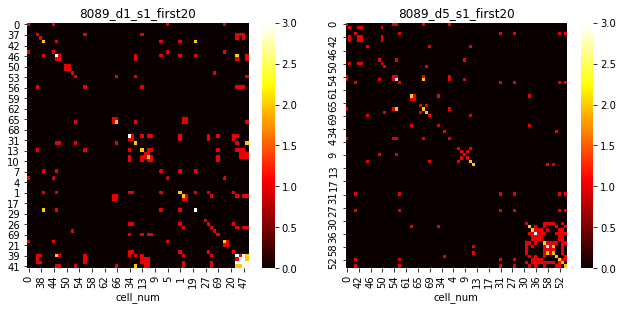

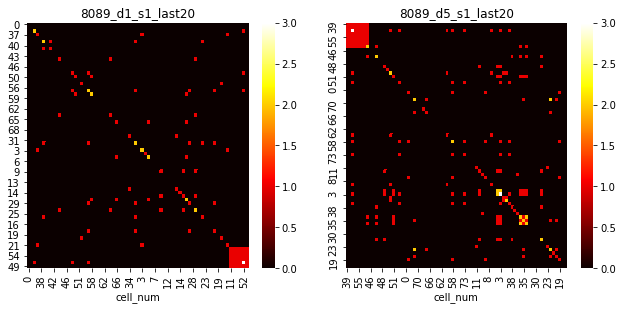

In [163]:
CS_clusteredMap_8089,CS_spec_cluster_8089,CS_all_clus_inds_8089 = plotAllPairwiseMaps_CS(nrPairwiseMaps.loc(axis=1)[('8089_d1_s1'):('8089_d5_s1')], cmax=3, cmap=plt.get_cmap('hot'))
#plt.savefig('cluster_maps_8089_first20.png',format='png',dpi=1200,transparent=True)
EX_clusteredMap_8089,EX_spec_cluster_8089,EX_all_clus_inds_8089 = plotAllPairwiseMaps_EX(nrPairwiseMaps.loc(axis=1)[('8089_d1_s1'):('8089_d5_s1')], cmax=3, cmap=plt.get_cmap('hot'))
#plt.savefig('cluster_maps_8089_last40.png',format='png',dpi=1200,transparent=True)

## Cluster maps for paper

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


48
161
130
299
122
100
175
131
232
234


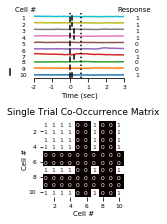

In [164]:
#Plotting for Figure Generation (Figure 4B - Schematic of Building Network)
#Font Details
label_size=7
tick_size=6
title_size=9
#Plot Pick Params
trial_pick = 22
#Make Plots
fig, all_ax = plt.subplots(figsize=(2.5, 3), nrows=2, ncols=1) #(2.5, 3)
#Get Selected Data
pick_block = aliTraceBlocks.loc(axis=1)['ali24_d5_s1', trial_pick].dropna()
pick_map = aliPairwiseMaps.loc(axis=1)['ali24_d5_s1', trial_pick].dropna()
#sns.heatmap(pick_map) #Visualize Heatmap to Pick Cells

#Loop Through and do top plot
#pick_cells = [ 131, 175, 100, 120, 299, 130, 160, 0] 
#pick_cells = [234,232, 131, 175, 100, 120, 299, 130, 160, 0] #Trial 17: [2, 3, 4, 24, 26, 30, 32, 42, 122]
pick_cells = [48,161,130,299,122,100,175,131,232,234] 
#print(np.argwhere(pick_map.values == 1)[6])
bl = 0
ax1=all_ax[0]
for cl in pick_cells:
    print(cl)
    ax1.plot(pick_block[cl]+bl)
    bl+=12
    if cl==48:
        ax1.axvline(x=42,ymin=0.02,ymax=0.07,color='k')
    if cl==299:
        ax1.axvline(x=44,ymin=0.3,ymax=0.35,color='k')
    if cl==175:
        ax1.axvline(x=44,ymin=0.6,ymax=0.65,color='k')
    if cl==131:
        ax1.axvline(x=44,ymin=0.7,ymax=0.75,color='k')
    if cl==232:
        ax1.axvline(x=42,ymin=0.8,ymax=0.85,color='k')
    if cl==234:
        ax1.axvline(x=42,ymin=0.9,ymax=0.95,color='k')
ax1.axvline(x=40, linestyle='--', color='k')
ax1.axvline(x=52, linestyle=':', color='k')
ax1.set_xlim([0,100])
ax1.set_xticks(np.arange(0,101,20))
ax1.set_xticklabels(np.arange(-2,4,1), fontsize=tick_size)
ax1.set_xlabel('Time (sec)', labelpad=2, fontsize=label_size)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.set_yticks([])
yScale=ax1.get_ylim()
ax1.set_position([0.25, 0.65, 0.5, 0.3])
#Add Scalebar
sbar_ax = fig.add_axes([0.1, 0.65, 0.03, 0.3])
sbar_ax.plot([0,0],[0,10],'k')
sbar_ax.set_ylim(yScale)
sbar_ax.axis('off')
#Add Other Text for Cell IDs
x_col = 0.181
y_col = 0.965
fig.text(x_col-0.04,y_col, 'Cell #', ha='left', va='center', fontsize=label_size)
fig.text(x_col,y_col-.04, '1', ha='left', va='center', fontsize=tick_size)
fig.text(x_col,y_col-.07, '2', ha='left', va='center', fontsize=tick_size)
fig.text(x_col,y_col-.1, '3', ha='left', va='center', fontsize=tick_size)
fig.text(x_col,y_col-.13, '4', ha='left', va='center', fontsize=tick_size)
fig.text(x_col,y_col-.16, '5', ha='left', va='center', fontsize=tick_size)
fig.text(x_col,y_col-.19, '6', ha='left', va='center', fontsize=tick_size)
fig.text(x_col,y_col-.218, '7', ha='left', va='center', fontsize=tick_size)
fig.text(x_col,y_col-.244, '8', ha='left', va='center', fontsize=tick_size)
fig.text(x_col,y_col-.274, '9', ha='left', va='center', fontsize=tick_size)
fig.text(x_col-0.015,y_col-.302, '10', ha='left', va='center', fontsize=tick_size)
#Add Other Text for Response IDs
x_col = 0.81
y_col = 0.965
fig.text(x_col-0.1,y_col, 'Response', ha='left', va='center', fontsize=label_size)
fig.text(x_col,y_col-.04, '1', ha='left', va='center', fontsize=tick_size)
fig.text(x_col,y_col-.07, '1', ha='left', va='center', fontsize=tick_size)
fig.text(x_col,y_col-.1, '1', ha='left', va='center', fontsize=tick_size)
fig.text(x_col,y_col-.13, '1', ha='left', va='center', fontsize=tick_size)
fig.text(x_col,y_col-.16, '0', ha='left', va='center', fontsize=tick_size)
fig.text(x_col,y_col-.19, '0', ha='left', va='center', fontsize=tick_size)
fig.text(x_col,y_col-.218, '1', ha='left', va='center', fontsize=tick_size)
fig.text(x_col,y_col-.244, '0', ha='left', va='center', fontsize=tick_size)
fig.text(x_col,y_col-.274, '0', ha='left', va='center', fontsize=tick_size)
fig.text(x_col,y_col-.302, '1', ha='left', va='center', fontsize=tick_size)

#Bottom Plot
response_vector = np.array([1,1,1,1,0,0,1,0,0,1])
ex_table = np.outer(response_vector, response_vector)
ax2=all_ax[1]
sns.heatmap(ex_table, ax=ax2, annot=True, annot_kws={'fontsize':tick_size, 'ha':'right'}, cbar=False, cmap=plt.get_cmap('hot'))
ax2.set_position([0.3, 0.1, 0.45, 0.35])
ax2.set_xticks(np.arange(1,11,2)+.35)
ax2.set_xticklabels(np.arange(2,11,2), fontsize=tick_size)
ax2.set_xlabel('Cell #', fontsize=label_size, labelpad=2)
ax2.set_yticks(np.arange(1,11,2)+.35)
ax2.set_yticklabels(np.arange(2,11,2), fontsize=tick_size, rotation=0)
ax2.set_ylabel('Cell #', fontsize=label_size, labelpad=1)
ax2.set_title('Single Trial Co-Occurrence Matrix', fontsize=title_size)

plt.savefig('Co_occurrenceCreation.png', format='png', dpi=1200, transparent=True)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


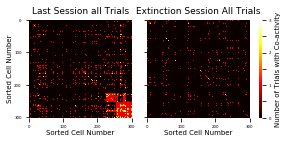

In [165]:
#Plotting for Figure Generation (Figure 4C - Squint/No Squint Cluster Comparisons Last Session - New)
#Font Details
label_size=7
tick_size=4
title_size=9
#Plot Scaling
cmin, cmax = [0, 3]
#Make Plots
fig, all_ax = plt.subplots(figsize=(4.1, 2), nrows=1, ncols=3) #(5.5, 2)
pick='hot'
ms_sel = 'ali24_d5_s1'

#First Plot
sel_ax1 = all_ax[0]
#Behavior for Both
cur_behav1 = aliBehaviorScoring.loc[20:39][ms_sel]
#cur_behav=behav_df[mice[cidx]].loc[20:39]
blinkTrials1=cur_behav1.index[cur_behav1]
noBlinkTrials1=cur_behav1.index[~cur_behav1]
#Cells of Interest
cur_maps1 = aliPairwiseMaps.loc(axis=1)[ms_sel].loc(axis=1)[20:39]
#Generate Cluster from All Sessions
blinkClusteredMap1, spec_cluster1 = makeSelfCluster_3(cur_maps1)
sns.heatmap(blinkClusteredMap1, ax=sel_ax1, vmin=cmin, vmax=cmax, cmap=plt.get_cmap(pick), cbar=False)
#Plot Additional Portions
Ncells1 = blinkClusteredMap1.shape[0]
sel_ax1.set_title('Last Session all Trials', fontsize=title_size)
sel_ax1.set_xticks(range(0,Ncells1,100))
sel_ax1.set_xticklabels(range(0,Ncells1,100), rotation=0)
sel_ax1.tick_params(labelsize=tick_size)
sel_ax1.set_xlabel('Sorted Cell Number', fontsize=label_size, labelpad=1)
sel_ax1.set_yticks(range(0,Ncells1,100))
sel_ax1.set_yticklabels(range(0,Ncells1,100), rotation=0)
sel_ax1.set_ylabel('Sorted Cell Number', fontsize=label_size, labelpad=1)
sel_ax1.set_position([0.1, 0.15, 0.35, 0.68])

#Second Plot
sel_ax2 = all_ax[1]
cbar_ax = all_ax[2]
ms_sel2 = 'ali24_d5_s2'
#Behavior All Ready Selected Above
cur_maps2 = aliPairwiseMaps.loc(axis=1)[ms_sel2].loc(axis=1)[20:39]
#Generate Cluster from All Sessions
blinkClusteredMap2 = makeOtherCluster(cur_maps2,spec_cluster1)
sns.heatmap(blinkClusteredMap2, ax=sel_ax2, vmin=cmin, vmax=cmax, cmap=plt.get_cmap(pick), cbar=True, cbar_ax=cbar_ax)
#Plot Additional Portions
Ncells2 = blinkClusteredMap2.shape[0]
sel_ax2.set_title('Extinction Session All Trials', fontsize=title_size)
sel_ax2.set_xticks(range(0,Ncells2,100))
sel_ax2.set_xticklabels(range(0,Ncells2,100), rotation=0)
sel_ax2.tick_params(labelsize=tick_size)
sel_ax2.set_xlabel('Sorted Cell Number', fontsize=label_size, labelpad=1)
sel_ax2.set_yticks(range(0,Ncells2,100))
sel_ax2.set_yticklabels('')
sel_ax2.set_position([0.5, 0.15, 0.35, 0.68])

#Colorbar Axes Changes
cbar_ax.set_position([0.88, 0.15, 0.01, 0.68])
cbar_ax.tick_params(labelsize=tick_size)
#cbar_ax.set_ticks([0,1,2,3])
cbar_ax.set_yticklabels(['0','','1','', '2','','3'])
cbar_ax.set_ylabel('Number of Trials with Co-activity', fontsize=label_size)

plt.savefig('LastSession_plus_EX_same_order_2clusters.png', format='png',dpi=1200)

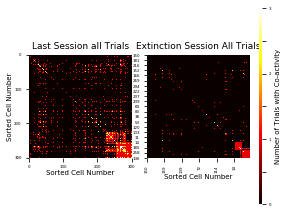

In [166]:
#Plotting for Figure Generation (Figure 4C - Squint/No Squint Cluster Comparisons Last Session - New)
#Font Details
label_size=7
tick_size=4
title_size=9
#Plot Scaling
cmin, cmax = [0, 3]
#Make Plots
fig, all_ax = plt.subplots(figsize=(4.1, 4), nrows=1, ncols=3) #(5.5, 2)
pick='hot'
ms_sel = 'ali24_d5_s1'

#First Plot
sel_ax1 = all_ax[0]
#Behavior for Both
cur_behav1 = aliBehaviorScoring.loc[20:39][ms_sel]
#cur_behav=behav_df[mice[cidx]].loc[20:39]
blinkTrials1=cur_behav1.index[cur_behav1]
noBlinkTrials1=cur_behav1.index[~cur_behav1]
#Cells of Interest
cur_maps1 = aliPairwiseMaps.loc(axis=1)[ms_sel].loc(axis=1)[20:39]
#Generate Cluster from All Sessions
blinkClusteredMap1, spec_cluster1 = makeSelfCluster_3(cur_maps1)
sns.heatmap(blinkClusteredMap1, ax=sel_ax1, vmin=cmin, vmax=cmax, cmap=plt.get_cmap(pick), cbar=False)
#Plot Additional Portions
Ncells1 = blinkClusteredMap1.shape[0]
sel_ax1.set_title('Last Session all Trials', fontsize=title_size)
sel_ax1.set_xticks(range(0,Ncells1,100))
sel_ax1.set_xticklabels(range(0,Ncells1,100), rotation=0)
sel_ax1.set_aspect('equal')
sel_ax1.tick_params(labelsize=tick_size)
sel_ax1.set_xlabel('Sorted Cell Number', fontsize=label_size, labelpad=1)
sel_ax1.set_yticks(range(0,Ncells1,100))
sel_ax1.set_yticklabels(range(0,Ncells1,100), rotation=0)
sel_ax1.set_ylabel('Sorted Cell Number', fontsize=label_size, labelpad=1)
sel_ax1.set_position([0.1, 0.15, 0.35, 0.68])

#Second Plot
sel_ax2 = all_ax[1]
cbar_ax = all_ax[2]
ms_sel2 = 'ali24_d5_s2'
#Behavior All Ready Selected Above
cur_maps2= aliPairwiseMaps.loc(axis=1)[ms_sel2].loc(axis=1)[20:39]
#Generate Cluster from All Sessions
blinkClusteredMap2, spec_cluster2 = makeSelfCluster_3(cur_maps2)
sns.heatmap(blinkClusteredMap2, ax=sel_ax2, vmin=cmin, vmax=cmax, cmap=plt.get_cmap(pick), cbar=True, cbar_ax=cbar_ax)
#Plot Additional Portions
Ncells2 = blinkClusteredMap2.shape[0]
sel_ax2.set_title('Extinction Session All Trials', fontsize=title_size)
sel_ax2.set_aspect('equal')
#sel_ax2.set_xticks(range(0,Ncells2,100))
#sel_ax2.set_xticklabels(range(0,Ncells2,100), rotation=0)
sel_ax2.tick_params(labelsize=tick_size)
sel_ax2.set_xlabel('Sorted Cell Number', fontsize=label_size, labelpad=1)
#sel_ax2.set_yticks(range(0,Ncells2,100))
#sel_ax2.set_yticklabels('')
sel_ax2.set_position([0.5, 0.15, 0.35, 0.68])

#Colorbar Axes Changes
cbar_ax.set_position([0.88, 0.15, 0.01, 0.68])
cbar_ax.tick_params(labelsize=tick_size)
#cbar_ax.set_ticks([0,1,2,3])

cbar_ax.set_yticklabels(['0','','1','', '2','','3'])
cbar_ax.set_ylabel('Number of Trials with Co-activity', fontsize=label_size)

plt.savefig('EX_clustered_2clusters.png', format='png', dpi=1200, transparent=True)

### Centroid calculation for networks

In [167]:
def arrayToDataFrame(arr, higherLevel=None):
    #Convert (cells, rows, cols) to a MultiIndex DataFrame by looping through
    out_list = []
    Ncells, r, c = arr.shape
    for cellID, frame in enumerate(arr):
        if higherLevel != None:
            mIdx = pd.MultiIndex.from_product([[higherLevel],[cellID],range(c)], names=['mouse','cell_num','pixel_num'])
        else:
            mIdx = pd.MultiIndex.from_product([[cellID],range(c)], names=['cell_num', 'pixel_num'])
        out_list.append(pd.DataFrame(data=frame, index=range(r), columns=mIdx))
    return pd.concat(out_list, axis=1)

In [168]:
def loadSelROIs(files):
    #Loop through files and load ROI maps from inputted data
    roiArrays=[]
    roiColors = []   
    for idx, f in enumerate(files):
        name = f.split('/')[-2]
        print('Loading ROIs for {}'.format(name))
        #Load ROI Masks
        f_open = h5py.File(f, 'r')
        cur_roi = np.array(f_open['/rois/ROImasks'])
        #Convert ROIs to DataFrames
        cur_roi_df = arrayToDataFrame(cur_roi, higherLevel=name)
        roiArrays.append(cur_roi_df)
        #Load Saved Color Array
        Ncells = cur_roi.shape[0]
        cIdx = pd.MultiIndex.from_product([[name],range(Ncells)])
        cur_color_df = pd.DataFrame(data=np.array(f_open['color']).T, columns=cIdx)
        roiColors.append(cur_color_df)
        f_open.close()
    colorOut = pd.concat(roiColors, axis=1)
    
    return cur_roi, roiArrays

In [169]:
def matchCellMap(rois, match_df):
    #Function to compare match values in a dataframe and output only those matched in appropriate sessions
    mice = rois.columns.unique('mouse')
    pixel_num = rois.columns.unique('pixel_num')
    matchedInds=[]
    for mouse in mice:
        print(mouse)
        if ('d5' in mouse): #If a d5 Session with Matching
            match_sess = match_df[mouse].dropna()
            if ('s1' in mouse):
                search_col = 'firstExtinction'
                sel_col = 'lastTraining'
                sel_inds = (match_sess.loc[(match_sess[search_col] != -1), sel_col] - 1).values.astype(int)
                roi_sess = rois[mouse]
                out_sess = roi_sess.loc[:,sel_inds]
            elif ('s2' in mouse):
                search_col = 'lastTraining'
                sel_col = 'firstExtinction'
                #Number Magic because Pandas Dataframes with MultiIndexing doesn't sort correctly... :(
                sel_inds_wrongSorting = (match_sess.loc[(match_sess[search_col] != -1), sel_col] - 1).values.astype(int)
                sel_inds_toSort = (match_sess.loc[(match_sess[search_col] != -1), search_col] - 1).values.astype(int)
                sorting_inds = np.argsort(sel_inds_toSort)
                sel_inds = sel_inds_wrongSorting[sorting_inds]
                corr_sorting_multi_cols = pd.MultiIndex.from_product([sel_inds, pixel_num], names=['cell_num', 'pixel_num'])
                roi_sess = rois[mouse]
                out_sess = roi_sess[corr_sorting_multi_cols]
            mIdx = pd.MultiIndex.from_product([[mouse],range(sel_inds.shape[0]),pixel_num], names=['mouse','cell_num','pixel_num'])
            out_sess.columns = mIdx
            matchedInds.append(out_sess)
        else: #No d5 Session with Matching
            noChange = rois[mouse]
            noChange.columns = pd.MultiIndex.from_product([[mouse],noChange.columns], names=['mouse','cell_num','pixel_num'])
            matchedInds.append(noChange)
    return pd.concat(matchedInds, axis=1),sel_inds

In [170]:
#Loading ROI Data for Figure 3 - ali24
#Selected Mice Case - Day 5 - Last Day & Extinction
def loading_masks_ali(mouse_number):
    selMouse, selDay, selSess = [[mouse_number], [5], [2]]
#Load ROI Data for Figure 3B
    selFolders, selFilenames = makeAliFilenames(selMouse, selDay, selSess)
    selFiles = combineFilenames(aliBase, selFolders, selFilenames)
    aMouse, aDay, aSess = [[mouse_number], [5], [1]]
    aFolders, aFilenames = makeAliFilenames(aMouse, aDay, aSess)
    aFiles =combineFilenames(aliBase, aFolders, aFilenames)
#Load ROI Masks
    print('Loading ROIs')
    cur_roi_s2, roiArrays = loadSelROIs(selFiles)
    cur_roi_s1, rArrays = loadSelROIs(aFiles)
    roiArrayDF = pd.concat(roiArrays,axis=1)
    print(roiArrayDF.columns.unique('mouse'))

   #Match ROI Arrays
    #aliMatchROIs,cell_inds = matchCellMap(roiArrayDF, aliMatchInds)
    return cur_roi_s1,cur_roi_s2

In [171]:
cur_roi_s1_24,cur_roi_s2_24=loading_masks_ali(24)
cur_roi_s1_25,cur_roi_s2_25=loading_masks_ali(25)
cur_roi_s1_26,cur_roi_s2_26=loading_masks_ali(26)

Loading ROIs
Loading ROIs for ali24_d5_s2
Loading ROIs for ali24_d5_s1
Index(['ali24_d5_s2'], dtype='object', name='mouse')
Loading ROIs
Loading ROIs for ali25_d5_s2
Loading ROIs for ali25_d5_s1
Index(['ali25_d5_s2'], dtype='object', name='mouse')
Loading ROIs
Loading ROIs for ali26_d5_s2
Loading ROIs for ali26_d5_s1
Index(['ali26_d5_s2'], dtype='object', name='mouse')


In [172]:
def getting_matched_indices(mouse_number):
    selMouse, selDay, selSess = [[mouse_number], [5], [1,2]]
    selFolders, selFilenames = makeAliFilenames(selMouse, selDay, selSess)
    selFiles = combineFilenames(aliBase, selFolders, selFilenames)
    cur_roi, roiArrays = loadSelROIs(selFiles)
    roiArrayDF = pd.concat(roiArrays,axis=1)
    print(roiArrayDF.columns.unique('mouse'))
    cur_roi,cell_inds = matchCellMap(roiArrayDF, aliMatchInds)
    return cell_inds    

In [173]:
cell_inds_24 = getting_matched_indices(24)
cell_inds_25 = getting_matched_indices(25)
cell_inds_26 = getting_matched_indices(26)

Loading ROIs for ali24_d5_s1
Loading ROIs for ali24_d5_s2
Index(['ali24_d5_s1', 'ali24_d5_s2'], dtype='object', name='mouse')
ali24_d5_s1
ali24_d5_s2
Loading ROIs for ali25_d5_s1
Loading ROIs for ali25_d5_s2
Index(['ali25_d5_s1', 'ali25_d5_s2'], dtype='object', name='mouse')
ali25_d5_s1
ali25_d5_s2
Loading ROIs for ali26_d5_s1
Loading ROIs for ali26_d5_s2
Index(['ali26_d5_s1', 'ali26_d5_s2'], dtype='object', name='mouse')
ali26_d5_s1
ali26_d5_s2


In [174]:
# Loading masks from session 2 of only matched cells 
matched_cur_roi_s2_24= cur_roi_s2_24[cell_inds_24,:,:]
matched_cur_roi_s2_25= cur_roi_s2_24[cell_inds_25,:,:]
matched_cur_roi_s2_26= cur_roi_s2_26[cell_inds_26,:,:]

# converting to integer list
cell_inds_26_s1 =list(map(int,list(aliMatchInds['ali26_d5_s2'].lastTraining[cell_inds_26]-1)))
cell_inds_25_s1 = list(map(int,list(aliMatchInds['ali25_d5_s2'].lastTraining[cell_inds_25]-1)))
cell_inds_24_s1 = list(map(int,list(aliMatchInds['ali24_d5_s2'].lastTraining[cell_inds_24]-1)))

matched_cur_roi_s1_24= cur_roi_s1_24[cell_inds_24_s1,:,:]
matched_cur_roi_s1_25= cur_roi_s1_25[cell_inds_25_s1,:,:]
matched_cur_roi_s1_26= cur_roi_s1_26[cell_inds_26_s1,:,:]

In [175]:
# Centroids for Ali's mice 

def calc_centroid(cel_inds,matched_cur_roi):
    x_centroid_s2= []
    y_centroid_s2 =[]
    counter = np.arange(0,cel_inds.shape[0],1)
    for j in counter:
        binarymask_cell = matched_cur_roi[j,:,:]
        count = (binarymask_cell==1).sum()
        x_c,y_c =np.argwhere(binarymask_cell==1).sum(0)/count
        x_centroid_s2.append(x_c)
        y_centroid_s2.append(y_c)
        ROI_Centroids_s2 = np.column_stack((x_centroid_s2,y_centroid_s2))
    return ROI_Centroids_s2

In [176]:
# Calculating centroids for ali 24,ali25 and ali26
# Extinction session 
centroids_s2_24 = calc_centroid(cell_inds_24,matched_cur_roi_s2_24)
centroids_s2_25 = calc_centroid(cell_inds_25,matched_cur_roi_s2_25)
centroids_s2_26 = calc_centroid(cell_inds_26,matched_cur_roi_s2_26)
# Conditioning session
centroids_s1_24 = calc_centroid(cell_inds_24,matched_cur_roi_s1_24)
centroids_s1_25 = calc_centroid(cell_inds_25,matched_cur_roi_s1_25)
centroids_s1_26 = calc_centroid(cell_inds_26,matched_cur_roi_s1_26)


In [179]:
def load_plus_centroid_masks_rMice(rMouse):
    rBase = '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/'
    rMice, rDays, rSessions = ([rMouse], [9], [1])
    rFolders, rFilenames = makeRebeccaFilenames(rMice, rDays, rSessions)
    rFiles = combineFilenames(rBase, rFolders, rFilenames)
    cur_roi, roiArrays = loadSelROIs(rFiles)
    x_centroid= []
    y_centroid =[]
    counter = np.arange(0,cur_roi.shape[0],1)
    for j in counter:
        binarymask_cell = cur_roi[j,:,:]
        count = (binarymask_cell==1).sum()
        x_c,y_c =np.argwhere(binarymask_cell==1).sum(0)/count
        x_centroid.append(x_c)
        y_centroid.append(y_c)
        ROI_Centroids = np.column_stack((x_centroid,y_centroid))
    return ROI_Centroids

In [180]:
centroids_2982=load_plus_centroid_masks_rMice('2982')
centroids_4540=load_plus_centroid_masks_rMice('4540')


Loading ROIs for 2982_d9_s1
Loading ROIs for 4540_d9_s1


In [183]:
def load_plus_centroid_masks_nrMice(nrMouse):
    nrBase = '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/'
    nrMice, nrDays, nrSessions = ([nrMouse], [5], [1]) #Also have 2 as full imaging session.  Drop 2714 because of data quality
    nrFolders, nrFilenames = makeRebeccaFilenames(nrMice, nrDays, nrSessions)
    nrFiles = combineFilenames(nrBase, nrFolders, nrFilenames)
    cur_roi, roiArrays = loadSelROIs(nrFiles)
    x_centroid= []
    y_centroid =[]
    counter = np.arange(0,cur_roi.shape[0],1)
    for j in counter:
        binarymask_cell = cur_roi[j,:,:]
        count = (binarymask_cell==1).sum()
        x_c,y_c =np.argwhere(binarymask_cell==1).sum(0)/count
        x_centroid.append(x_c)
        y_centroid.append(y_c)
        ROI_Centroids = np.column_stack((x_centroid,y_centroid))
    return ROI_Centroids

In [184]:
centroids_2713=load_plus_centroid_masks_nrMice('2713')
centroids_2714=load_plus_centroid_masks_nrMice('2714')
centroids_2712= load_plus_centroid_masks_nrMice('2712')
centroids_8089=load_plus_centroid_masks_nrMice('8089')


Loading ROIs for 2713_d5_s1
Loading ROIs for 2714_d5_s1
Loading ROIs for 2712_d5_s1
Loading ROIs for 8089_d5_s1


In [185]:
total_nodes_ali24 = centroids_s2_24.shape[0]
print(total_nodes_ali24)
total_nodes_ali25 = centroids_s1_25.shape[0]
print(total_nodes_ali25)
total_nodes_ali26 = centroids_s1_26.shape[0]
print(total_nodes_ali26)
total_nodes_2982 = centroids_2982.shape[0]
print(total_nodes_2982)
total_nodes_4540 = centroids_4540.shape[0]
print(total_nodes_4540)
total_nodes_2712 = centroids_2712.shape[0]
print(total_nodes_2712)
total_nodes_2713 = centroids_2713.shape[0]
print(total_nodes_2713)
total_nodes_2714 = centroids_2714.shape[0]
print(total_nodes_2714)
total_nodes_8089 = centroids_8089.shape[0]
print(total_nodes_8089)

301
133
419
308
266
127
141
153
75


## Network figures 

In [203]:
# Function to make network maps with total connections 
# Clsuter map to draw edges 
def make_networkmaps_active_cell_connections(centroids,clustered_map,active_cells):
    G1_f = nx.Graph()
    color_map=[]
    counter = np.arange(0,centroids.shape[0],1)
    for j in counter:
        G1_f.add_node(j+1,pos=centroids[j])
    pos=nx.get_node_attributes(G1_f,'pos')

    for node in G1_f:
            color_map.append('#A9A9A9')
    
    columns = active_cells


    # All connections 
    #symmetric andf diagonal also does not matter)
    for i in columns:
        for j in columns:
            if i>j and clustered_map.loc[i][j] >0:
                G1_f.add_edge(i+1,j+1,color=[1,.1,.1,0.5])
                       
    edges = G1_f.edges()
    colors = [G1_f[u][v]['color'] for u,v in edges]
   

   
    # Total edges 
    a = nx.number_of_edges(G1_f)
     
    # Total edge density in  graph
    b = nx.density(G1_f)
     
    return a,b,G1_f

In [187]:
def make_networkmaps_active_cell_connections_CS_plot(centroids,clustered_map,active_cells):
    G1_f = nx.Graph()
    color_map=[]
    counter = np.arange(0,centroids.shape[0],1)
    for j in counter:
        G1_f.add_node(j+1,pos=centroids[j])
    pos=nx.get_node_attributes(G1_f,'pos')

    for node in G1_f:
            color_map.append('#A9A9A9')
    
    columns = active_cells


    # All connections 
    #symmetric andf diagonal also does not matter)
    for i in columns:
        for j in columns:
            if i>j and clustered_map.loc[i][j] >0:
                G1_f.add_edge(i+1,j+1,color=[1,.1,.1,0.5])
                       
    edges = G1_f.edges()
    colors = [G1_f[u][v]['color'] for u,v in edges]
   
    nx.draw(G1_f,pos,node_color=color_map,edge_color=colors,with_labels=False,node_size=10,width=0.1)
   
    # Total edges 
    a = nx.number_of_edges(G1_f)
     
    # Total edge density in  graph
    b = nx.density(G1_f)
     
    return a,b,G1_f

In [188]:
def make_networkmaps_active_cell_connections_EX_plot(centroids,clustered_map,active_cells):
    G1_f = nx.Graph()
    color_map=[]
    counter = np.arange(0,centroids.shape[0],1)
    for j in counter:
        G1_f.add_node(j+1,pos=centroids[j])
    pos=nx.get_node_attributes(G1_f,'pos')

    for node in G1_f:
            color_map.append('#A9A9A9')
    
    columns = active_cells


    # All connections 
    #symmetric andf diagonal also does not matter)
    for i in columns:
        for j in columns:
            if i>j and clustered_map.loc[i][j] >0:
                G1_f.add_edge(i+1,j+1,color=[0,.25,1,0.5])
                       
    edges = G1_f.edges()
    colors = [G1_f[u][v]['color'] for u,v in edges]
    nx.draw(G1_f,pos,node_color=color_map,edge_color=colors,with_labels=False,node_size=10,width=0.1)
    
    # Total edges 
    a = nx.number_of_edges(G1_f)
     
    # Total edge density in  graph
    b = nx.density(G1_f)
     
    return a,b,G1_f

In [189]:
# Function to overlay CS and EX edges 

def make_networkmaps_colored_edges_CS_EX_active(centroids,CS_clustered_map,EX_clustered_map,active_cells):
    G1_f = nx.Graph()
    color_map=[]
    counter = np.arange(0,centroids.shape[0],1)
    for j in counter:
        G1_f.add_node(j+1,pos=centroids[j])
    pos=nx.get_node_attributes(G1_f,'pos')

    # All cells in black
    for node in G1_f: 
        color_map.append('#A9A9A9')
    
    columns = active_cells


    # All connections 
    #symmetric andf diagonal also does not matter
    for i in columns:
        for j in columns:
            # Connections in red for blink map
            
            if i>j and CS_clustered_map.loc[i][j] >0:
                G1_f.add_edge(i+1,j+1,color=[1,.1,.1,0.5])
            # Connections in blue for no blink map
            if i>j and EX_clustered_map.loc[i][j] >0:
                G1_f.add_edge(i+1,j+1,color=[0,.25,1,0.5])
            if i>j and CS_clustered_map.loc[i][j] >0 and EX_clustered_map.loc[i][j] >0:
                G1_f.add_edge(i+1,j+1,color='#000000')
            
            
                        
    edges = G1_f.edges()
    colors = [G1_f[u][v]['color'] for u,v in edges]
    nx.draw(G1_f,pos,node_color=color_map,edge_color=colors,with_labels=False,node_size=10,width=0.1)
                       
    #nx.draw(G1_f,pos,node_color=color_map,edge_color='b',with_labels=False,node_size=20,width=0.1) 
    a = nx.number_of_edges(G1_f)
     
    # Total edge density in  graph
    b = nx.density(G1_f)
    
    return a,b

In [190]:
# Function to overlay CS and EX edges 

def make_networkmaps_colored_edges_CS_EX_active_thicker(centroids,CS_clustered_map,EX_clustered_map,active_cells):
    G1_f = nx.Graph()
    color_map=[]
    counter = np.arange(0,centroids.shape[0],1)
    for j in counter:
        G1_f.add_node(j+1,pos=centroids[j])
    pos=nx.get_node_attributes(G1_f,'pos')

    # All cells in black
    for node in G1_f: 
        color_map.append('#A9A9A9')
    
    columns = active_cells


    # All connections 
    #symmetric andf diagonal also does not matter
    for i in columns:
        for j in columns:
            # Connections in red for blink map
            
            if i>j and CS_clustered_map.loc[i][j] >0:
                G1_f.add_edge(i+1,j+1,color=[1,.1,.1,0.5],weight=0.1)
            # Connections in blue for no blink map
            if i>j and EX_clustered_map.loc[i][j] >0:
                G1_f.add_edge(i+1,j+1,color=[0,.25,1,0.5],weight=0.1)
            if i>j and CS_clustered_map.loc[i][j] >0 and EX_clustered_map.loc[i][j] >0:
                G1_f.add_edge(i+1,j+1,color='#000000',weight=0.2)
            
            
                        
    edges = G1_f.edges()
    colors = [G1_f[u][v]['color'] for u,v in edges]
    weights = [G1_f[u][v]['weight'] for u,v in edges]
    nx.draw(G1_f,pos,node_color=color_map,edge_color=colors,with_labels=False,node_size=10,width=weights)
                       
    #nx.draw(G1_f,pos,node_color=color_map,edge_color='b',with_labels=False,node_size=20,width=0.1) 
    a = nx.number_of_edges(G1_f)
     
    # Total edge density in  graph
    b = nx.density(G1_f)
    
    return a,b

In [191]:
def Union(lst1, lst2): 
    final_list = list(set(lst1) | set(lst2)) 
    return final_list 

In [192]:
Active_cells_ali24=Union(active_cells_ali24,active_cells_ali24_EX)
Active_cells_ali25=Union(active_cells_ali25,active_cells_ali25_EX)
Active_cells_ali26=Union(active_cells_ali26,active_cells_ali26_EX)
Active_cells_2982=Union(active_cells_2982,active_cells_2982_EX)
Active_cells_4540=Union(active_cells_4540,active_cells_4540_EX)
Active_cells_2712=Union(active_cells_2712,active_cells_2712_EX)
Active_cells_2713=Union(active_cells_2713,active_cells_2713_EX)
Active_cells_2714=Union(active_cells_2714,active_cells_2714_EX)
Active_cells_8089=Union(active_cells_8089,active_cells_8089_EX)

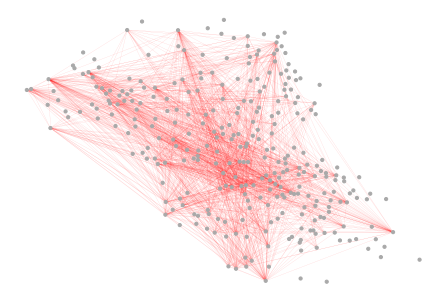

In [193]:
make_networkmaps_active_cell_connections_CS_plot(centroids_s1_24,CS_clusteredMap_24,Active_cells_ali24)
plt.savefig('CS_network_map_24_active_cells.png',format='png',dpi=1200)

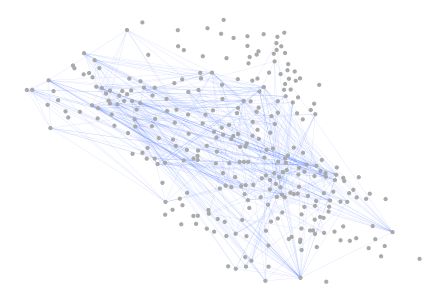

In [194]:
make_networkmaps_active_cell_connections_EX_plot(centroids_s2_24,EX_clusteredMap_24,Active_cells_ali24)
plt.savefig('EX_network_map_24_active_cells.png',format='png',dpi=1200)

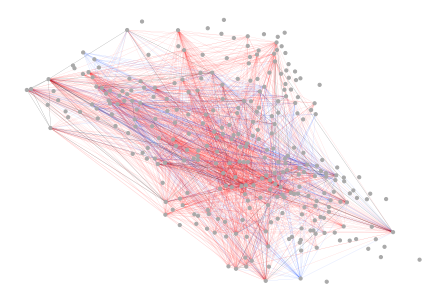

In [195]:
make_networkmaps_colored_edges_CS_EX_active(centroids_s1_24,CS_clusteredMap_24,EX_clusteredMap_24,Active_cells_ali24)
plt.savefig('CS_EX_network_map_ali24.png',format='png',dpi=1200)

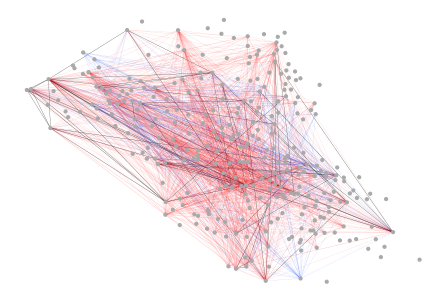

In [196]:
make_networkmaps_colored_edges_CS_EX_active_thicker(centroids_s1_24,CS_clusteredMap_24,EX_clusteredMap_24,Active_cells_ali24)
plt.savefig('CS_EX_network_map_ali24_thicker_3.png',format='png',dpi=1200)

In [197]:
def quantify_edges(G,H):
    a=list(G.edges())
    b=list(H.edges())
    CS_edges=len(a)
    EX_edges=len(b)
    common_edges =len(list(set(a) & set(b)))
    return CS_edges/(CS_edges+EX_edges-common_edges)*100,EX_edges/(CS_edges+EX_edges-common_edges)*100,common_edges/(CS_edges+EX_edges-common_edges)*100 

In [198]:
def n_edges(G,H):
    a=list(G.edges())
    b=list(H.edges())
    CS_edges=len(a)
    EX_edges=len(b)
    common_edges =len(list(set(a) & set(b)))
    return CS_edges,EX_edges,common_edges

In [199]:
def total_edges(G,H):
    a=list(G.edges())
    b=list(H.edges())
    CS_edges=len(a)
    EX_edges=len(b)
    common_edges =len(list(set(a) & set(b)))
    total_edges=CS_edges+EX_edges-common_edges
    return total_edges

In [215]:
def quantify_shared_edges(G,H):
    a=list(G.edges())
    b=list(H.edges())
    CS_edges=len(a)
    EX_edges=len(b)
    common_edges =len(list(set(a) & set(b)))
    return common_edges/(CS_edges+EX_edges-common_edges)*100

## Considering only active cell connecions

In [204]:
#CS
a_24,b_24,G_24=make_networkmaps_active_cell_connections(centroids_s1_24,CS_clusteredMap_24,Active_cells_ali24)
a_25,b_25,G_25=make_networkmaps_active_cell_connections(centroids_s1_25,CS_clusteredMap_25,Active_cells_ali25)
a_26,b_26,G_26=make_networkmaps_active_cell_connections(centroids_s1_26,CS_clusteredMap_26,Active_cells_ali26)

a_2982,b_2982,G_2982=make_networkmaps_active_cell_connections(centroids_2982,CS_clusteredMap_2982,Active_cells_2982)
a_4540,b_4540,G_4540=make_networkmaps_active_cell_connections(centroids_4540,CS_clusteredMap_4540,Active_cells_4540)
a_2712,b_2712,G_2712=make_networkmaps_active_cell_connections(centroids_2712,CS_clusteredMap_2712,Active_cells_2712)
a_2713,b_2713,G_2713=make_networkmaps_active_cell_connections(centroids_2713,CS_clusteredMap_2713,Active_cells_2713)
a_2714,b_2714,G_2714=make_networkmaps_active_cell_connections(centroids_2714,CS_clusteredMap_2714,Active_cells_2714)
a_8089,b_8089,G_8089=make_networkmaps_active_cell_connections(centroids_8089,CS_clusteredMap_8089,Active_cells_8089)

In [205]:
#EX
a1_24,b1_24,H_24=make_networkmaps_active_cell_connections(centroids_s1_24,EX_clusteredMap_24,Active_cells_ali24)
a1_25,b1_25,H_25=make_networkmaps_active_cell_connections(centroids_s1_25,EX_clusteredMap_25,Active_cells_ali25)
a1_26,b1_26,H_26=make_networkmaps_active_cell_connections(centroids_s1_26,EX_clusteredMap_26,Active_cells_ali26)

a1_2982,b1_2982,H_2982=make_networkmaps_active_cell_connections(centroids_2982,EX_clusteredMap_2982,Active_cells_2982)
a1_4540,b1_4540,H_4540=make_networkmaps_active_cell_connections(centroids_4540,EX_clusteredMap_4540,Active_cells_4540)
a1_2712,b1_2712,H_2712=make_networkmaps_active_cell_connections(centroids_2712,EX_clusteredMap_2712,Active_cells_2712)
a1_2713,b1_2713,H_2713=make_networkmaps_active_cell_connections(centroids_2713,EX_clusteredMap_2713,Active_cells_2713)
a1_2714,b1_2714,H_2714=make_networkmaps_active_cell_connections(centroids_2714,EX_clusteredMap_2714,Active_cells_2714)
a1_8089,b1_8089,H_8089=make_networkmaps_active_cell_connections(centroids_8089,EX_clusteredMap_8089,Active_cells_8089)

In [206]:
print(n_edges(G_24,H_24))
print(n_edges(G_25,H_25))
print(n_edges(G_26,H_26))
print(n_edges(G_2982,H_2982))
print(n_edges(G_4540,H_4540))
print(n_edges(G_2712,H_2712))
print(n_edges(G_2713,H_2713))
print(n_edges(G_2714,H_2714))
print(n_edges(G_8089,H_8089))

(1490, 399, 70)
(39, 32, 2)
(1249, 316, 82)
(91, 74, 6)
(72, 38, 3)
(81, 98, 21)
(270, 114, 34)
(11, 19, 1)
(7, 23, 3)


In [207]:
n_common_edges_last_day=n_edges(G_24,H_24)[2]+n_edges(G_25,H_25)[2]+n_edges(G_26,H_26)[2]+n_edges(G_2982,H_2982)[2]+n_edges(G_4540,H_4540)[2]+n_edges(G_2712,H_2712)[2]+n_edges(G_2713,H_2713)[2]+n_edges(G_2714,H_2714)[2]+n_edges(G_8089,H_8089)[2]
n_common_edges_last_day

222

In [208]:
n_total_edges_last_day=total_edges(G_24,H_24)+total_edges(G_25,H_25)+total_edges(G_26,H_26)+total_edges(G_2982,H_2982)+total_edges(G_4540,H_4540)+total_edges(G_2712,H_2712)+total_edges(G_2713,H_2713)+total_edges(G_2714,H_2714)+total_edges(G_8089,H_8089)
n_total_edges_last_day

4201

In [209]:
n_non_common_edges_last_day=n_total_edges_last_day-n_common_edges_last_day
n_non_common_edges_last_day

3979

In [216]:
common_edges_4540 = quantify_shared_edges(G_4540,H_4540)
common_edges_2982 = quantify_shared_edges(G_2982,H_2982)
common_edges_2712 = quantify_shared_edges(G_2712,H_2712)
common_edges_2713 = quantify_shared_edges(G_2713,H_2713)
common_edges_2714 = quantify_shared_edges(G_2714,H_2714)
common_edges_8089 = quantify_shared_edges(G_8089,H_8089)
common_edges_24 = quantify_shared_edges(G_24,H_24)
common_edges_25 = quantify_shared_edges(G_25,H_25)
common_edges_26 = quantify_shared_edges(G_26,H_26)
common_edges_CS_EX_active_only=[common_edges_24,common_edges_25,common_edges_26,common_edges_2982,common_edges_4540,common_edges_2712,common_edges_2713,common_edges_2714,common_edges_8089]

In [217]:
common_edges_CS_EX_active_only

[3.8482682792743264,
 2.898550724637681,
 5.529332434254889,
 3.7735849056603774,
 2.803738317757009,
 13.291139240506327,
 9.714285714285714,
 3.4482758620689653,
 11.11111111111111]

In [218]:
CS_edges_4540,EX_edges_4540,common_edges_4540 = quantify_edges(G_4540,H_4540)
CS_edges_2982,EX_edges_2982,common_edges_2982 = quantify_edges(G_2982,H_2982)
CS_edges_2712,EX_edges_2712,common_edges_2712 = quantify_edges(G_2712,H_2712)
CS_edges_2713,EX_edges_2713,common_edges_2713 = quantify_edges(G_2713,H_2713)
CS_edges_2714,EX_edges_2714,common_edges_2714 = quantify_edges(G_2714,H_2714)
CS_edges_8089,EX_edges_8089,common_edges_8089 = quantify_edges(G_8089,H_8089)
CS_edges_24,EX_edges_24,common_edges_24 = quantify_edges(G_24,H_24)
CS_edges_25,EX_edges_25,common_edges_25 = quantify_edges(G_25,H_25)
CS_edges_26,EX_edges_26,common_edges_26 = quantify_edges(G_26,H_26)
CS_edges=[CS_edges_24,CS_edges_25,CS_edges_26,CS_edges_2982,CS_edges_4540,CS_edges_2712,CS_edges_2713,CS_edges_2714,CS_edges_8089]
EX_edges=[EX_edges_24,EX_edges_25,EX_edges_26,EX_edges_2982,EX_edges_4540,EX_edges_2712,EX_edges_2713,EX_edges_2714,EX_edges_8089]
common_edges=[common_edges_24,common_edges_25,common_edges_26,common_edges_2982,common_edges_4540,common_edges_2712,common_edges_2713,common_edges_2714,common_edges_8089]

In [219]:
print(ss.ttest_rel(CS_edges,EX_edges))
print(ss.ttest_rel(CS_edges,common_edges))
print(ss.ttest_rel(EX_edges,common_edges))

Ttest_relResult(statistic=0.9941086969740071, pvalue=0.34928322062146194)
Ttest_relResult(statistic=7.536045300842241, pvalue=6.695717072864272e-05)
Ttest_relResult(statistic=6.049133282803797, pvalue=0.0003062085617111032)


In [220]:
def makePairedScatterPlot_modified_colors(df, f_size, clrs, ax=None, ax_pos = [0.2, 0.1, 0.75, 0.8], plotlines=False):
    #Make paired scatter plots with lines between paired points.  Plot Points for each column in DataFrame
    #Font Details
    label_size=7
    tick_size=6
   
    Ncols = df.shape[0]
    #Make Figure
    if ax == None:
        fig = plt.figure(figsize=f_size)
        ax = fig.add_axes(ax_pos)
    else:
        ax.set_position(ax_pos)
    #Loop through each column
    x_iter = 0
    last_c = None
    C= ['yellow','darkgreen','lime','sienna','aqua','slategrey','black','darkmagenta','darkblue']
    for idx, c in enumerate(df):
        avg = df[c].mean()
        ax.bar([x_iter, x_iter], [avg, avg], color=clrs[idx], zorder=0)
        ax.scatter(np.ones((Ncols,1))*x_iter, df[c], color=C, zorder=2)
        u_err, l_err = [df[c].std(), df[c].std()] # [df[c].quantile(q=0.975), df[c].quantile(q=0.025)]
        err_array = np.array([l_err, u_err]).reshape(2,-1)
        ax.errorbar(x_iter, avg, yerr=err_array, color=clrs[idx], zorder=1)
        if plotlines:
            if last_c is not None:
                x_1 = np.ones((Ncols,1))*(x_iter-1)
                x_2 = np.ones((Ncols,1))*x_iter
                y_1 = df[last_c]
                y_2 =  df[c]
                for x1, x2, y1, y2 in zip(x_1, x_2, y_1, y_2):
                    ax.plot([x1,x2], [y1,y2], '--', color=[0,0,0,0.75])
        x_iter += 1
        last_c = c
    #Final Plot Formatting
    ax.grid(b=False)
    ax.set_xticks(np.arange(0,x_iter))
   
    ax.set_xticklabels(df.columns, fontsize=label_size) 
    ax.set_facecolor([1,1,1])
    
    #ax.tick_params(labelsize=tick_size)
    #ax.set_ylim([0, 1])
    #ax.set_yticklabels(np.arange(0,101,20).round(1),fontsize=tick_size)
    ax.set_ylabel('Percentage of total edges')
    return ax

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

        CS edges   EX edges     Shared
ali24  81.913139  21.935129   3.848268
ali25  56.521739  46.376812   2.898551
ali26  84.221173  21.308159   5.529332
2982   57.232704  46.540881   3.773585
4540   67.289720  35.514019   2.803738
2712   51.265823  62.025316  13.291139
2713   77.142857  32.571429   9.714286
2714   37.931034  65.517241   3.448276
8089   25.925926  85.185185  11.111111


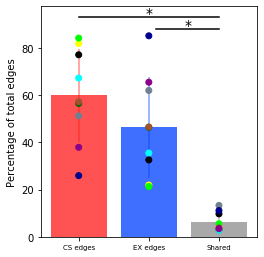

In [221]:
df = {'CS edges' : pd.Series(CS_edges, index=['ali24', 'ali25', 'ali26','2982','4540','2712','2713','2714','8089']), 
   'EX edges' : pd.Series(EX_edges, index=['ali24', 'ali25', 'ali26','2982','4540','2712','2713','2714','8089']),'Shared' : pd.Series(common_edges, index=['ali24', 'ali25', 'ali26','2982','4540','2712','2713','2714','8089'])}
CS_EX_edges = pd.DataFrame(df)
CS_EX_edges = pd.DataFrame(df)
print(CS_EX_edges)
makePairedScatterPlot_modified_colors(CS_EX_edges,(4,4),[[1,.1,.1,0.5],[0,.25,1,0.5],[0.6,0.6,0.6,0.6]])
plt.plot([1.1,2],[88,88], 'k')
plt.text(1.56,88, '*', horizontalalignment='center', fontsize=14)
plt.plot([0,2],[93,93], 'k')
plt.text(1,93, '*', horizontalalignment='center', fontsize=14)
plt.savefig('CS_EX_edges_bar_paired.eps',format='eps')
#plt.savefig('CS_EX_edges_bar_paired.png',format='png',dpi=1200)

In [222]:
np.mean(CS_edges),np.std(CS_edges),np.mean(EX_edges),np.std(EX_edges)

(59.93823509780572, 18.7319037649061, 46.330463412145, 20.14324051909318)

## Supplemental figures- density and degree

In [223]:
print(a_24,b_24)
print(a_25,b_25)
print(a_26,b_26)
print(a_4540,b_4540)
print(a_2982,b_2982)
print(a_2712,b_2712)
print(a_2713,b_2713)
print(a_2714,b_2714)
print(a_8089,b_8089)

1490 0.03300110741971207
39 0.004442925495557075
1249 0.014262712541823206
72 0.002042842956447723
91 0.0019247853124074624
81 0.010123734533183352
270 0.02735562310030395
11 0.0009459924320605435
7 0.0025225225225225223


In [224]:
print(a1_24,b1_24)
print(a1_25,b1_25)
print(a1_26,b1_26)
print(a1_4540,b1_4540)
print(a1_2982,b1_2982)
print(a1_2712,b1_2712)
print(a1_2714,b1_2714)
print(a1_2713,b1_2713)
print(a1_8089,b1_8089)

399 0.008837209302325582
32 0.003645477329687856
316 0.0036085005309977047
38 0.001078167115902965
74 0.001565210034265409
98 0.012248468941382326
19 0.0016339869281045752
114 0.011550151975683891
23 0.008288288288288289


In [225]:
# Density - not significant 
density_CS=[b_24,b_25,b_26,b_4540,b_2982,b_2712,b_2713,b_2714,b_8089]
density_EX=[b1_24,b1_25,b1_26,b1_4540,b1_2982,b1_2712,b1_2713,b1_2714,b1_8089]
print(ss.ttest_rel(density_CS,density_EX))

Ttest_relResult(statistic=1.5002404857500633, pvalue=0.1719423282706255)


In [226]:
df = {'CS' : pd.Series(density_CS, index=['ali24', 'ali25', 'ali26','4540','2982','2712','2713','2714','8089']), 
   'EX' : pd.Series(density_EX, index=['ali24', 'ali25', 'ali26','4540','2982','2712','2713','2714','8089'])}
CS_EX_density= pd.DataFrame(df)
CS_EX_density.reindex(['ali24','ali25','ali26','2982','4540','2712','2713','2714','8089'])

,CS,EX
ali24,0.033001,0.008837
ali25,0.004443,0.003645
ali26,0.014263,0.003609
2982,0.001925,0.001565
4540,0.002043,0.001078
2712,0.010124,0.012248
2713,0.027356,0.011550
2714,0.000946,0.001634
8089,0.002523,0.008288


In [227]:
def makePairedScatterPlot_modified_colors(df, f_size, clrs, ax=None, ax_pos = [0.2, 0.1, 0.75, 0.8], plotlines=False):
    #Make paired scatter plots with lines between paired points.  Plot Points for each column in DataFrame
    #Font Details
    label_size=7
    tick_size=6
   
    Ncols = df.shape[0]
    #Make Figure
    if ax == None:
        fig = plt.figure(figsize=f_size)
        ax = fig.add_axes(ax_pos)
    else:
        ax.set_position(ax_pos)
    #Loop through each column
    x_iter = 0
    last_c = None
    C= ['yellow','darkgreen','lime','sienna','aqua','slategrey','black','darkmagenta','darkblue']
    for idx, c in enumerate(df):
        avg = df[c].mean()
        ax.bar([x_iter, x_iter], [avg, avg], color=clrs[idx], zorder=0)
        ax.scatter(np.ones((Ncols,1))*x_iter, df[c], color=C, zorder=2)
        u_err, l_err = [df[c].std(), df[c].std()] # [df[c].quantile(q=0.975), df[c].quantile(q=0.025)]
        err_array = np.array([l_err, u_err]).reshape(2,-1)
        ax.errorbar(x_iter, avg, yerr=err_array, color=clrs[idx], zorder=1)
        if plotlines:
            if last_c is not None:
                x_1 = np.ones((Ncols,1))*(x_iter-1)
                x_2 = np.ones((Ncols,1))*x_iter
                y_1 = df[last_c]
                y_2 =  df[c]
                for x1, x2, y1, y2 in zip(x_1, x_2, y_1, y_2):
                    ax.plot([x1,x2], [y1,y2], '--', color=[0,0,0,0.75])
        x_iter += 1
        last_c = c
    #Final Plot Formatting
    ax.grid(b=False)
    ax.set_xticks(np.arange(0,x_iter))
   
    ax.set_xticklabels(df.columns, fontsize=label_size) 
    ax.set_facecolor([1,1,1])
    
    #ax.tick_params(labelsize=tick_size)
    #ax.set_ylim([0, 1])
    #ax.set_yticklabels(np.arange(0,101,20).round(1),fontsize=tick_size)
    ax.set_ylabel('Density')
    return ax

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


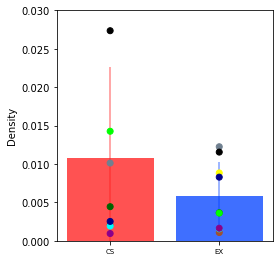

In [228]:
ax=makePairedScatterPlot_modified_colors(CS_EX_density,(4,4),[[1,.1,.1,0.5],[0,.25,1,0.5],[0.6,0.6,0.6,0.6]])
ax.set_ylim([0,0.03])
plt.savefig('CS_EX_density_paired.eps',format='eps')

In [229]:
# Degree - not significant between LS and CS
degree_CS=[2*a_24/len(Active_cells_ali24),2*a_25/len(Active_cells_ali25),2*a_26/len(Active_cells_ali26),2*a_4540/len(Active_cells_4540),2*a_2982/len(Active_cells_2982),2*a_2712/len(Active_cells_2712),2*a_2713/len(Active_cells_2713),2*a_2714/len(Active_cells_2714),2*a_8089/len(Active_cells_8089)]
print(degree_CS)
degree_EX=[2*a1_24/len(Active_cells_ali24),2*a1_25/len(Active_cells_ali25),2*a1_26/len(Active_cells_ali26),2*a1_4540/len(Active_cells_4540),2*a1_2982/len(Active_cells_2982),2*a1_2712/len(Active_cells_2712),2*a1_2713/len(Active_cells_2713),2*a1_2714/len(Active_cells_2714),2*a1_8089/len(Active_cells_8089)]
print(degree_EX)
print(ss.ttest_rel(degree_CS,degree_EX))

[25.47008547008547, 3.12, 20.308943089430894, 4.5, 4.7894736842105265, 4.628571428571429, 14.210526315789474, 1.5714285714285714, 0.7777777777777778]
[6.82051282051282, 2.56, 5.138211382113822, 2.375, 3.8947368421052633, 5.6, 6.0, 2.7142857142857144, 2.5555555555555554]
Ttest_relResult(statistic=1.827882970488831, pvalue=0.10497704436615107)


In [230]:
df = {'CS' : pd.Series(degree_CS, index=['ali24', 'ali25', 'ali26','4540','2982','2712','2713','2714','8089']), 
   'EX' : pd.Series(degree_EX, index=['ali24', 'ali25', 'ali26','4540','2982','2712','2713','2714','8089'])}
CS_EX_degree= pd.DataFrame(df)
CS_EX_degree.reindex(['ali24','ali25','ali26','2982','4540','2712','2713','2714','8089'])

,CS,EX
ali24,25.470085,6.820513
ali25,3.120000,2.560000
ali26,20.308943,5.138211
2982,4.789474,3.894737
4540,4.500000,2.375000
2712,4.628571,5.600000
2713,14.210526,6.000000
2714,1.571429,2.714286
8089,0.777778,2.555556


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


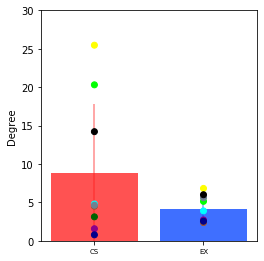

In [231]:
ax=makePairedScatterPlot_modified_colors(CS_EX_degree,(4,4),[[1,.1,.1,0.5],[0,.25,1,0.5],[0.6,0.6,0.6,0.6]])
ax.set_ylabel('Degree')
ax.set_ylim([0,30])
plt.savefig('CS_EX_degree_paired.eps',format='eps')

### % CO cells that are EX cells

In [232]:
def get_common_CS_cells(CS_cells,EX_cells):
    return np.in1d(CS_cells,EX_cells).sum() / float(CS_cells.shape[0])*100

In [233]:
last_common_pct_ali24=np.in1d(active_cells_ali24,active_cells_ali24_EX).sum() / float(active_cells_ali24.shape[0])*100
last_common_pct_ali25=np.in1d(active_cells_ali25,active_cells_ali25_EX).sum() / float(active_cells_ali25.shape[0])*100
last_common_pct_ali26=np.in1d(active_cells_ali26,active_cells_ali26_EX).sum() / float(active_cells_ali26.shape[0])*100
last_common_pct_2982=np.in1d(active_cells_2982,active_cells_2982_EX).sum() / float(active_cells_2982.shape[0])*100
last_common_pct_4540=np.in1d(active_cells_4540,active_cells_4540_EX).sum() / float(active_cells_4540.shape[0])*100
last_common_pct_2712=np.in1d(active_cells_2712,active_cells_2712_EX).sum() / float(active_cells_2712.shape[0])*100
last_common_pct_2713=np.in1d(active_cells_2713,active_cells_2713_EX).sum() / float(active_cells_2713.shape[0])*100
last_common_pct_2714=np.in1d(active_cells_2714,active_cells_2714_EX).sum() / float(active_cells_2714.shape[0])*100
last_common_pct_8089=np.in1d(active_cells_8089,active_cells_8089_EX).sum() / float(active_cells_8089.shape[0])*100
percent_CO_EX_cells =[last_common_pct_ali24,last_common_pct_ali25,last_common_pct_ali26,last_common_pct_2982,last_common_pct_4540,last_common_pct_2712,last_common_pct_2713,last_common_pct_2714,last_common_pct_8089]

In [234]:
print(np.mean(percent_CO_EX_cells),np.std(percent_CO_EX_cells))

18.143860140201927 8.738017413517737


### Percentage of active cells on last training day/EX

In [235]:
percent_active_cells_LS=[percent_active_cells_ali24,percent_active_cells_ali25,percent_active_cells_ali26,percent_active_cells_2982,percent_active_cells_4540,percent_active_cells_2712,percent_active_cells_2713,percent_active_cells_2714,percent_active_cells_8089]
df = {'Active cell percent CS' : pd.Series(percent_active_cells_LS, index=['ali24', 'ali25', 'ali26','2982','4540','2712','2713','2714','8089'])}
percent_active_cells_LS_df= pd.DataFrame(df)
print(percent_active_cells_LS_df.mean(),percent_active_cells_LS_df.std())
percent_active_cells_LS_df

Active cell percent CS    14.080346
dtype: float64 Active cell percent CS    8.042966
dtype: float64


,Active cell percent CS
ali24,23.588040
ali25,12.781955
ali26,25.059666
2982,7.516340
4540,7.518797
2712,21.259843
2713,17.730496
2714,3.267974
8089,8.000000


### Second 20 trials 

In [236]:
percent_active_cells_EX=[percent_active_cells_ali24_EX,percent_active_cells_ali25_EX,percent_active_cells_ali26_EX,percent_active_cells_2982_EX,percent_active_cells_4540_EX,percent_active_cells_2712_EX,percent_active_cells_2713_EX,percent_active_cells_2714_EX,percent_active_cells_8089_EX]
df = {'Active cell percent EX' : pd.Series(percent_active_cells_EX, index=['ali24', 'ali25', 'ali26','2982','4540','2712','2713','2714','8089'])}
percent_active_cells_EX_df= pd.DataFrame(df)
print(percent_active_cells_EX_df.mean(),percent_active_cells_EX_df.std())
percent_active_cells_EX_df

Active cell percent EX    10.404125
dtype: float64 Active cell percent EX    4.862125
dtype: float64


,Active cell percent EX
ali24,18.936877
ali25,9.022556
ali26,8.830549
2982,5.555556
4540,5.263158
2712,9.448819
2713,12.056738
2714,7.189542
8089,17.333333


## First training session

### Loading binary traces for first sessions 

In [237]:
def makeAliFilenames_modified(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                if ((m_day != 2) | (m_sess != 2)): #Skip d2_s2.  Only do d5_s2
                    mouse_dir = 'ali{}_d{}_s{}/'.format(m_num, m_day, m_sess)
                    directories.append(mouse_dir)
                    filenames[mouse_dir] = 'binary_traces.h5'
                   
    return directories, filenames

In [238]:
def makeRebeccaFilenames_modified(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                mouse_dir = '{}/{}_d{}_s{}/'.format(m_num, m_num, m_day, m_sess)
                directories.append(mouse_dir)
                filenames[mouse_dir] = 'binary_traces.h5'
    return directories, filenames

In [239]:
#Initialize Input Values
#Ali Mice
aliBase = '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/'
aliMice, aliDays, aliSessions = ([24,25,26], [2], [1])
aliFolders, aliFilenames = makeAliFilenames_modified(aliMice, aliDays, aliSessions)
bin_aliFiles = combineFilenames(aliBase, aliFolders, aliFilenames)
#Rebecca Mice
rBase = '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/'
rMice, rDays, rSessions = ([2982,4540], [1], [1])
rFolders, rFilenames = makeRebeccaFilenames_modified(rMice, rDays, rSessions)
bin_rFiles = combineFilenames(rBase, rFolders, rFilenames)
#New Rebecca Mice
nrBase = '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/'
nrMice, nrDays, nrSessions = ([2712,2713,2714,8089], [1], [1]) #Also have 2 as full imaging session.  Drop 2714 because of data quality
nrFolders, nrFilenames = makeRebeccaFilenames_modified(nrMice, nrDays, nrSessions)
bin_nrFiles = combineFilenames(nrBase, nrFolders, nrFilenames)
#Combine All Filenames into one List
bin_allFiles = bin_aliFiles + bin_rFiles + bin_nrFiles
print(bin_allFiles)

['/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali24_d2_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali25_d2_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali26_d2_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/2982/2982_d1_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/4540/4540_d1_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/2712/2712_d1_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/2713/2713_d1_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/2714/2714_d1_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/8089/8089_d1_s1/binary_traces.h5']


In [240]:
first_ali_binary_traces=loadbinaryTraces(bin_aliFiles, 'Ali')
first_r_binary_traces=loadbinaryTraces(bin_rFiles, 'Rebecca')
first_nr_binary_traces=loadbinaryTraces(bin_nrFiles, 'Rebecca')

In [241]:
print('Ali Binary Blocks')
bin_aliTraceBlocks, bin_aliTraceNoBlocks = makeTraceTrialBlocks(first_ali_binary_traces, aliSounds)
#bin_aliTraceBlocks, bin_aliTraceNoBlocks = makeTraceTrialBlocks(aliMatched, aliSounds)
print('Rebecca Binary Blocks')
bin_rTraceBlocks, bin_rTraceNoBlocks = makeTraceTrialBlocks(first_r_binary_traces, rSounds) 
print('New Rebecca Binary Blocks')
bin_nrTraceBlocks, bin_nrTraceNoBlocks = makeTraceTrialBlocks(first_nr_binary_traces, nrSounds) 

Ali Binary Blocks
ali24_d2_s1
ali25_d2_s1
ali26_d2_s1
Rebecca Binary Blocks
2982_d1_s1
4540_d1_s1
New Rebecca Binary Blocks
2712_d1_s1
2713_d1_s1
2714_d1_s1
8089_d1_s1


In [242]:
print(bin_aliTraceBlocks['ali24_d2_s1'].columns.unique('cell_num').shape)
print(bin_aliTraceBlocks['ali25_d2_s1'].columns.unique('cell_num').shape)
print(bin_aliTraceBlocks['ali26_d2_s1'].columns.unique('cell_num').shape)
print(bin_rTraceBlocks['2982_d1_s1'].columns.unique('cell_num').shape)
print(bin_rTraceBlocks['4540_d1_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2712_d1_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2713_d1_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2714_d1_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['8089_d1_s1'].columns.unique('cell_num').shape)

(862,)
(761,)
(756,)
(115,)
(187,)
(113,)
(143,)
(234,)
(70,)


In [243]:
total_cells_firstday_all = bin_aliTraceBlocks['ali24_d2_s1'].columns.unique('cell_num').shape[0]+bin_aliTraceBlocks['ali25_d2_s1'].columns.unique('cell_num').shape[0]+bin_aliTraceBlocks['ali26_d2_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['2982_d1_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['4540_d1_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2712_d1_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2713_d1_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2714_d1_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['8089_d1_s1'].columns.unique('cell_num').shape[0]
total_cells_firstday_all

3241

In [244]:
total_cells_firstday = bin_aliTraceBlocks['ali24_d2_s1'].columns.unique('cell_num').shape[0]+bin_aliTraceBlocks['ali26_d2_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['2982_d1_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['4540_d1_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2713_d1_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2714_d1_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['8089_d1_s1'].columns.unique('cell_num').shape[0]
total_cells_firstday

2367

In [245]:
## Save all the thresholds for last day/EX in a .h5 file
f1 = h5py.File("Thresholds_FS.h5", "r")

threshold_ali24_FS=np.array(f1['Ali_24'])
threshold_ali25_FS=np.array(f1['Ali_25'])
threshold_ali26_FS=np.array(f1['Ali_26'])
threshold_2982_FS=np.array(f1['2982'])
threshold_4540_FS=np.array(f1['4540'])
threshold_2712_FS=np.array(f1['2712'])
threshold_2713_FS=np.array(f1['2713'])
threshold_2714_FS=np.array(f1['2714'])
threshold_8089_FS=np.array(f1['8089'])


In [246]:
total_cells_firstday = bin_aliTraceBlocks['ali24_d2_s1'].columns.unique('cell_num').shape[0]+bin_aliTraceBlocks['ali26_d2_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['2982_d1_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['4540_d1_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2713_d1_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2714_d1_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['8089_d1_s1'].columns.unique('cell_num').shape[0]
total_cells_firstday

2367

## Second 20 trials 

In [247]:
Nfirst=20
Ntrials=40
mouse_df=bin_aliTraceBlocks['ali24_d2_s1'].loc[:, bin_aliTraceBlocks['ali24_d2_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_ali24_FS,n_active_cells_ali24_FS,percent_active_cells_ali24_FS=identify_active_cells(mouse_df,threshold_ali24_FS)
mouse_df=bin_aliTraceBlocks['ali25_d2_s1'].loc[:, bin_aliTraceBlocks['ali25_d2_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_ali25_FS,n_active_cells_ali25_FS,percent_active_cells_ali25_FS=identify_active_cells(mouse_df,threshold_ali25_FS)
mouse_df=bin_aliTraceBlocks['ali26_d2_s1'].loc[:, bin_aliTraceBlocks['ali26_d2_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_ali26_FS,n_active_cells_ali26_FS,percent_active_cells_ali26_FS=identify_active_cells(mouse_df,threshold_ali26_FS)

In [248]:
Nfirst=40
Ntrials=60
mouse_df=bin_rTraceBlocks['2982_d1_s1'].loc[:, bin_rTraceBlocks['2982_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_2982_FS,n_active_cells_2982_FS,percent_active_cells_2982_FS=identify_active_cells(mouse_df,threshold_2982_FS)
mouse_df=bin_rTraceBlocks['4540_d1_s1'].loc[:, bin_rTraceBlocks['4540_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_4540_FS,n_active_cells_4540_FS,percent_active_cells_4540_FS=identify_active_cells(mouse_df,threshold_4540_FS)
mouse_df=bin_nrTraceBlocks['2712_d1_s1'].loc[:, bin_nrTraceBlocks['2712_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_2712_FS,n_active_cells_2712_FS,percent_active_cells_2712_FS=identify_active_cells(mouse_df,threshold_2712_FS)
mouse_df=bin_nrTraceBlocks['2713_d1_s1'].loc[:, bin_nrTraceBlocks['2713_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_2713_FS,n_active_cells_2713_FS,percent_active_cells_2713_FS=identify_active_cells(mouse_df,threshold_2713_FS)
mouse_df=bin_nrTraceBlocks['2714_d1_s1'].loc[:, bin_nrTraceBlocks['2714_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_2714_FS,n_active_cells_2714_FS,percent_active_cells_2714_FS=identify_active_cells(mouse_df,threshold_2714_FS)
mouse_df=bin_nrTraceBlocks['8089_d1_s1'].loc[:, bin_nrTraceBlocks['8089_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_8089_FS,n_active_cells_8089_FS,percent_active_cells_8089_FS=identify_active_cells(mouse_df,threshold_8089_FS)

In [249]:
### Percentage of active cells
percent_active_cells_FS_second20=[percent_active_cells_ali24_FS,percent_active_cells_ali25_FS,percent_active_cells_ali26_FS,percent_active_cells_2982_FS,percent_active_cells_4540_FS,percent_active_cells_2712_FS,percent_active_cells_2713_FS,percent_active_cells_2714_FS,percent_active_cells_8089_FS]
df = {'Active cell percent FS' : pd.Series(percent_active_cells_FS_second20, index=['ali24', 'ali25', 'ali26','2982','4540','2712','2713','2714','8089'])}
percent_active_cells_FS_df_second20= pd.DataFrame(df)
print(percent_active_cells_FS_df_second20.mean(),percent_active_cells_FS_df_second20.std())
percent_active_cells_FS_df_second20

Active cell percent FS    9.829773
dtype: float64 Active cell percent FS    7.078527
dtype: float64


,Active cell percent FS
ali24,17.981439
ali25,20.762155
ali26,13.624339
2982,3.478261
4540,3.208556
2712,15.044248
2713,2.097902
2714,5.128205
8089,7.142857


## Latency

In [250]:
ali_onset_binary_traces=loadonsetbinaryTraces(bin_aliFiles, 'Ali')
r_onset_binary_traces=loadonsetbinaryTraces(bin_rFiles, 'Rebecca')
nr_onset_binary_traces=loadonsetbinaryTraces(bin_nrFiles, 'Rebecca')

In [251]:
print('Ali onset Binary Blocks')
onset_bin_aliTraceBlocks, _ = makeTraceTrialBlocks(ali_onset_binary_traces, aliSounds)
print('Rebecca onset Binary Blocks')
onset_bin_rTraceBlocks, _ = makeTraceTrialBlocks(r_onset_binary_traces, rSounds) 
print('New Rebecca Binary Blocks')
onset_bin_nrTraceBlocks,_ = makeTraceTrialBlocks(nr_onset_binary_traces, nrSounds) 

Ali onset Binary Blocks
ali24_d2_s1
ali25_d2_s1
ali26_d2_s1
Rebecca onset Binary Blocks
2982_d1_s1
4540_d1_s1
New Rebecca Binary Blocks
2712_d1_s1
2713_d1_s1
2714_d1_s1
8089_d1_s1


435.1885644768857

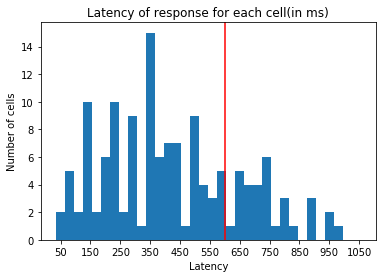

In [252]:
Nfirst=20
Ntrials=40
mouse_df=onset_bin_aliTraceBlocks['ali24_d2_s1'].loc[:, onset_bin_aliTraceBlocks['ali24_d2_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
avg_latency_ali24_FS=get_latency(mouse_df,active_cells_ali24_FS)
np.mean(avg_latency_ali24_FS)

319.4626322751323

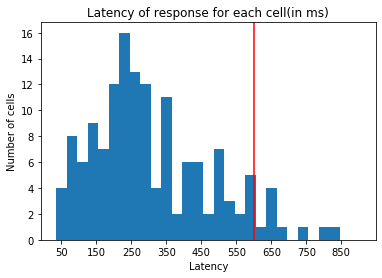

In [253]:
Nfirst=20
Ntrials=40
mouse_df=onset_bin_aliTraceBlocks['ali25_d2_s1'].loc[:, onset_bin_aliTraceBlocks['ali25_d2_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
avg_latency_ali25_FS=get_latency(mouse_df,active_cells_ali25_FS)
np.mean(avg_latency_ali25_FS)

414.1769922254616

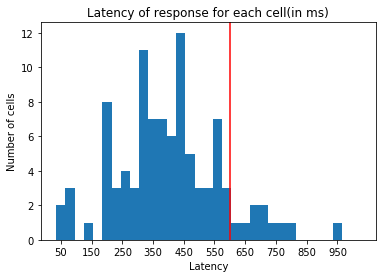

In [254]:
Nfirst=20
Ntrials=40
mouse_df=onset_bin_aliTraceBlocks['ali26_d2_s1'].loc[:, onset_bin_aliTraceBlocks['ali26_d2_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
avg_latency_ali26_FS=get_latency(mouse_df,active_cells_ali26_FS)
np.mean(avg_latency_ali26_FS)

497.2222222222222

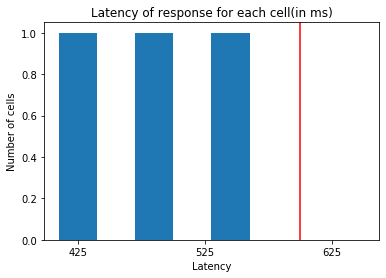

In [255]:
Nfirst=40
Ntrials=60
mouse_df=onset_bin_rTraceBlocks['2982_d1_s1'].loc[:, onset_bin_rTraceBlocks['2982_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
avg_latency_2982_FS=get_latency(mouse_df,active_cells_2982_FS)
np.mean(avg_latency_2982_FS)

475.6944444444445

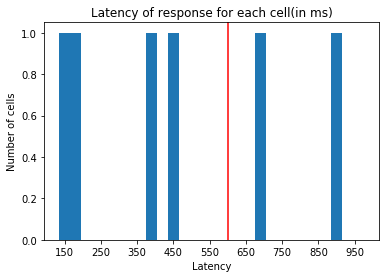

In [256]:
Nfirst=40
Ntrials=60
mouse_df=onset_bin_rTraceBlocks['4540_d1_s1'].loc[:, onset_bin_rTraceBlocks['4540_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
avg_latency_4540_FS=get_latency(mouse_df,active_cells_4540_FS)
np.mean(avg_latency_4540_FS)

396.6145833333333

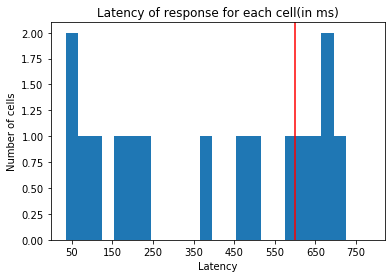

In [257]:
Nfirst=40
Ntrials=60
mouse_df=onset_bin_nrTraceBlocks['2712_d1_s1'].loc[:, onset_bin_nrTraceBlocks['2712_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
avg_latency_2712_FS=get_latency(mouse_df,active_cells_2712_FS)
np.mean(avg_latency_2712_FS)

605.5555555555555

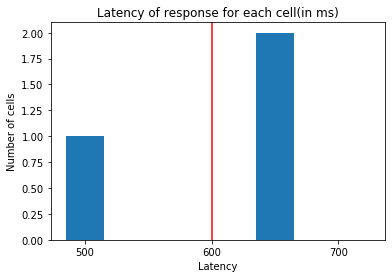

In [258]:
Nfirst=40
Ntrials=60
mouse_df=onset_bin_nrTraceBlocks['2713_d1_s1'].loc[:, onset_bin_nrTraceBlocks['2713_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
avg_latency_2713_FS=get_latency(mouse_df,active_cells_2713_FS)
np.mean(avg_latency_2713_FS)

528.125

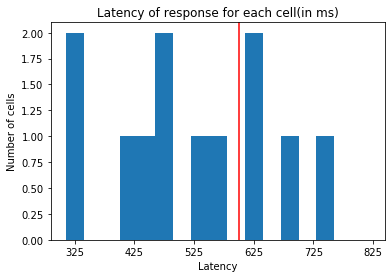

In [259]:
Nfirst=40
Ntrials=60
mouse_df=onset_bin_nrTraceBlocks['2714_d1_s1'].loc[:, onset_bin_nrTraceBlocks['2714_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
avg_latency_2714_FS=get_latency(mouse_df,active_cells_2714_FS)
np.mean(avg_latency_2714_FS)

583.3333333333334

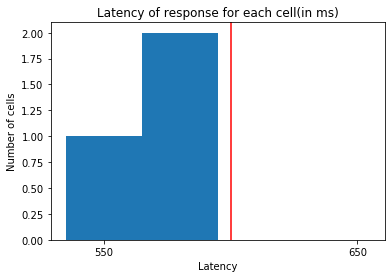

In [260]:
Nfirst=40
Ntrials=60
mouse_df=onset_bin_nrTraceBlocks['8089_d1_s1'].loc[:, onset_bin_nrTraceBlocks['8089_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
avg_latency_8089_FS=get_latency(mouse_df,active_cells_8089_FS)
np.mean(avg_latency_8089_FS)

In [261]:
avg_latency_last_session=np.concatenate((avg_latency_ali24_CS,avg_latency_ali25_CS,avg_latency_ali26_CS,avg_latency_2982_CS,avg_latency_4540_CS,avg_latency_2712_CS,avg_latency_2713_CS,avg_latency_2714_CS,avg_latency_8089_CS),axis=0)
np.size(avg_latency_last_session)

278

In [262]:
avg_latency_last_session_7=np.concatenate((avg_latency_ali24_CS,avg_latency_ali26_CS,avg_latency_2982_CS,avg_latency_4540_CS,avg_latency_2713_CS,avg_latency_2714_CS,avg_latency_8089_CS),axis=0)
np.size(avg_latency_last_session_7)

236

In [263]:
avg_latency_first_session=np.concatenate((avg_latency_ali24_FS,avg_latency_ali25_FS,avg_latency_ali26_FS,avg_latency_2982_FS,avg_latency_4540_FS,avg_latency_2712_FS,avg_latency_2713_FS,avg_latency_2714_FS,avg_latency_8089_FS),axis=0)
np.size(avg_latency_first_session)

422

In [264]:
avg_latency_first_session_7=np.concatenate((avg_latency_ali24_FS,avg_latency_ali26_FS,avg_latency_2982_FS,avg_latency_4540_FS,avg_latency_2713_FS,avg_latency_2714_FS,avg_latency_8089_FS),axis=0)
np.size(avg_latency_first_session_7)

262

In [265]:
ss.f_oneway(avg_latency_first_session_7,avg_latency_last_session_7)

F_onewayResult(statistic=34.424569435614956, pvalue=8.10746413727617e-09)

In [266]:
ss.f_oneway(avg_latency_first_session,avg_latency_last_session)

F_onewayResult(statistic=6.534282740002886, pvalue=0.010792100901397794)

In [267]:
np.mean(avg_latency_first_session_7),np.std(avg_latency_first_session_7),np.mean(avg_latency_last_session_7),np.std(avg_latency_last_session_7)

(436.8709105779717, 202.8743272568304, 329.66404358353515, 203.543974987891)

### Compare active cells first day (second 20) and last day

In [268]:
Active_cells_first_day=n_active_cells_ali24_FS+n_active_cells_ali26_FS+n_active_cells_2982_FS+n_active_cells_4540_FS+n_active_cells_2713_FS+n_active_cells_2714_FS+n_active_cells_8089_FS

In [269]:
n_active_cells_ali24_FS,n_active_cells_ali25_FS,n_active_cells_ali26_FS,n_active_cells_2982_FS,n_active_cells_4540_FS,n_active_cells_2712_FS,n_active_cells_2713_FS,n_active_cells_2714_FS,n_active_cells_8089_FS

(155, 158, 103, 4, 6, 17, 3, 12, 5)

In [270]:
Active_cells_first_day_all=n_active_cells_ali24_FS+n_active_cells_ali25_FS+n_active_cells_ali26_FS+n_active_cells_2982_FS+n_active_cells_4540_FS+n_active_cells_2712_FS+n_active_cells_2713_FS+n_active_cells_2714_FS+n_active_cells_8089_FS

In [271]:
table=[(Active_cells_first_day,Active_cells_last_day),(total_cells_firstday-Active_cells_first_day,total_cells_lastday-Active_cells_last_day)]
print(table)
print(ss.fisher_exact(table))

[(288, 255), (2079, 1406)]
(0.7638061285120109, 0.004222094743678416)


In [272]:
print(Active_cells_first_day/(total_cells_firstday)*100,Active_cells_last_day/(total_cells_lastday)*100)

12.167300380228136 15.35219747140277


## Fisher's test for first day vs extinction (n=7)

In [273]:
# Used second 20 of first day , last 20 last day for Ali's trials
table =[(Active_cells_first_day,Active_cells_EX),(total_cells_firstday-Active_cells_first_day,total_cells_lastday-Active_cells_EX)]
print(table)
ss.fisher_exact(table)

[(288, 166), (2079, 1495)]


(1.24758775361185, 0.03350464908399818)

In [274]:
print(Active_cells_first_day/(total_cells_firstday)*100,Active_cells_EX/(total_cells_lastday)*100)

12.167300380228136 9.99397953040337


### Using first 20

In [275]:
Nfirst=20
mouse_df=bin_aliTraceBlocks['ali24_d2_s1'].loc[:, bin_aliTraceBlocks['ali24_d2_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
active_cells_ali24_FS,n_active_cells_ali24_FS,percent_active_cells_ali24_FS=identify_active_cells(mouse_df,threshold_ali24_FS)
mouse_df=bin_aliTraceBlocks['ali25_d2_s1'].loc[:, bin_aliTraceBlocks['ali25_d2_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
active_cells_ali25_FS,n_active_cells_ali25_FS,percent_active_cells_ali25_FS=identify_active_cells(mouse_df,threshold_ali25_FS)
mouse_df=bin_aliTraceBlocks['ali26_d2_s1'].loc[:, bin_aliTraceBlocks['ali26_d2_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
active_cells_ali26_FS,n_active_cells_ali26_FS,percent_active_cells_ali26_FS=identify_active_cells(mouse_df,threshold_ali26_FS)

In [276]:
Nfirst=20
Ntrials=40
mouse_df=bin_rTraceBlocks['2982_d1_s1'].loc[:, bin_rTraceBlocks['2982_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_2982_FS,n_active_cells_2982_FS,percent_active_cells_2982_FS=identify_active_cells(mouse_df,threshold_2982_FS)
mouse_df=bin_rTraceBlocks['4540_d1_s1'].loc[:, bin_rTraceBlocks['4540_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_4540_FS,n_active_cells_4540_FS,percent_active_cells_4540_FS=identify_active_cells(mouse_df,threshold_4540_FS)
mouse_df=bin_nrTraceBlocks['2712_d1_s1'].loc[:, bin_nrTraceBlocks['2712_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_2712_FS,n_active_cells_2712_FS,percent_active_cells_2712_FS=identify_active_cells(mouse_df,threshold_2712_FS)
mouse_df=bin_nrTraceBlocks['2713_d1_s1'].loc[:, bin_nrTraceBlocks['2713_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_2713_FS,n_active_cells_2713_FS,percent_active_cells_2713_FS=identify_active_cells(mouse_df,threshold_2713_FS)
mouse_df=bin_nrTraceBlocks['2714_d1_s1'].loc[:, bin_nrTraceBlocks['2714_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_2714_FS,n_active_cells_2714_FS,percent_active_cells_2714_FS=identify_active_cells(mouse_df,threshold_2714_FS)
mouse_df=bin_nrTraceBlocks['8089_d1_s1'].loc[:, bin_nrTraceBlocks['8089_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_8089_FS,n_active_cells_8089_FS,percent_active_cells_8089_FS=identify_active_cells(mouse_df,threshold_8089_FS)

In [277]:
Active_cells_first_day_first20=n_active_cells_ali24_FS+n_active_cells_ali26_FS+n_active_cells_2982_FS+n_active_cells_4540_FS+n_active_cells_2713_FS+n_active_cells_2714_FS+n_active_cells_8089_FS

In [278]:
Active_cells_first_day_all_first20=n_active_cells_ali24_FS+n_active_cells_ali25_FS+n_active_cells_ali26_FS+n_active_cells_2982_FS+n_active_cells_4540_FS+n_active_cells_2712_FS+n_active_cells_2713_FS+n_active_cells_2714_FS+n_active_cells_8089_FS

In [279]:
### Percentage of active cells
percent_active_cells_FS_first20=[percent_active_cells_ali24_FS,percent_active_cells_ali25_FS,percent_active_cells_ali26_FS,percent_active_cells_2982_FS,percent_active_cells_4540_FS,percent_active_cells_2712_FS,percent_active_cells_2713_FS,percent_active_cells_2714_FS,percent_active_cells_8089_FS]
df = {'Active cell percent FS' : pd.Series(percent_active_cells_FS_first20, index=['ali24', 'ali25', 'ali26','2982','4540','2712','2713','2714','8089'])}
percent_active_cells_FS_df_first20= pd.DataFrame(df)
print(percent_active_cells_FS_df_first20.mean(),percent_active_cells_FS_df_first20.std())
percent_active_cells_FS_df_first20

Active cell percent FS    10.732069
dtype: float64 Active cell percent FS    10.816205
dtype: float64


,Active cell percent FS
ali24,17.285383
ali25,35.216820
ali26,16.269841
2982,3.478261
4540,2.673797
2712,8.849558
2713,1.398601
2714,4.273504
8089,7.142857


## Latency for first 20 trials

422.39898989898995

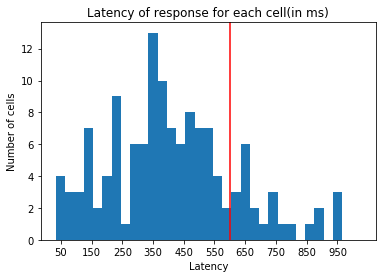

In [280]:
Nfirst=20
mouse_df=onset_bin_aliTraceBlocks['ali24_d2_s1'].loc[:, onset_bin_aliTraceBlocks['ali24_d2_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
avg_latency_ali24_first20=get_latency(mouse_df,active_cells_ali24_FS)
np.mean(avg_latency_ali24_first20)

309.92275536168665

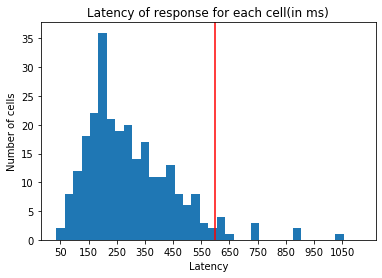

In [281]:
Nfirst=20
mouse_df=onset_bin_aliTraceBlocks['ali25_d2_s1'].loc[:, onset_bin_aliTraceBlocks['ali25_d2_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
avg_latency_ali25_first20=get_latency(mouse_df,active_cells_ali25_FS)
np.mean(avg_latency_ali25_first20)

529.9548440065681

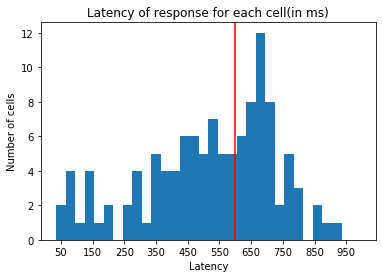

In [282]:
Nfirst=20
mouse_df=onset_bin_aliTraceBlocks['ali26_d2_s1'].loc[:, onset_bin_aliTraceBlocks['ali26_d2_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
avg_latency_ali26_first20=get_latency(mouse_df,active_cells_ali26_FS)
np.mean(avg_latency_ali26_first20)

495.83333333333337

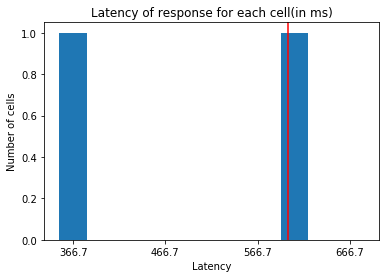

In [283]:
Nfirst=20
Ntrials=40
mouse_df=onset_bin_rTraceBlocks['2982_d1_s1'].loc[:, onset_bin_rTraceBlocks['2982_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
avg_latency_2982_first20=get_latency(mouse_df,active_cells_2982_FS)
np.mean(avg_latency_2982_first20)

315.0

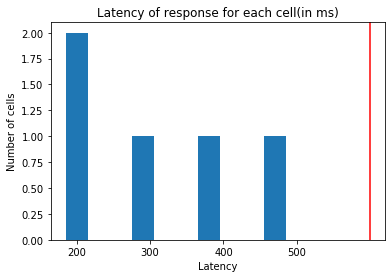

In [284]:
Nfirst=20
Ntrials=40
mouse_df=onset_bin_rTraceBlocks['4540_d1_s1'].loc[:, onset_bin_rTraceBlocks['4540_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
avg_latency_4540_first20=get_latency(mouse_df,active_cells_4540_FS)
np.mean(avg_latency_4540_first20)

359.72222222222223

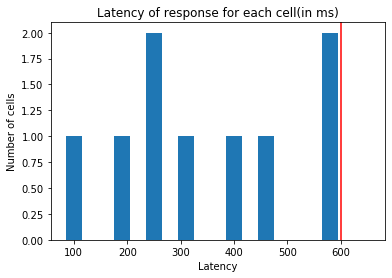

In [285]:
Nfirst=20
Ntrials=40
mouse_df=onset_bin_nrTraceBlocks['2712_d1_s1'].loc[:, onset_bin_nrTraceBlocks['2712_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
avg_latency_2712_first20=get_latency(mouse_df,active_cells_2712_FS)
np.mean(avg_latency_2712_first20)

360.0

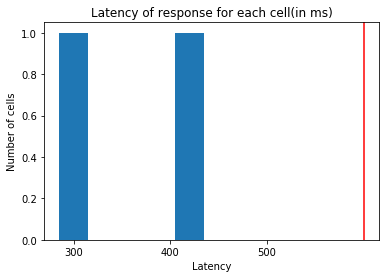

In [286]:
Nfirst=20
Ntrials=40
mouse_df=onset_bin_nrTraceBlocks['2713_d1_s1'].loc[:, onset_bin_nrTraceBlocks['2713_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
avg_latency_2713_first20=get_latency(mouse_df,active_cells_2713_FS)
np.mean(avg_latency_2713_first20)

567.0833333333333

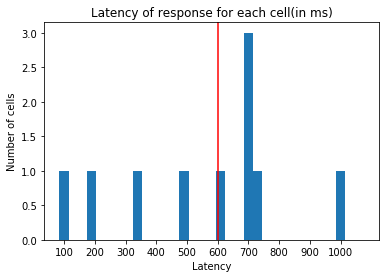

In [287]:
Nfirst=20
Ntrials=40
mouse_df=onset_bin_nrTraceBlocks['2714_d1_s1'].loc[:, onset_bin_nrTraceBlocks['2714_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
avg_latency_2714_first20=get_latency(mouse_df,active_cells_2714_FS)
np.mean(avg_latency_2714_first20)

345.0

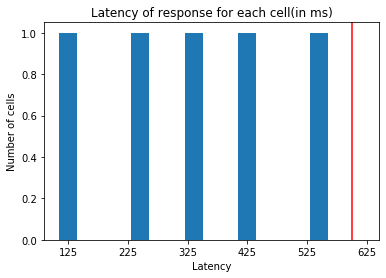

In [288]:
Nfirst=20
Ntrials=40
mouse_df=onset_bin_nrTraceBlocks['8089_d1_s1'].loc[:, onset_bin_nrTraceBlocks['8089_d1_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
avg_latency_8089_first20=get_latency(mouse_df,active_cells_8089_FS)
np.mean(avg_latency_8089_first20)

In [289]:
avg_latency_first_session_first20=np.concatenate((avg_latency_ali24_first20,avg_latency_ali25_first20,avg_latency_ali26_first20,avg_latency_2982_first20,avg_latency_4540_first20,avg_latency_2712_first20,avg_latency_2713_first20,avg_latency_2714_first20,avg_latency_8089_first20),axis=0)
np.size(avg_latency_first_session_first20)

543

In [290]:
avg_latency_first_session_first20_7=np.concatenate((avg_latency_ali24_first20,avg_latency_ali26_first20,avg_latency_2982_first20,avg_latency_4540_first20,avg_latency_2713_first20,avg_latency_2714_first20,avg_latency_8089_first20),axis=0)
np.size(avg_latency_first_session_first20_7)

272

## n=7 latency comparison

In [291]:
ss.f_oneway(avg_latency_first_session_first20_7,avg_latency_first_session_7,avg_latency_last_session_7)

F_onewayResult(statistic=31.05271677009621, pvalue=1.0769080295282899e-13)

In [292]:
np.mean(avg_latency_first_session_first20_7),np.mean(avg_latency_first_session_7),np.mean(avg_latency_last_session_7)

(470.2717962184874, 436.8709105779717, 329.66404358353515)

### n=7 ANOVA and tukey

In [293]:
melt_eg = pd.DataFrame({'First 20': avg_latency_first_session_first20_7.flatten()})
a=pd.melt(melt_eg)
print(a.shape)
melt_eg = pd.DataFrame({'Second 20': avg_latency_first_session_7.flatten()})
b=pd.melt(melt_eg)
print(b.shape)
melt_eg = pd.DataFrame({'Last session': avg_latency_last_session_7.flatten()})
c=pd.melt(melt_eg)
print(c.shape)

(272, 2)
(262, 2)
(236, 2)


In [294]:
272+262+236

770

In [295]:
x= a.append(b)
final_latency_df=x.append(c)

In [296]:
final_latency_df

,variable,value
0,First 20,500.000000
1,First 20,150.000000
2,First 20,75.000000
3,First 20,750.000000
4,First 20,566.666667
...,...,...
231,Last session,450.000000
232,Last session,383.333333
233,Last session,433.333333
234,Last session,583.333333


In [297]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(
    final_latency_df['value'], final_latency_df['variable'],
    alpha=0.05)
print(posthoc)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1       group2     meandiff p-adj    lower    upper   reject
--------------------------------------------------------------------
    First 20 Last session -140.6078  0.001 -183.9584 -97.2571   True
    First 20    Second 20  -33.4009 0.1515  -75.5841   8.7824  False
Last session    Second 20  107.2069  0.001   63.4735 150.9402   True
--------------------------------------------------------------------


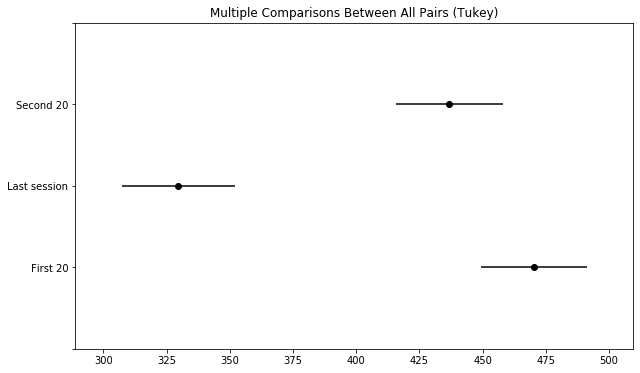

In [298]:
fig = posthoc.plot_simultaneous()


In [299]:
# Find n 
print(np.size(avg_latency_first_session_7)+np.size(avg_latency_last_session_7))
print(np.size(avg_latency_first_session_first20_7)+np.size(avg_latency_last_session_7))

498
508


436.8709105779717 202.8743272568304


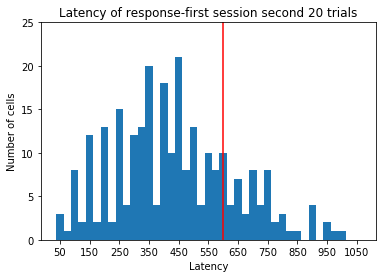

In [300]:
data=avg_latency_first_session_7
n_bins= np.arange(min(data), max(data)+100, 25)
plt.hist(data,n_bins,align='left')
plt.xlabel('Latency')
plt.ylabel('Number of cells')
plt.title('Latency of response-first session second 20 trials')
plt.xticks(np.arange(min(data),max(data)+100,100))
plt.axvline(t,color='r')
plt.ylim([0,25])
plt.savefig('Latency_response_FS_2.eps', format='eps')
#plt.savefig('Latency_response_FS_2.png')
print(np.mean(avg_latency_first_session_7),np.std(avg_latency_first_session_7))

470.2717962184874 214.09459601129524


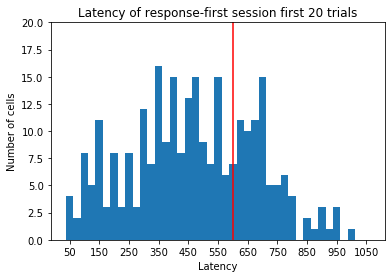

In [301]:
data=avg_latency_first_session_first20_7
n_bins= np.arange(min(data), max(data)+100, 25)
plt.hist(data,n_bins,align='left')
plt.xlabel('Latency')
plt.ylabel('Number of cells')
plt.title('Latency of response-first session first 20 trials')
plt.xticks(np.arange(min(data),max(data)+100,100))
plt.axvline(t,color='r')
plt.ylim([0,20])
plt.savefig('Latency_response_FS_1.eps', format='eps')
#plt.savefig('Latency_response_FS_1.png')
print(np.mean(avg_latency_first_session_first20_7),np.std(avg_latency_first_session_first20_7))

329.66404358353515 203.543974987891


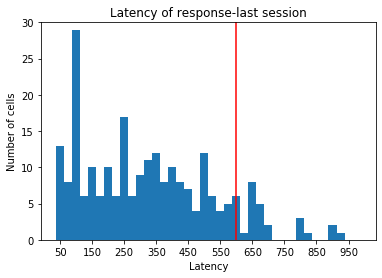

In [302]:
data=avg_latency_last_session_7
n_bins= np.arange(min(data), max(data)+100, 25)
plt.hist(data,n_bins,align='left')
plt.xlabel('Latency')
plt.ylabel('Number of cells')
plt.title('Latency of response-last session')
plt.xticks(np.arange(min(data),max(data)+100,100))
#plt.yticks(np.arange(0,25,5))
plt.axvline(t,color='r')
plt.ylim([0,30])
plt.savefig('Latency_response_CS.eps', format='eps')
#plt.savefig('Latency_response_CS.png', format='png')
print(np.mean(avg_latency_last_session_7),np.std(avg_latency_last_session_7))

Text(1.5, 800, '*')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


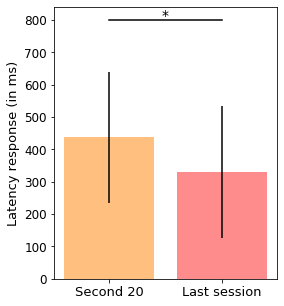

In [303]:
x= [1,2]
h= [np.mean(avg_latency_first_session_7),np.mean(avg_latency_last_session_7)]
error= [np.std(avg_latency_first_session_7),np.std(avg_latency_last_session_7)]
plt.figure(figsize=(4,5))
plt.bar(x,h,yerr=error,color=[[1,0.5,0,0.5],[1,.1,.1,0.5]])
plt.xticks([1, 2,3], ['Second 20', 'Last session'],fontsize=13)
plt.ylabel('Latency response (in ms)',fontsize=13)
plt.yticks(fontsize=12)
plt.plot([1,2],[800,800], 'k')
plt.text(1.5,800, '*', horizontalalignment='center', fontsize=14)

#plt.savefig('Latency_response_compare_bar.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


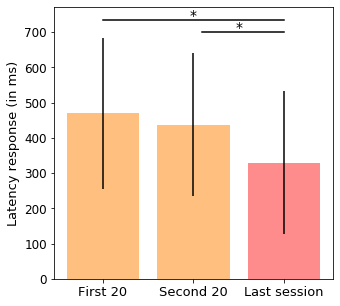

In [304]:
x= [1,2,3]
h= [np.mean(avg_latency_first_session_first20_7),np.mean(avg_latency_first_session_7),np.mean(avg_latency_last_session_7)]
error= [np.std(avg_latency_first_session_first20_7),np.std(avg_latency_first_session_7),np.std(avg_latency_last_session_7)]
plt.figure(figsize=(5,5))
plt.bar(x,h,yerr=error,color=[[1,0.5,0,0.5], [1,0.5,0,0.5],[1,.1,.1,0.5]])
plt.xticks([1, 2,3], ['First 20','Second 20', 'Last session'],fontsize=13)
plt.ylabel('Latency response (in ms)',fontsize=13)
plt.yticks(fontsize=12)
plt.plot([2.1,3],[700,700], 'k')
plt.text(2.51,700, '*', horizontalalignment='center', fontsize=14)
plt.plot([1,3],[735,735], 'k')
plt.text(2,735, '*', horizontalalignment='center', fontsize=14)
plt.savefig('Latency_response_compare_bar.eps', format='eps')

In [305]:
h

[470.2717962184874, 436.8709105779717, 329.66404358353515]

In [306]:
error

[214.09459601129524, 202.8743272568304, 203.543974987891]

In [307]:
melt_eg = pd.DataFrame({'First 20': avg_latency_first_session_first20.flatten()})
a=pd.melt(melt_eg)
print(a.shape)
melt_eg = pd.DataFrame({'Second 20': avg_latency_first_session.flatten()})
b=pd.melt(melt_eg)
print(b.shape)
melt_eg = pd.DataFrame({'Last session': avg_latency_last_session.flatten()})
c=pd.melt(melt_eg)
print(c.shape)
x= a.append(b)
final_latency_df_9=x.append(c)
posthoc = pairwise_tukeyhsd(
    final_latency_df_9['value'], final_latency_df_9['variable'],
    alpha=0.05)
print(posthoc)

(543, 2)
(422, 2)
(278, 2)
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
    First 20 Last session  -36.982 0.0407  -72.735 -1.2291   True
    First 20    Second 20   4.2108    0.9 -27.2501 35.6716  False
Last session    Second 20  41.1928 0.0269   3.7444 78.6412   True
-----------------------------------------------------------------


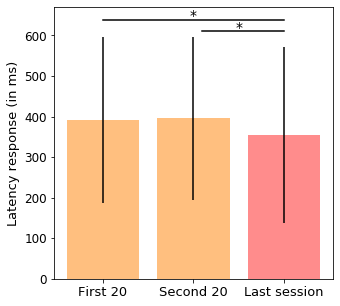

In [308]:
x= [1,2,3]
h= [np.mean(avg_latency_first_session_first20),np.mean(avg_latency_first_session),np.mean(avg_latency_last_session)]
error= [np.std(avg_latency_first_session_first20),np.std(avg_latency_first_session),np.std(avg_latency_last_session)]
plt.figure(figsize=(5,5))
plt.bar(x,h,yerr=error,color=[[1,0.5,0,0.5], [1,0.5,0,0.5],[1,.1,.1,0.5]])
plt.xticks([1, 2,3], ['First 20','Second 20', 'Last session'],fontsize=13)
plt.ylabel('Latency response (in ms)',fontsize=13)
plt.yticks(fontsize=12)

plt.plot([1,3],[638,638], 'k')
plt.text(2,638, '*', horizontalalignment='center', fontsize=14)
plt.plot([2.1,3],[610,610], 'k')
plt.text(2.51,610, '*', horizontalalignment='center', fontsize=14)
plt.savefig('Latency_response_compare_bar_9.png', format='png')

In [309]:
df = {'First training day' : pd.Series(percent_active_cells_FS_second20, index=['ali24', 'ali25', 'ali26','2982','4540','2712','2713','2714','8089']),'Last training day' : pd.Series(percent_active_cells_LS, index=['ali24', 'ali25', 'ali26','2982','4540','2712','2713','2714','8089']),'Extinction' : pd.Series(percent_active_cells_EX, index=['ali24', 'ali25', 'ali26','2982','4540','2712','2713','2714','8089'])}
Active_Cells_percent_df= pd.DataFrame(df)
Active_Cells_percent_df

,First training day,Last training day,Extinction
ali24,17.981439,23.588040,18.936877
ali25,20.762155,12.781955,9.022556
ali26,13.624339,25.059666,8.830549
2982,3.478261,7.516340,5.555556
4540,3.208556,7.518797,5.263158
2712,15.044248,21.259843,9.448819
2713,2.097902,17.730496,12.056738
2714,5.128205,3.267974,7.189542
8089,7.142857,8.000000,17.333333


In [310]:
Active_Cells_percent_df['First training day'].loc['ali25']=np.NaN
Active_Cells_percent_df['First training day'].loc['2712']=np.NaN

In [311]:
Active_Cells_percent_df

,First training day,Last training day,Extinction
ali24,17.981439,23.588040,18.936877
ali25,NaN,12.781955,9.022556
ali26,13.624339,25.059666,8.830549
2982,3.478261,7.516340,5.555556
4540,3.208556,7.518797,5.263158
2712,NaN,21.259843,9.448819
2713,2.097902,17.730496,12.056738
2714,5.128205,3.267974,7.189542
8089,7.142857,8.000000,17.333333


In [312]:
Active_Cells_percent_df['First training day'].mean(),Active_Cells_percent_df['First training day'].std()

(7.523079789668864, 6.012360155346025)

In [313]:
Active_Cells_percent_df['Last training day'].mean(),Active_Cells_percent_df['Last training day'].std()

(14.080345590778505, 8.042965842234757)

In [314]:
def makePairedScatterPlot_modified_colors(df, f_size, clrs, ax=None, ax_pos = [0.2, 0.1, 0.75, 0.8], plotlines=False):
    #Make paired scatter plots with lines between paired points.  Plot Points for each column in DataFrame
    #Font Details
    label_size=9
    tick_size=6
   
    Ncols = df.shape[0]
    #Make Figure
    if ax == None:
        fig = plt.figure(figsize=f_size)
        ax = fig.add_axes(ax_pos)
    else:
        ax.set_position(ax_pos)
    #Loop through each column
    x_iter = 0
    last_c = None
    C= ['yellow','darkgreen','lime','sienna','aqua','slategrey','black','darkmagenta','darkblue']
    for idx, c in enumerate(df):
        avg = df[c].mean()
        ax.bar([x_iter, x_iter], [avg, avg], color=clrs[idx], zorder=0)
        ax.scatter(np.ones((Ncols,1))*x_iter, df[c], color=C, zorder=2)
        u_err, l_err = [df[c].std(), df[c].std()] # [df[c].quantile(q=0.975), df[c].quantile(q=0.025)]
        err_array = np.array([l_err, u_err]).reshape(2,-1)
        ax.errorbar(x_iter, avg, yerr=err_array, color=clrs[idx], zorder=1)
        if plotlines:
            if last_c is not None:
                x_1 = np.ones((Ncols,1))*(x_iter-1)
                x_2 = np.ones((Ncols,1))*x_iter
                y_1 = df[last_c]
                y_2 =  df[c]
                for x1, x2, y1, y2 in zip(x_1, x_2, y_1, y_2):
                    ax.plot([x1,x2], [y1,y2], '--', color=[0,0,0,0.75])
        x_iter += 1
        last_c = c
    #Final Plot Formatting
    ax.grid(b=False)
    ax.set_xticks(np.arange(0,x_iter))
   
    ax.set_xticklabels(df.columns, fontsize=label_size) 
    ax.set_facecolor([1,1,1])
    
    #ax.tick_params(labelsize=tick_size)
    #ax.set_ylim([0, 1])
    #ax.set_yticklabels(np.arange(0,101,20).round(1),fontsize=tick_size)
    ax.set_ylabel('% Active cells')
    return ax

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

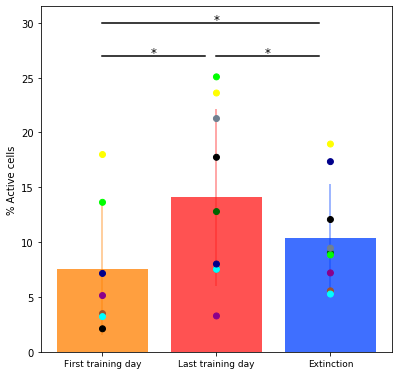

In [315]:
ax=makePairedScatterPlot_modified_colors(Active_Cells_percent_df,[6.5,6], [[1,0.5,0,0.5],[1,.1,.1,0.5],[0,.25,1,0.5]])
ax.plot([0,0.9],[27,27], 'k')
ax.text(0.45, 27, '*', horizontalalignment='center', fontsize=12)
ax.plot([1,1.9],[27,27], 'k')
ax.text(1.45, 27, '*', horizontalalignment='center', fontsize=12)
ax.plot([0,1.9],[30,30], 'k')
ax.text(1, 30, '*', horizontalalignment='center', fontsize=12)
#plt.savefig('active_cell_percent_second20.eps',format='eps')
plt.savefig('active_cell_percent_second20.eps',format='eps')

In [316]:
df = {'First training day' : pd.Series(percent_active_cells_FS_first20, index=['ali24', 'ali25', 'ali26','2982','4540','2712','2713','2714','8089']),'Last training day' : pd.Series(percent_active_cells_LS, index=['ali24', 'ali25', 'ali26','2982','4540','2712','2713','2714','8089']),'Extinction' : pd.Series(percent_active_cells_EX, index=['ali24', 'ali25', 'ali26','2982','4540','2712','2713','2714','8089'])}
Active_Cells_percent_df_2= pd.DataFrame(df)
Active_Cells_percent_df_2

,First training day,Last training day,Extinction
ali24,17.285383,23.588040,18.936877
ali25,35.216820,12.781955,9.022556
ali26,16.269841,25.059666,8.830549
2982,3.478261,7.516340,5.555556
4540,2.673797,7.518797,5.263158
2712,8.849558,21.259843,9.448819
2713,1.398601,17.730496,12.056738
2714,4.273504,3.267974,7.189542
8089,7.142857,8.000000,17.333333


In [317]:
Active_Cells_percent_df_2['First training day'].loc['ali25']=np.NaN
Active_Cells_percent_df_2['First training day'].loc['2712']=np.NaN
Active_Cells_percent_df_2['First training day'].mean(),Active_Cells_percent_df_2['First training day'].std()

(7.503177796634229, 6.5814800258198005)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

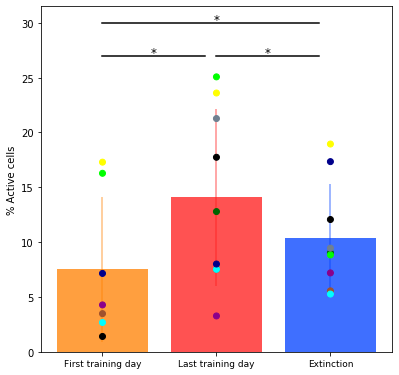

In [318]:
ax=makePairedScatterPlot_modified_colors(Active_Cells_percent_df_2,[6.5,6], [[1,0.5,0,0.5],[1,.1,.1,0.5],[0,.25,1,0.5]])
ax.plot([0,0.9],[27,27], 'k')
ax.text(0.45, 27, '*', horizontalalignment='center', fontsize=12)
ax.plot([1,1.9],[27,27], 'k')
ax.text(1.45, 27, '*', horizontalalignment='center', fontsize=12)
ax.plot([0,1.9],[30,30], 'k')
ax.text(1, 30, '*', horizontalalignment='center', fontsize=12)
plt.savefig('active_cell_percent_first20.eps',format='eps')

## Day before extinction 

In [319]:
def makeAliFilenames_modified(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                if ((m_day != 2) | (m_sess != 2)): #Skip d2_s2.  Only do d5_s2
                    mouse_dir = 'ali{}_d{}_s{}/'.format(m_num, m_day, m_sess)
                    directories.append(mouse_dir)
                    filenames[mouse_dir] = 'binary_traces.h5'
                   
    return directories, filenames

In [320]:
def makeRebeccaFilenames_modified(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                mouse_dir = '{}/{}_d{}_s{}/'.format(m_num, m_num, m_day, m_sess)
                directories.append(mouse_dir)
                filenames[mouse_dir] = 'binary_traces.h5'
    return directories, filenames

In [322]:
#Initialize Input Values
#Ali Mice
aliBase = '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/'
aliMice, aliDays, aliSessions = ([24,25,26], [4], [1])
aliFolders, aliFilenames = makeAliFilenames_modified(aliMice, aliDays, aliSessions)
bin_aliFiles = combineFilenames(aliBase, aliFolders, aliFilenames)
#Rebecca Mice
rBase = '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/'
rMice, rDays, rSessions = ([2982,4540], [8], [1])
rFolders, rFilenames = makeRebeccaFilenames_modified(rMice, rDays, rSessions)
bin_rFiles = combineFilenames(rBase, rFolders, rFilenames)
#New Rebecca Mice
nrBase = '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/'
nrMice, nrDays, nrSessions = ([2712, 2713,2714,8089], [4], [1]) #Also have 2 as full imaging session.  Drop 2714 because of data quality
nrFolders, nrFilenames = makeRebeccaFilenames_modified(nrMice, nrDays, nrSessions)
bin_nrFiles = combineFilenames(nrBase, nrFolders, nrFilenames)
#Combine All Filenames into one List
bin_allFiles = bin_aliFiles + bin_rFiles + bin_nrFiles
print(bin_allFiles)

['/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali24_d4_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali25_d4_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali26_d4_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/2982/2982_d8_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/4540/4540_d8_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/2712/2712_d4_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/2713/2713_d4_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/2714/2714_d4_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/8089/8089_d4_s1/binary_traces.h5']


In [323]:
def loadbinaryTraces(files, whichData):
    #Load all the trace data and normalize traces with baseline adjustments
    #Load and doughnut subtract traces
    binTraces = loadFiles(files, 'binary_trace', whichData=whichData, multiIndex=True)
    
    return binTraces

In [324]:
ali_binary_traces=loadbinaryTraces(bin_aliFiles, 'Ali')
r_binary_traces=loadbinaryTraces(bin_rFiles, 'Rebecca')
nr_binary_traces=loadbinaryTraces(bin_nrFiles, 'Rebecca')

### Need to load aliSounds,rSounds and nrSounds

In [325]:
def makeAliFilenames(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                if ((m_day != 2) | (m_sess != 2)): #Skip d2_s2.  Only do d5_s2
                    mouse_dir = 'ali{}_d{}_s{}/'.format(m_num, m_day, m_sess)
                    directories.append(mouse_dir)
                    filenames[mouse_dir] = 'trace_kyleFinal_matched_BinaryVideo.hdf5'
                   
    return directories, filenames

In [326]:
def makeRebeccaFilenames(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                mouse_dir = '{}/{}_d{}_s{}/'.format(m_num, m_num, m_day, m_sess)
                directories.append(mouse_dir)
                filenames[mouse_dir] = 'trace_kyleFinal_BinaryVideo.hdf5'
    return directories, filenames

In [333]:

#Ali Mice
aliBase = '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/'
aliMice, aliDays, aliSessions = ([24,25,26], [4], [1,2])
aliFolders, aliFilenames = makeAliFilenames(aliMice, aliDays, aliSessions)
aliFiles = combineFilenames(aliBase, aliFolders, aliFilenames)
#Rebecca Mice
rBase = '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/'
rMice, rDays, rSessions = ([2982,4540], [8], [1])
rFolders, rFilenames = makeRebeccaFilenames(rMice, rDays, rSessions)
rFiles = combineFilenames(rBase, rFolders, rFilenames)
#New Rebecca Mic_
nrBase = '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/'
nrMice, nrDays, nrSessions = ([2712, 2713,2714,8089], [4], [1]) #Also have 2 as full imaging session.  Drop 2714 because of data quality
nrFolders, nrFilenames = makeRebeccaFilenames(nrMice, nrDays, nrSessions)
nrFiles = combineFilenames(nrBase, nrFolders, nrFilenames)
#Combine All Filenames into one List
allFiles = aliFiles + rFiles + nrFiles
print(allFiles)

['/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali24_d4_s1/trace_kyleFinal_matched_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali24_d4_s2/trace_kyleFinal_matched_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali25_d4_s1/trace_kyleFinal_matched_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali25_d4_s2/trace_kyleFinal_matched_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali26_d4_s1/trace_kyleFinal_matched_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali26_d4_s2/trace_kyleFinal_matched_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/2982/2982_d8_s1/trace_kyleFinal_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/4540/4540_d8_s1/trace_kyleFinal_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata_2/eng_research_ha

In [334]:
aliSounds = loadFiles(aliFiles, 'binSounds', whichData='Ali')
rSounds = loadFiles(rFiles, 'binSounds', whichData='Rebecca')
nrSounds = loadFiles(nrFiles, 'binSounds', whichData='Rebecca', fixedSize=39500)
sound_traces = pd.concat([aliSounds,rSounds,nrSounds], axis=1)
#sound_traces = pd.concat([rSounds,nrSounds], axis=1)

In [335]:
print('Ali Binary Blocks')
bin_aliTraceBlocks, bin_aliTraceNoBlocks = makeTraceTrialBlocks(ali_binary_traces, aliSounds) 
print('Rebecca Binary Blocks')
bin_rTraceBlocks, bin_rTraceNoBlocks = makeTraceTrialBlocks(r_binary_traces, rSounds) 
print('New Rebecca Binary Blocks')
bin_nrTraceBlocks, bin_nrTraceNoBlocks = makeTraceTrialBlocks(nr_binary_traces, nrSounds) 

Ali Binary Blocks
ali24_d4_s1
ali25_d4_s1
ali26_d4_s1
Rebecca Binary Blocks
2982_d8_s1
4540_d8_s1
New Rebecca Binary Blocks
2712_d4_s1
2713_d4_s1
2714_d4_s1
8089_d4_s1


In [336]:
print(bin_aliTraceBlocks['ali24_d4_s1'].columns.unique('cell_num').shape)
print(bin_aliTraceBlocks['ali25_d4_s1'].columns.unique('cell_num').shape)
print(bin_aliTraceBlocks['ali26_d4_s1'].columns.unique('cell_num').shape)
print(bin_rTraceBlocks['2982_d8_s1'].columns.unique('cell_num').shape)
print(bin_rTraceBlocks['4540_d8_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2712_d4_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2713_d4_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2714_d4_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['8089_d4_s1'].columns.unique('cell_num').shape)

(406,)
(337,)
(584,)
(168,)
(218,)
(159,)
(141,)
(227,)
(108,)


In [337]:
total_cells_day_before = bin_aliTraceBlocks['ali24_d4_s1'].columns.unique('cell_num').shape[0]+bin_aliTraceBlocks['ali26_d4_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['2982_d8_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['4540_d8_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2713_d4_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2714_d4_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['8089_d4_s1'].columns.unique('cell_num').shape[0]
total_cells_day_before

1852

In [338]:
total_cells_day_before_all = bin_aliTraceBlocks['ali24_d4_s1'].columns.unique('cell_num').shape[0]+bin_aliTraceBlocks['ali26_d4_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['2982_d8_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['4540_d8_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2713_d4_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2714_d4_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['8089_d4_s1'].columns.unique('cell_num').shape[0]+bin_aliTraceBlocks['ali25_d4_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2712_d4_s1'].columns.unique('cell_num').shape[0]
total_cells_day_before_all

2348

In [339]:
f1 = h5py.File("Thresholds_DB.h5", "r")
f1.keys()

<KeysViewHDF5 ['2712', '2713', '2714', '2982', '4540', '8089', 'Ali_24', 'Ali_25', 'Ali_26']>

In [340]:
# Load all thresholds 
threshold_ali24_DB=np.array(f1['Ali_24'])
threshold_ali25_DB=np.array(f1['Ali_25'])
threshold_ali26_DB=np.array(f1['Ali_26'])
threshold_2982_DB=np.array(f1['2982'])
threshold_4540_DB=np.array(f1['4540'])
threshold_2712_DB=np.array(f1['2712'])
threshold_2713_DB=np.array(f1['2713'])
threshold_2714_DB=np.array(f1['2714'])
threshold_8089_DB=np.array(f1['8089'])

In [341]:

Nfirst=20
mouse_df=bin_aliTraceBlocks['ali24_d4_s1'].loc[:, bin_aliTraceBlocks['ali24_d4_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
active_cells_ali24_DB_1,n_active_cells_ali24_DB_1,percent_active_cells_ali24_DB_1=identify_active_cells(mouse_df,threshold_ali24_DB)
Ntrials=40
mouse_df=bin_aliTraceBlocks['ali24_d4_s1'].loc[:, bin_aliTraceBlocks['ali24_d4_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_ali24_DB_2,n_active_cells_ali24_DB_2,percent_active_cells_ali24_DB_2=identify_active_cells(mouse_df,threshold_ali24_DB)

mouse_df=bin_aliTraceBlocks['ali25_d4_s1'].loc[:, bin_aliTraceBlocks['ali25_d4_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
active_cells_ali25_DB_1,n_active_cells_ali25_DB_1,percent_active_cells_ali25_DB_1=identify_active_cells(mouse_df,threshold_ali25_DB)
mouse_df=bin_aliTraceBlocks['ali25_d4_s1'].loc[:, bin_aliTraceBlocks['ali25_d4_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_ali25_DB_2,n_active_cells_ali25_DB_2,percent_active_cells_ali25_DB_2=identify_active_cells(mouse_df,threshold_ali25_DB)

mouse_df=bin_aliTraceBlocks['ali26_d4_s1'].loc[:, bin_aliTraceBlocks['ali26_d4_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
active_cells_ali26_DB_1,n_active_cells_ali26_DB_1,percent_active_cells_ali26_DB_1=identify_active_cells(mouse_df,threshold_ali26_DB)
mouse_df=bin_aliTraceBlocks['ali26_d4_s1'].loc[:, bin_aliTraceBlocks['ali26_d4_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
active_cells_ali26_DB_2,n_active_cells_ali26_DB_2,percent_active_cells_ali26_DB_2=identify_active_cells(mouse_df,threshold_ali26_DB)

In [342]:

def actual_percent_active_trials(mouse_df):
    trials = mouse_df.columns.unique('trial')
    Ntrials = trials.shape[0]
    cells = mouse_df.columns.unique('cell_num')
    Ncells = cells.shape[0]
    tone_time=40
    window_end = 60
    out_bin= np.zeros((Ncells))
    for cell in cells:
        active_trials=[]
        for trial in trials:
            temp_df=mouse_df[trial].loc[tone_time:window_end,cell]
            a=np.array(np.where(temp_df==1))
            active_trials.append(a.size)
    #print(active_trials)
        out_bin[cell]=np.mean(active_trials)
            


    percent_active_trials=np.squeeze(out_bin)
    return percent_active_trials

In [343]:
def get_active_trials_3_blocks(TraceBlocks):
    Nfirst=20
    mouse_df=TraceBlocks.loc[:,TraceBlocks.columns.get_level_values('trial').isin(range(Nfirst))]
    percent_active_trials_1=actual_percent_active_trials(mouse_df)
    Ntrials=40
    mouse_df=TraceBlocks.loc[:,TraceBlocks.columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
    percent_active_trials_2=actual_percent_active_trials(mouse_df)
    Nfirst=40
    Ntrials=60
    mouse_df=TraceBlocks.loc[:,TraceBlocks.columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
    percent_active_trials_3=actual_percent_active_trials(mouse_df)
    return percent_active_trials_1,percent_active_trials_2,percent_active_trials_3

In [344]:
# Compare 2nd cell firing rate in first 20 trials to above mean + 2std dev
def identify_active_cells_2(threshold,percent_active_trials):
    a=percent_active_trials>threshold
    active_cells=np.squeeze(np.argwhere(a==1))
    n_active_cells=np.argwhere(a==1).size
    percent_active_cells=(np.argwhere(a==1).size/threshold.shape[0])*100       


    
    return active_cells,n_active_cells,percent_active_cells

In [345]:
percent_active_trials_2982_DB_1,percent_active_trials_2982_DB_2,percent_active_trials_2982_DB_3=get_active_trials_3_blocks(bin_rTraceBlocks['2982_d8_s1'])
percent_active_trials_4540_DB_1,percent_active_trials_4540_DB_2,percent_active_trials_4540_DB_3=get_active_trials_3_blocks(bin_rTraceBlocks['4540_d8_s1'])

percent_active_trials_2712_DB_1,percent_active_trials_2712_DB_2,percent_active_trials_2712_DB_3=get_active_trials_3_blocks(bin_nrTraceBlocks['2712_d4_s1'])
percent_active_trials_2713_DB_1,percent_active_trials_2713_DB_2,percent_active_trials_2713_DB_3=get_active_trials_3_blocks(bin_nrTraceBlocks['2713_d4_s1'])
percent_active_trials_2714_DB_1,percent_active_trials_2714_DB_2,percent_active_trials_2714_DB_3=get_active_trials_3_blocks(bin_nrTraceBlocks['2714_d4_s1'])
percent_active_trials_8089_DB_1,percent_active_trials_8089_DB_2,percent_active_trials_8089_DB_3=get_active_trials_3_blocks(bin_nrTraceBlocks['8089_d4_s1'])


In [346]:
active_cells_2982_DB_1,n_active_cells_2982_DB_1,percent_active_cells_2982_DB_1=identify_active_cells_2(threshold_2982_DB,percent_active_trials_2982_DB_1)
active_cells_2982_DB_2,n_active_cells_2982_DB_2,percent_active_cells_2982_DB_2=identify_active_cells_2(threshold_2982_DB,percent_active_trials_2982_DB_2)
active_cells_2982_DB_3,n_active_cells_2982_DB_3,percent_active_cells_2982_DB_3=identify_active_cells_2(threshold_2982_DB,percent_active_trials_2982_DB_3)

active_cells_4540_DB_1,n_active_cells_4540_DB_1,percent_active_cells_4540_DB_1=identify_active_cells_2(threshold_4540_DB,percent_active_trials_4540_DB_1)
active_cells_4540_DB_2,n_active_cells_4540_DB_2,percent_active_cells_4540_DB_2=identify_active_cells_2(threshold_4540_DB,percent_active_trials_4540_DB_2)
active_cells_4540_DB_3,n_active_cells_4540_DB_3,percent_active_cells_4540_DB_3=identify_active_cells_2(threshold_4540_DB,percent_active_trials_4540_DB_3)


active_cells_2712_DB_1,n_active_cells_2712_DB_1,percent_active_cells_2712_DB_1=identify_active_cells_2(threshold_2712_DB,percent_active_trials_2712_DB_1)
active_cells_2712_DB_2,n_active_cells_2712_DB_2,percent_active_cells_2712_DB_2=identify_active_cells_2(threshold_2712_DB,percent_active_trials_2712_DB_2)
active_cells_2712_DB_3,n_active_cells_2712_DB_3,percent_active_cells_2712_DB_3=identify_active_cells_2(threshold_2712_DB,percent_active_trials_2712_DB_3)


active_cells_2713_DB_1,n_active_cells_2713_DB_1,percent_active_cells_2713_DB_1=identify_active_cells_2(threshold_2713_DB,percent_active_trials_2713_DB_1)
active_cells_2713_DB_2,n_active_cells_2713_DB_2,percent_active_cells_2713_DB_2=identify_active_cells_2(threshold_2713_DB,percent_active_trials_2713_DB_2)
active_cells_2713_DB_3,n_active_cells_2713_DB_3,percent_active_cells_2713_DB_3=identify_active_cells_2(threshold_2713_DB,percent_active_trials_2713_DB_3)

active_cells_2714_DB_1,n_active_cells_2714_DB_1,percent_active_cells_2714_DB_1=identify_active_cells_2(threshold_2714_DB,percent_active_trials_2714_DB_1)
active_cells_2714_DB_2,n_active_cells_2714_DB_2,percent_active_cells_2714_DB_2=identify_active_cells_2(threshold_2714_DB,percent_active_trials_2714_DB_2)
active_cells_2714_DB_3,n_active_cells_2714_DB_3,percent_active_cells_2714_DB_3=identify_active_cells_2(threshold_2714_DB,percent_active_trials_2714_DB_3)

active_cells_8089_DB_1,n_active_cells_8089_DB_1,percent_active_cells_8089_DB_1=identify_active_cells_2(threshold_8089_DB,percent_active_trials_8089_DB_1)
active_cells_8089_DB_2,n_active_cells_8089_DB_2,percent_active_cells_8089_DB_2=identify_active_cells_2(threshold_8089_DB,percent_active_trials_8089_DB_2)
active_cells_8089_DB_3,n_active_cells_8089_DB_3,percent_active_cells_8089_DB_3=identify_active_cells_2(threshold_8089_DB,percent_active_trials_8089_DB_3)


### Rebecca's mice - first 20 vs second 20 

In [347]:
common_cells_ali24_DB=common_cells(active_cells_ali24_DB_1,active_cells_ali24_DB_2)[0]
common_cells_ali25_DB=common_cells(active_cells_ali25_DB_1,active_cells_ali25_DB_2)[0]
common_cells_ali26_DB=common_cells(active_cells_ali26_DB_1,active_cells_ali26_DB_2)[0]

common_cells_2982_DB=common_cells(active_cells_2982_DB_1,active_cells_2982_DB_2)[0]
common_cells_4540_DB=common_cells(active_cells_4540_DB_1,active_cells_4540_DB_2)[0]
common_cells_2712_DB=common_cells(active_cells_2712_DB_1,active_cells_2712_DB_2)[0]
common_cells_2713_DB=common_cells(active_cells_2713_DB_1,active_cells_2713_DB_2)[0]
common_cells_2714_DB=common_cells(active_cells_2714_DB_1,active_cells_2714_DB_2)[0]
common_cells_8089_DB=common_cells(active_cells_8089_DB_1,active_cells_8089_DB_2)[0]


In [348]:
Active_cells_DB1_all=n_active_cells_ali24_DB_1+n_active_cells_ali25_DB_1+n_active_cells_ali26_DB_1+n_active_cells_2982_DB_1+n_active_cells_4540_DB_1+n_active_cells_2712_DB_1+n_active_cells_2713_DB_1+n_active_cells_2714_DB_1+n_active_cells_8089_DB_1
Active_cells_DB2_all=n_active_cells_ali24_DB_2+n_active_cells_ali25_DB_2+n_active_cells_ali26_DB_2+n_active_cells_2982_DB_2+n_active_cells_4540_DB_2+n_active_cells_2712_DB_2+n_active_cells_2713_DB_2+n_active_cells_2714_DB_2+n_active_cells_8089_DB_2

In [349]:
common_cells_list_DB_2= [common_cells_ali24_DB,common_cells_ali25_DB,common_cells_ali26_DB,common_cells_2982_DB,common_cells_4540_DB,common_cells_2712_DB,common_cells_2713_DB,common_cells_2714_DB,common_cells_8089_DB]
common_cells_list_DB_2

[10, 37, 32, 3, 1, 7, 6, 2, 1]

In [350]:
np.sum(common_cells_list_DB_2)

99

In [351]:
common_cells_DB=np.sum(common_cells_list_DB_2)
non_common_cells_DB = Active_cells_DB1_all+Active_cells_DB2_all-2*common_cells_DB
common_cells_LS=np.sum(common_cells_list)
non_common_cells_LS=Active_cells_last_day_all+Active_cells_EX_all-2*common_cells_LS
table=[(common_cells_LS,common_cells_DB),(non_common_cells_LS,non_common_cells_DB)]
print(table)
print(ss.fisher_exact(table))

[(49, 99), (391, 398)]
(0.5038104833501253, 0.00022631128222601576)


In [352]:
common_cells_DB/(Active_cells_DB1_all+Active_cells_DB2_all-common_cells_DB)*100,common_cells_LS/(Active_cells_last_day_all+Active_cells_EX_all-common_cells_LS)*100

(19.919517102615693, 11.136363636363637)

In [353]:
def get_common_CS_cells(CS_cells,EX_cells):
    return np.in1d(CS_cells,EX_cells).sum() / float(CS_cells.shape[0])*100

In [354]:
last_common_pct_ali24=np.in1d(active_cells_ali24_DB_1,active_cells_ali24_DB_2).sum() / float(active_cells_ali24_DB_1.shape[0])*100
last_common_pct_ali25=np.in1d(active_cells_ali25_DB_1,active_cells_ali25_DB_2).sum() / float(active_cells_ali25_DB_1.shape[0])*100
last_common_pct_ali26=np.in1d(active_cells_ali26_DB_1,active_cells_ali26_DB_2).sum() / float(active_cells_ali26_DB_1.shape[0])*100
last_common_pct_2982=np.in1d(active_cells_2982_DB_1,active_cells_2982_DB_2).sum() / float(active_cells_2982_DB_1.shape[0])*100
last_common_pct_4540=np.in1d(active_cells_4540_DB_1,active_cells_4540_DB_2).sum() / float(active_cells_4540_DB_1.shape[0])*100
last_common_pct_2712=np.in1d(active_cells_2712_DB_1,active_cells_2712_DB_2).sum() / float(active_cells_2712_DB_1.shape[0])*100
last_common_pct_2713=np.in1d(active_cells_2713_DB_1,active_cells_2713_DB_2).sum() / float(active_cells_2713_DB_1.shape[0])*100
last_common_pct_2714=np.in1d(active_cells_2714_DB_1,active_cells_2714_DB_2).sum() / float(active_cells_2714_DB_1.shape[0])*100
last_common_pct_8089=np.in1d(active_cells_8089_DB_1,active_cells_8089_DB_2).sum() / float(active_cells_8089_DB_1.shape[0])*100
percent_lateday_cells =[last_common_pct_ali24,last_common_pct_ali25,last_common_pct_ali26,last_common_pct_2982,last_common_pct_4540,last_common_pct_2712,last_common_pct_2713,last_common_pct_2714,last_common_pct_8089]

In [355]:
print(np.mean(percent_lateday_cells),np.std(percent_lateday_cells))

26.93625702291946 14.68391060614485


In [356]:
ss.ttest_rel(percent_lateday_cells,percent_CO_EX_cells)

Ttest_relResult(statistic=2.0319623566108014, pvalue=0.0766236004850361)

## First 20 trials EX - first 20 vs second 20 all animals late day

In [357]:
common_cells_ali24_DB=common_cells(active_cells_ali24_DB_1,active_cells_ali24_DB_2)[0]
common_cells_ali25_DB=common_cells(active_cells_ali25_DB_1,active_cells_ali25_DB_2)[0]
common_cells_ali26_DB=common_cells(active_cells_ali26_DB_1,active_cells_ali26_DB_2)[0]

common_cells_2982_DB=common_cells(active_cells_2982_DB_1,active_cells_2982_DB_2)[0]
common_cells_4540_DB=common_cells(active_cells_4540_DB_1,active_cells_4540_DB_2)[0]
common_cells_2712_DB=common_cells(active_cells_2712_DB_1,active_cells_2712_DB_2)[0]
common_cells_2713_DB=common_cells(active_cells_2713_DB_1,active_cells_2713_DB_2)[0]
common_cells_2714_DB=common_cells(active_cells_2714_DB_1,active_cells_2714_DB_2)[0]
common_cells_8089_DB=common_cells(active_cells_8089_DB_1,active_cells_8089_DB_2)[0]


In [358]:
Active_cells_DB1_all=n_active_cells_ali24_DB_1+n_active_cells_ali25_DB_1+n_active_cells_ali26_DB_1+n_active_cells_2982_DB_1+n_active_cells_4540_DB_1+n_active_cells_2712_DB_1+n_active_cells_2713_DB_1+n_active_cells_2714_DB_1+n_active_cells_8089_DB_1
Active_cells_DB2_all=n_active_cells_ali24_DB_2+n_active_cells_ali25_DB_2+n_active_cells_ali26_DB_2+n_active_cells_2982_DB_2+n_active_cells_4540_DB_2+n_active_cells_2712_DB_2+n_active_cells_2713_DB_2+n_active_cells_2714_DB_2+n_active_cells_8089_DB_2

In [359]:
n_active_cells_ali24_DB_1,n_active_cells_ali25_DB_1,n_active_cells_ali26_DB_1,n_active_cells_2982_DB_1,n_active_cells_4540_DB_1,n_active_cells_2712_DB_1,n_active_cells_2713_DB_1,n_active_cells_2714_DB_1,n_active_cells_8089_DB_1

(57, 83, 64, 14, 14, 22, 27, 5, 13)

In [360]:
n_active_cells_ali24_DB_2,n_active_cells_ali25_DB_2,n_active_cells_ali26_DB_2,n_active_cells_2982_DB_2,n_active_cells_4540_DB_2,n_active_cells_2712_DB_2,n_active_cells_2713_DB_2,n_active_cells_2714_DB_2,n_active_cells_8089_DB_2

(68, 75, 70, 13, 22, 19, 14, 6, 10)

In [361]:
common_cells_list_DB_2= [common_cells_ali24_DB,common_cells_ali25_DB,common_cells_ali26_DB,common_cells_2982_DB,common_cells_4540_DB,common_cells_2712_DB,common_cells_2713_DB,common_cells_2714_DB,common_cells_8089_DB]
common_cells_list_DB_2

[10, 37, 32, 3, 1, 7, 6, 2, 1]

In [362]:
common_cells_DB=np.sum(common_cells_list_DB_2)
non_common_cells_DB = Active_cells_DB1_all+Active_cells_DB2_all-2*common_cells_DB
common_cells_LS=np.sum(common_cells_list_first20)
non_common_cells_LS=Active_cells_last_day_all+Active_cells_EX_all_first20-2*common_cells_LS
table=[(common_cells_LS,common_cells_DB),(non_common_cells_LS,non_common_cells_DB)]
print(table)
print(ss.fisher_exact(table))

[(61, 99), (403, 398)]
(0.6085169310975762, 0.005481514417165953)


In [363]:
common_cells_DB/(Active_cells_DB1_all+Active_cells_DB2_all-common_cells_DB)*100,common_cells_LS/(Active_cells_last_day_all+Active_cells_EX_all_first20-common_cells_LS)*100

(19.919517102615693, 13.14655172413793)

## Second 20 trials EX - first 20 vs second 20 all animals late day

In [364]:
common_cells_DB=np.sum(common_cells_list_DB_2)
non_common_cells_DB = Active_cells_DB1_all+Active_cells_DB2_all-2*common_cells_DB
common_cells_LS=np.sum(common_cells_list)
non_common_cells_LS=Active_cells_last_day_all+Active_cells_EX_all-2*common_cells_LS
table=[(common_cells_LS,common_cells_DB),(non_common_cells_LS,non_common_cells_DB)]
print(table)
print(ss.fisher_exact(table))

[(49, 99), (391, 398)]
(0.5038104833501253, 0.00022631128222601576)


In [365]:
common_cells_DB/(Active_cells_DB1_all+Active_cells_DB2_all-common_cells_DB)*100,common_cells_LS/(Active_cells_last_day_all+Active_cells_EX_all-common_cells_LS)*100

(19.919517102615693, 11.136363636363637)

### Active cells from both the block of 20 trials - first 20 and second 20 

In [366]:
Active_cells_ali24_late=Union(active_cells_ali24_DB_1,active_cells_ali24_DB_2)
Active_cells_ali25_late=Union(active_cells_ali25_DB_1,active_cells_ali25_DB_2)
Active_cells_ali26_late=Union(active_cells_ali26_DB_1,active_cells_ali26_DB_2)
Active_cells_2982_late=Union(active_cells_2982_DB_1,active_cells_2982_DB_2)
Active_cells_4540_late=Union(active_cells_4540_DB_1,active_cells_4540_DB_2)
Active_cells_2712_late=Union(active_cells_2712_DB_1,active_cells_2712_DB_2)
Active_cells_2713_late=Union(active_cells_2713_DB_1,active_cells_2713_DB_2)
Active_cells_2714_late=Union(active_cells_2714_DB_1,active_cells_2714_DB_2)
Active_cells_8089_late=Union(active_cells_8089_DB_1,active_cells_8089_DB_2)

## Compare common cell % late day vs last day

In [367]:
def makePairedScatterPlot_modified_colors(df, f_size, clrs, ax=None, ax_pos = [0.2, 0.1, 0.75, 0.8], plotlines=False):
    #Make paired scatter plots with lines between paired points.  Plot Points for each column in DataFrame
    #Font Details
    label_size=9
    tick_size=6
   
    Ncols = df.shape[0]
    #Make Figure
    if ax == None:
        fig = plt.figure(figsize=f_size)
        ax = fig.add_axes(ax_pos)
    else:
        ax.set_position(ax_pos)
    #Loop through each column
    x_iter = 0
    last_c = None
    C= ['yellow','darkgreen','lime','sienna','aqua','slategrey','black','darkmagenta','darkblue']
    for idx, c in enumerate(df):
        avg = df[c].mean()
        ax.bar([x_iter, x_iter], [avg, avg], color=clrs[idx], zorder=0)
        ax.scatter(np.ones((Ncols,1))*x_iter, df[c], color=C, zorder=2)
        u_err, l_err = [df[c].std(), df[c].std()] # [df[c].quantile(q=0.975), df[c].quantile(q=0.025)]
        err_array = np.array([l_err, u_err]).reshape(2,-1)
        ax.errorbar(x_iter, avg, yerr=err_array, color=clrs[idx], zorder=1)
        if plotlines:
            if last_c is not None:
                x_1 = np.ones((Ncols,1))*(x_iter-1)
                x_2 = np.ones((Ncols,1))*x_iter
                y_1 = df[last_c]
                y_2 =  df[c]
                for x1, x2, y1, y2 in zip(x_1, x_2, y_1, y_2):
                    ax.plot([x1,x2], [y1,y2], '--', color=[0,0,0,0.75])
        x_iter += 1
        last_c = c
    #Final Plot Formatting
    ax.grid(b=False)
    ax.set_xticks(np.arange(0,x_iter))
   
    ax.set_xticklabels(df.columns, fontsize=label_size) 
    ax.set_facecolor([1,1,1])
    
    #ax.tick_params(labelsize=tick_size)
    #ax.set_ylim([0, 1])
    #ax.set_yticklabels(np.arange(0,101,20).round(1),fontsize=tick_size)
    ax.set_ylabel('% Common cells')
    return ax

In [368]:
common_cells_percent_ali24_DB=common_cells(active_cells_ali24_DB_1,active_cells_ali24_DB_2)[4]
common_cells_percent_ali25_DB=common_cells(active_cells_ali25_DB_1,active_cells_ali25_DB_2)[4]
common_cells_percent_ali26_DB=common_cells(active_cells_ali26_DB_1,active_cells_ali26_DB_2)[4]

common_cells_percent_2982_DB=common_cells(active_cells_2982_DB_1,active_cells_2982_DB_2)[4]
common_cells_percent_4540_DB=common_cells(active_cells_4540_DB_1,active_cells_4540_DB_2)[4]

common_cells_percent_2712_DB=common_cells(active_cells_2712_DB_1,active_cells_2712_DB_2)[4]
common_cells_percent_2713_DB=common_cells(active_cells_2713_DB_1,active_cells_2713_DB_2)[4]
common_cells_percent_2714_DB=common_cells(active_cells_2714_DB_1,active_cells_2714_DB_2)[4]
common_cells_percent_8089_DB=common_cells(active_cells_8089_DB_1,active_cells_8089_DB_2)[4]
common_cells_percent_list_DB= [common_cells_percent_ali24_DB,common_cells_percent_ali25_DB,common_cells_percent_ali26_DB,common_cells_percent_2982_DB,common_cells_percent_4540_DB,common_cells_percent_2712_DB,common_cells_percent_2713_DB,common_cells_percent_2714_DB,common_cells_percent_8089_DB]
common_cells_percent_list_DB

[8.695652173913043,
 30.57851239669421,
 31.372549019607842,
 12.5,
 2.857142857142857,
 20.588235294117645,
 17.142857142857142,
 22.22222222222222,
 4.545454545454546]

In [369]:
# Using second 20 EX and late day first 20 vs second 20
df = {'Late training day' : pd.Series(common_cells_percent_list_DB, index=['ali24', 'ali25', 'ali26','2982','4540','2712','2713','2714','8089']),'Last training day' : pd.Series(common_cells_percent_list_CS, index=['ali24', 'ali25', 'ali26','2982','4540','2712','2713','2714','8089'])}
common_percent_cells_first20= pd.DataFrame(df)
common_percent_cells_first20

,Late training day,Last training day
ali24,8.695652,9.401709
ali25,30.578512,16.000000
ali26,31.372549,15.447154
2982,12.500000,5.263158
4540,2.857143,6.250000
2712,20.588235,11.428571
2713,17.142857,10.526316
2714,22.222222,14.285714
8089,4.545455,5.555556


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


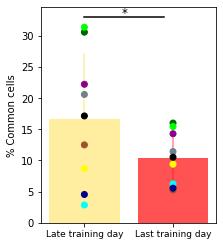

In [370]:
ax=makePairedScatterPlot_modified_colors(common_percent_cells_first20,(3.25,3.75),['#FFEDA0',[1,.1,.1,0.5]])
ax.plot([0,.9],[33,33], 'k')
ax.text(0.45, 33, '*', horizontalalignment='center', fontsize=12)
#plt.savefig('Common_percent_first20vssecond20.png',format='png',dpi=1200)
plt.savefig('Common_percent_first20vssecond20.eps',format='eps')

## Network analysis 

In [371]:
ali_onset_binary_traces=loadonsetbinaryTraces(bin_aliFiles, 'Ali')
r_onset_binary_traces=loadonsetbinaryTraces(bin_rFiles, 'Rebecca')
nr_onset_binary_traces=loadonsetbinaryTraces(bin_nrFiles, 'Rebecca')

In [372]:
print('Ali onset Binary Blocks')
onset_bin_aliTraceBlocks, _ = makeTraceTrialBlocks(ali_onset_binary_traces, aliSounds)
print('Rebecca onset Binary Blocks')
onset_bin_rTraceBlocks, _ = makeTraceTrialBlocks(r_onset_binary_traces, rSounds) 
print('New Rebecca Binary Blocks')
onset_bin_nrTraceBlocks,_ = makeTraceTrialBlocks(nr_onset_binary_traces, nrSounds) 

Ali onset Binary Blocks
ali24_d4_s1
ali25_d4_s1
ali26_d4_s1
Rebecca onset Binary Blocks
2982_d8_s1
4540_d8_s1
New Rebecca Binary Blocks
2712_d4_s1
2713_d4_s1
2714_d4_s1
8089_d4_s1


In [373]:
rPairwiseMaps = makePairwiseFiringMaps(onset_bin_rTraceBlocks)
nrPairwiseMaps = makePairwiseFiringMaps(onset_bin_nrTraceBlocks)
aliPairwiseMaps = makePairwiseFiringMaps(onset_bin_aliTraceBlocks)

### Cluster Maps

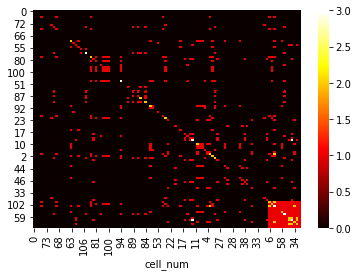

In [374]:
pw_df = nrPairwiseMaps.loc(axis=1)[('8089_d4_s1')]
sliced_df = pw_df.loc[:,40:59]
clusteredMap_CS, spec_cluster_CS = makeSelfCluster(sliced_df)
#print(clusteredMap_CS)
sns.heatmap(clusteredMap_CS, vmin=0, vmax=3, cmap=plt.get_cmap('hot'))


In [375]:
clus_num = np.zeros(2)
clus_size= np.zeros(2)
step1=0
CS_clus_inds = dict()
for clus in range(4): #Assume biclustering with 2 main clusters
    if np.equal(spec_cluster_CS.get_shape(clus)[0], spec_cluster_CS.get_shape(clus)[1]):
        clus_num[step1] = clus
        clus_size[step1] = spec_cluster_CS.get_shape(clus)[0]
        step1+=1
small_loc = clus_size.argmin()
large_loc = clus_size.argmax()
CS_clus_inds = spec_cluster_CS.get_indices(clus_num[small_loc].astype(int))[0]
CS_clus_inds

array([  5,   6,  16,  29,  34,  57,  58,  59,  60,  61,  95, 102, 107])

In [378]:
def cluster_maps_ali_mice(pw_df):
    sliced_df1 = pw_df.loc[:,0:19]
    clusteredMap_first20, spec_cluster_first20 = makeSelfCluster(sliced_df1)

    
    sliced_df2 = pw_df.loc[:,20:39]
    clusteredMap_second20, spec_cluster_second20 = makeSelfCluster(sliced_df2)
    
    return clusteredMap_first20,clusteredMap_second20

In [379]:
clusteredMap_ali24_1,clusteredMap_ali24_2 =cluster_maps_ali_mice(aliPairwiseMaps.loc(axis=1)[('ali24_d4_s1')])
clusteredMap_ali25_1,clusteredMap_ali25_2=cluster_maps_ali_mice(aliPairwiseMaps.loc(axis=1)[('ali25_d4_s1')])
clusteredMap_ali26_1,clusteredMap_ali26_2=cluster_maps_ali_mice(aliPairwiseMaps.loc(axis=1)[('ali26_d4_s1')])

### Supplemental figure for cluster maps

Text(283.055, 0.5, 'Number of Trials with Co-activity')

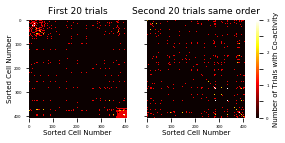

In [380]:
#Plotting for Figure Generation (Figure 4C - Squint/No Squint Cluster Comparisons Last Session - New)
#Font Details
label_size=7
tick_size=4
title_size=9
#Plot Scaling
cmin, cmax = [0, 3]
#Make Plots
fig, all_ax = plt.subplots(figsize=(4.1, 2), nrows=1, ncols=3) #(5.5, 2)
pick='hot'
ms_sel = 'ali24_d4_s1'

#First Plot
sel_ax1 = all_ax[0]
#Behavior for Both
#Cells of Interest
cur_maps1 = aliPairwiseMaps.loc(axis=1)[ms_sel].loc(axis=1)[0:19]
#Generate Cluster from All Sessions
blinkClusteredMap1, spec_cluster1 = makeSelfCluster_3(cur_maps1)
sns.heatmap(blinkClusteredMap1, ax=sel_ax1, vmin=cmin, vmax=cmax, cmap=plt.get_cmap(pick), cbar=False)
#Plot Additional Portions
Ncells1 = blinkClusteredMap1.shape[0]
sel_ax1.set_title('First 20 trials', fontsize=title_size)
sel_ax1.set_xticks(range(0,Ncells1,100))
sel_ax1.set_aspect('equal')
sel_ax1.set_xticklabels(range(0,Ncells1,100), rotation=0)
sel_ax1.tick_params(labelsize=tick_size)
sel_ax1.set_xlabel('Sorted Cell Number', fontsize=label_size, labelpad=1)
sel_ax1.set_yticks(range(0,Ncells1,100))
sel_ax1.set_yticklabels(range(0,Ncells1,100), rotation=0)
sel_ax1.set_ylabel('Sorted Cell Number', fontsize=label_size, labelpad=1)
sel_ax1.set_position([0.1, 0.15, 0.35, 0.68])

#Second Plot
sel_ax2 = all_ax[1]
cbar_ax = all_ax[2]

cur_maps2 = aliPairwiseMaps.loc(axis=1)[ms_sel].loc(axis=1)[20:39]
#Generate Cluster from All Sessions
blinkClusteredMap2 = makeOtherCluster(cur_maps2,spec_cluster1)
sns.heatmap(blinkClusteredMap2, ax=sel_ax2, vmin=cmin, vmax=cmax, cmap=plt.get_cmap(pick), cbar=True, cbar_ax=cbar_ax)
#Plot Additional Portions
Ncells2 = blinkClusteredMap2.shape[0]
sel_ax2.set_title('Second 20 trials same order', fontsize=title_size)
sel_ax2.set_xticks(range(0,Ncells2,100))
sel_ax2.set_aspect('equal')
sel_ax2.set_xticklabels(range(0,Ncells2,100), rotation=0)
sel_ax2.tick_params(labelsize=tick_size)
sel_ax2.set_xlabel('Sorted Cell Number', fontsize=label_size, labelpad=1)
sel_ax2.set_yticks(range(0,Ncells2,100))
sel_ax2.set_yticklabels('')
sel_ax2.set_position([0.5, 0.15, 0.35, 0.68])

#Colorbar Axes Changes
cbar_ax.set_position([0.88, 0.15, 0.01, 0.68])
cbar_ax.tick_params(labelsize=tick_size)
#cbar_ax.set_ticks([0,1,2,3])
cbar_ax.set_yticklabels(['0','','1','', '2','','3'])
cbar_ax.set_ylabel('Number of Trials with Co-activity', fontsize=label_size)

#plt.savefig('Late_day_same_order_2clusters_ali24.png', format='png',dpi=1200)

Text(283.055, 0.5, 'Number of Trials with Co-activity')

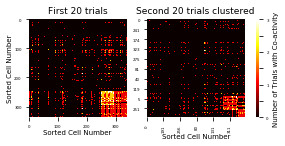

In [381]:
#Plotting for Figure Generation (Figure 4C - Squint/No Squint Cluster Comparisons Last Session - New)
#Font Details
label_size=7
tick_size=4
title_size=9
#Plot Scaling
cmin, cmax = [0, 3]
#Make Plots
fig, all_ax = plt.subplots(figsize=(4.1, 2), nrows=1, ncols=3) #(5.5, 2)
pick='hot'
ms_sel = 'ali25_d4_s1'

#First Plot
sel_ax1 = all_ax[0]
#Behavior for Both
#Cells of Interest
cur_maps1 = aliPairwiseMaps.loc(axis=1)[ms_sel].loc(axis=1)[0:19]
#Generate Cluster from All Sessions
blinkClusteredMap1, spec_cluster1 = makeSelfCluster_3(cur_maps1)
sns.heatmap(blinkClusteredMap1, ax=sel_ax1, vmin=cmin, vmax=cmax, cmap=plt.get_cmap(pick), cbar=False)
#Plot Additional Portions
Ncells1 = blinkClusteredMap1.shape[0]
sel_ax1.set_title('First 20 trials', fontsize=title_size)
sel_ax1.set_xticks(range(0,Ncells1,100))
sel_ax1.set_aspect('equal')
sel_ax1.set_xticklabels(range(0,Ncells1,100), rotation=0)
sel_ax1.tick_params(labelsize=tick_size)
sel_ax1.set_xlabel('Sorted Cell Number', fontsize=label_size, labelpad=1)
sel_ax1.set_yticks(range(0,Ncells1,100))
sel_ax1.set_yticklabels(range(0,Ncells1,100), rotation=0)
sel_ax1.set_ylabel('Sorted Cell Number', fontsize=label_size, labelpad=1)
sel_ax1.set_position([0.1, 0.15, 0.35, 0.68])

#Second Plot
sel_ax2 = all_ax[1]
cbar_ax = all_ax[2]

cur_maps2 = aliPairwiseMaps.loc(axis=1)[ms_sel].loc(axis=1)[20:39]
#Generate Cluster from All Sessions
blinkClusteredMap2,spec_cluster2 = makeSelfCluster_3(cur_maps2)
sns.heatmap(blinkClusteredMap2, ax=sel_ax2, vmin=cmin, vmax=cmax, cmap=plt.get_cmap(pick), cbar=True, cbar_ax=cbar_ax)
#Plot Additional Portions
Ncells2 = blinkClusteredMap2.shape[0]
sel_ax2.set_title('Second 20 trials clustered', fontsize=title_size)
sel_ax2.set_aspect('equal')
#sel_ax2.set_xticks(range(0,Ncells2,100))
#sel_ax2.set_xticklabels(range(0,Ncells2,100), rotation=0)
sel_ax2.tick_params(labelsize=tick_size)
sel_ax2.set_xlabel('Sorted Cell Number', fontsize=label_size, labelpad=1)
#sel_ax2.set_yticks(range(0,Ncells2,100))
#sel_ax2.set_yticklabels('')
sel_ax2.set_position([0.5, 0.15, 0.35, 0.68])

#Colorbar Axes Changes
cbar_ax.set_position([0.88, 0.15, 0.01, 0.68])
cbar_ax.tick_params(labelsize=tick_size)
#cbar_ax.set_ticks([0,1,2,3])
cbar_ax.set_yticklabels(['0','','1','', '2','','3'])
cbar_ax.set_ylabel('Number of Trials with Co-activity', fontsize=label_size)

#plt.savefig('Late_day_both_2clusters_ali25.png', format='png',dpi=1200)

### Centroids

In [382]:
def load_plus_centroid_masks_aliMice(mouse_number):
    selMouse, selDay, selSess = [[mouse_number], [4], [1]]
#Load ROI Data for Figure 3B
    selFolders, selFilenames = makeAliFilenames(selMouse, selDay, selSess)
    selFiles = combineFilenames(aliBase, selFolders, selFilenames)
    cur_roi, roiArrays = loadSelROIs(selFiles)
    x_centroid= []
    y_centroid =[]
    counter = np.arange(0,cur_roi.shape[0],1)
    for j in counter:
        binarymask_cell = cur_roi[j,:,:]
        count = (binarymask_cell==1).sum()
        x_c,y_c =np.argwhere(binarymask_cell==1).sum(0)/count
        x_centroid.append(x_c)
        y_centroid.append(y_c)
        ROI_Centroids = np.column_stack((x_centroid,y_centroid))
    return ROI_Centroids

In [383]:
centroids_ali24=load_plus_centroid_masks_aliMice(24)
centroids_ali25=load_plus_centroid_masks_aliMice(25)
centroids_ali26=load_plus_centroid_masks_aliMice(26)

Loading ROIs for ali24_d4_s1
Loading ROIs for ali25_d4_s1
Loading ROIs for ali26_d4_s1


In [386]:
def load_plus_centroid_masks_rMice(rMouse):
    rBase = '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/'
    rMice, rDays, rSessions = ([rMouse], [8], [1])
    rFolders, rFilenames = makeRebeccaFilenames(rMice, rDays, rSessions)
    rFiles = combineFilenames(rBase, rFolders, rFilenames)
    cur_roi, roiArrays = loadSelROIs(rFiles)
    x_centroid= []
    y_centroid =[]
    counter = np.arange(0,cur_roi.shape[0],1)
    for j in counter:
        binarymask_cell = cur_roi[j,:,:]
        count = (binarymask_cell==1).sum()
        x_c,y_c =np.argwhere(binarymask_cell==1).sum(0)/count
        x_centroid.append(x_c)
        y_centroid.append(y_c)
        ROI_Centroids = np.column_stack((x_centroid,y_centroid))
    return ROI_Centroids

In [387]:
centroids_2982=load_plus_centroid_masks_rMice('2982')
centroids_4540=load_plus_centroid_masks_rMice('4540')

Loading ROIs for 2982_d8_s1
Loading ROIs for 4540_d8_s1


In [392]:
def load_plus_centroid_masks_nrMice(nrMouse):
    nrBase ='/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/'
    nrMice, nrDays, nrSessions = ([nrMouse], [4], [1]) #Also have 2 as full imaging session.  Drop 2714 because of data quality
    nrFolders, nrFilenames = makeRebeccaFilenames(nrMice, nrDays, nrSessions)
    nrFiles = combineFilenames(nrBase, nrFolders, nrFilenames)
    cur_roi, roiArrays = loadSelROIs(nrFiles)
    x_centroid= []
    y_centroid =[]
    counter = np.arange(0,cur_roi.shape[0],1)
    for j in counter:
        binarymask_cell = cur_roi[j,:,:]
        count = (binarymask_cell==1).sum()
        x_c,y_c =np.argwhere(binarymask_cell==1).sum(0)/count
        x_centroid.append(x_c)
        y_centroid.append(y_c)
        ROI_Centroids = np.column_stack((x_centroid,y_centroid))
    return ROI_Centroids

In [393]:
centroids_2713=load_plus_centroid_masks_nrMice('2713')
centroids_2714=load_plus_centroid_masks_nrMice('2714')
centroids_2712= load_plus_centroid_masks_nrMice('2712')
centroids_8089=load_plus_centroid_masks_nrMice('8089')

Loading ROIs for 2713_d4_s1
Loading ROIs for 2714_d4_s1
Loading ROIs for 2712_d4_s1
Loading ROIs for 8089_d4_s1


## Looking at just active cell connections 

In [394]:
def make_networkmaps_active_cell_connections(centroids,clustered_map,active_cells):
    G1_f = nx.Graph()
    color_map=[]
    counter = np.arange(0,centroids.shape[0],1)
    for j in counter:
        G1_f.add_node(j+1,pos=centroids[j])
    pos=nx.get_node_attributes(G1_f,'pos')

    for node in G1_f:
            color_map.append('#A9A9A9')
    
    columns = active_cells


    # All connections 
    #symmetric andf diagonal also does not matter)
    for i in columns:
        for j in columns:
            if i>j and clustered_map.loc[i][j] >0:
                G1_f.add_edge(i+1,j+1,color=[1,.1,.1,0.5])
                       
    edges = G1_f.edges()
    colors = [G1_f[u][v]['color'] for u,v in edges]
   
   # nx.draw(G1_f,pos,node_color=color_map,edge_color=colors,with_labels=False,node_size=10,width=0.1)
    
    # Total edges 
    a = nx.number_of_edges(G1_f)
     
    # Total edge density in  graph
    b = nx.density(G1_f)
     
    return a,b,G1_f

In [395]:
def make_networkmaps_active_cell_connections_first20_plot(centroids,clustered_map,active_cells):
    G1_f = nx.Graph()
    color_map=[]
    counter = np.arange(0,centroids.shape[0],1)
    for j in counter:
        G1_f.add_node(j+1,pos=centroids[j])
    pos=nx.get_node_attributes(G1_f,'pos')

    for node in G1_f:
            color_map.append('#A9A9A9')
    
    columns = active_cells


    # All connections 
    #symmetric andf diagonal also does not matter)
    for i in columns:
        for j in columns:
            if i>j and clustered_map.loc[i][j] >0:
                G1_f.add_edge(i+1,j+1,color='#42CC5F')
                       
    edges = G1_f.edges()
    colors = [G1_f[u][v]['color'] for u,v in edges]
   
    nx.draw(G1_f,pos,node_color=color_map,edge_color=colors,with_labels=False,node_size=10,width=0.1)
    
    # Total edges 
    a = nx.number_of_edges(G1_f)
     
    # Total edge density in  graph
    b = nx.density(G1_f)
     
    return a,b,G1_f

In [396]:
def make_networkmaps_active_cell_connections_second20_plot(centroids,clustered_map,active_cells):
    G1_f = nx.Graph()
    color_map=[]
    counter = np.arange(0,centroids.shape[0],1)
    for j in counter:
        G1_f.add_node(j+1,pos=centroids[j])
    pos=nx.get_node_attributes(G1_f,'pos')

    for node in G1_f:
            color_map.append('#A9A9A9')
    
    columns = active_cells


    # All connections 
    #symmetric andf diagonal also does not matter)
    for i in columns:
        for j in columns:
            if i>j and clustered_map.loc[i][j] >0:
                G1_f.add_edge(i+1,j+1,color='#850C53')
                       
    edges = G1_f.edges()
    colors = [G1_f[u][v]['color'] for u,v in edges]
   
    nx.draw(G1_f,pos,node_color=color_map,edge_color=colors,with_labels=False,node_size=10,width=0.1)
    
    # Total edges 
    a = nx.number_of_edges(G1_f)
     
    # Total edge density in  graph
    b = nx.density(G1_f)
     
    return a,b,G1_f

In [397]:
# Function to overlay 

def make_networkmaps_colored_edges_active(centroids,CS_clustered_map,EX_clustered_map,active_cells):
    G1_f = nx.Graph()
    color_map=[]
    counter = np.arange(0,centroids.shape[0],1)
    for j in counter:
        G1_f.add_node(j+1,pos=centroids[j])
    pos=nx.get_node_attributes(G1_f,'pos')

    # All cells in black
    for node in G1_f: 
        color_map.append('#A9A9A9')
    
    columns = active_cells


    # All connections 
    #symmetric andf diagonal also does not matter
    for i in columns:
        for j in columns:
            # Connections in red for blink map
            
            if i>j and CS_clustered_map.loc[i][j] >0:
                G1_f.add_edge(i+1,j+1,color='#42CC5F')
            # Connections in blue for no blink map
            if i>j and EX_clustered_map.loc[i][j] >0:
                G1_f.add_edge(i+1,j+1,color='#850C53')
            if i>j and CS_clustered_map.loc[i][j] >0 and EX_clustered_map.loc[i][j] >0:
                G1_f.add_edge(i+1,j+1,color='#000000')
            
            
                        
    edges = G1_f.edges()
    colors = [G1_f[u][v]['color'] for u,v in edges]
    nx.draw(G1_f,pos,node_color=color_map,edge_color=colors,with_labels=False,node_size=10,width=0.1)
                       
    #nx.draw(G1_f,pos,node_color=color_map,edge_color='b',with_labels=False,node_size=20,width=0.1) 
    a = nx.number_of_edges(G1_f)
     
    # Total edge density in  graph
    b = nx.density(G1_f)
    
    return a,b,G1_f

In [398]:
# Function to overlay 

def make_networkmaps_colored_edges(centroids,CS_clustered_map,EX_clustered_map):
    G1_f = nx.Graph()
    color_map=[]
    counter = np.arange(0,centroids.shape[0],1)
    for j in counter:
        G1_f.add_node(j+1,pos=centroids[j])
    pos=nx.get_node_attributes(G1_f,'pos')

    # All cells in black
    for node in G1_f: 
        color_map.append('#A9A9A9')
    
    columns = list(CS_clustered_map)


    # All connections 
    #symmetric andf diagonal also does not matter
    for i in columns:
        for j in columns:
            # Connections in red for blink map
            
            if i>j and CS_clustered_map.loc[i][j] >0:
                G1_f.add_edge(i+1,j+1,color='#42CC5F')
            # Connections in blue for no blink map
            if i>j and EX_clustered_map.loc[i][j] >0:
                G1_f.add_edge(i+1,j+1,color='#850C53')
            if i>j and CS_clustered_map.loc[i][j] >0 and EX_clustered_map.loc[i][j] >0:
                G1_f.add_edge(i+1,j+1,color='#000000')
            
            
                        
    edges = G1_f.edges()
    colors = [G1_f[u][v]['color'] for u,v in edges]
    nx.draw(G1_f,pos,node_color=color_map,edge_color=colors,with_labels=False,node_size=10,width=0.1)
                       
    #nx.draw(G1_f,pos,node_color=color_map,edge_color='b',with_labels=False,node_size=20,width=0.1) 
    a = nx.number_of_edges(G1_f)
     
    # Total edge density in  graph
    b = nx.density(G1_f)
    
    return a,b,G1_f

## Rebecca's mice first 20 vs second 20 

In [399]:
def cluster_maps(pw_df):
    
    sliced_df1 = pw_df.loc[:,0:19]
    clusteredMap_second20, spec_cluster_second20 = makeSelfCluster(sliced_df1)
    clus_num = np.zeros(2)
    clus_size= np.zeros(2)
    step1=0
    CS_clus_inds_second20 = dict()
    for clus in range(4): #Assume biclustering with 2 main clusters
        if np.equal(spec_cluster_second20.get_shape(clus)[0], spec_cluster_second20.get_shape(clus)[1]):
            clus_num[step1] = clus
            clus_size[step1] = spec_cluster_second20.get_shape(clus)[0]
            step1+=1
    small_loc = clus_size.argmin()
    large_loc = clus_size.argmax()
    CS_clus_inds_second20 = spec_cluster_second20.get_indices(clus_num[small_loc].astype(int))[0]
    
    sliced_df2 = pw_df.loc[:,20:39]
    clusteredMap_last20, spec_cluster_last20 = makeSelfCluster(sliced_df2)
    step1=0
    CS_clus_inds_last20 = dict()
    for clus in range(4): #Assume biclustering with 2 main clusters
        if np.equal(spec_cluster_last20.get_shape(clus)[0], spec_cluster_last20.get_shape(clus)[1]):
            clus_num[step1] = clus
            clus_size[step1] = spec_cluster_last20.get_shape(clus)[0]
            step1+=1
    small_loc = clus_size.argmin()
    large_loc = clus_size.argmax()
    CS_clus_inds_last20 = spec_cluster_last20.get_indices(clus_num[small_loc].astype(int))[0]

    return clusteredMap_second20,clusteredMap_last20, CS_clus_inds_second20, CS_clus_inds_last20

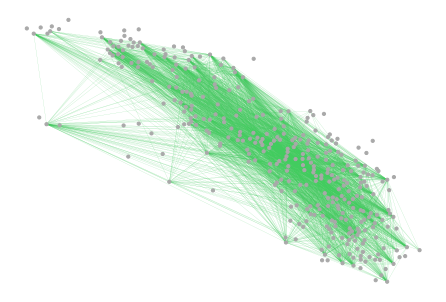

In [400]:
make_networkmaps_active_cell_connections_first20_plot(centroids_ali25,clusteredMap_ali25_1,Active_cells_ali25_late)
plt.savefig('first20_network_ali25.png',format='png',dpi=1200)


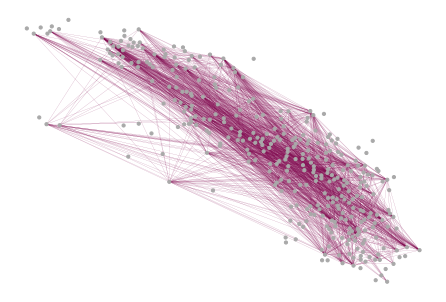

In [401]:
make_networkmaps_active_cell_connections_second20_plot(centroids_ali25,clusteredMap_ali25_2,Active_cells_ali25_late)
plt.savefig('second20_network_ali25.png',format='png',dpi=1200)

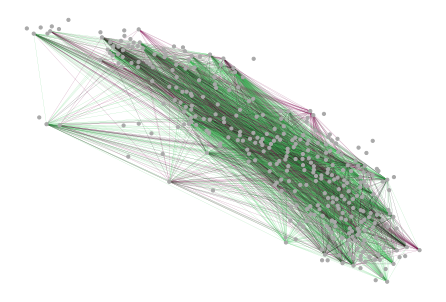

In [402]:
make_networkmaps_colored_edges_active(centroids_ali25,clusteredMap_ali25_1,clusteredMap_ali25_2,Active_cells_ali25_late)
plt.savefig('overlaid_network_ali25.png',format='png',dpi=1200)

In [403]:

clusteredMap_2982_1,clusteredMap_2982_2,CS_clus_inds_2982_1, CS_clus_inds_2982_2 =cluster_maps(rPairwiseMaps.loc(axis=1)[('2982_d8_s1')])
clusteredMap_4540_1,clusteredMap_4540_2,CS_clus_inds_4540_1, CS_clus_inds_4540_2 =cluster_maps(rPairwiseMaps.loc(axis=1)[('4540_d8_s1')])

clusteredMap_2712_1,clusteredMap_2712_2,CS_clus_inds_2712_1, CS_clus_inds_2712_2 =cluster_maps(nrPairwiseMaps.loc(axis=1)[('2712_d4_s1')])
clusteredMap_2713_1,clusteredMap_2713_2,CS_clus_inds_2713_1, CS_clus_inds_2713_2 =cluster_maps(nrPairwiseMaps.loc(axis=1)[('2713_d4_s1')])
clusteredMap_2714_1,clusteredMap_2714_2,CS_clus_inds_2714_1, CS_clus_inds_2714_2 =cluster_maps(nrPairwiseMaps.loc(axis=1)[('2714_d4_s1')])
clusteredMap_8089_1,clusteredMap_8089_2,CS_clus_inds_8089_1, CS_clus_inds_8089_2 =cluster_maps(nrPairwiseMaps.loc(axis=1)[('8089_d4_s1')])

In [404]:
a_24,b_24,G_24=make_networkmaps_active_cell_connections(centroids_ali24,clusteredMap_ali24_1,Active_cells_ali24_late)
a_25,b_25,G_25=make_networkmaps_active_cell_connections(centroids_ali25,clusteredMap_ali25_1,Active_cells_ali25_late)
a_26,b_26,G_26=make_networkmaps_active_cell_connections(centroids_ali26,clusteredMap_ali26_1,Active_cells_ali26_late)

a_2982,b_2982,G_2982=make_networkmaps_active_cell_connections(centroids_2982,clusteredMap_2982_1,Active_cells_2982_late)
a_4540,b_4540,G_4540=make_networkmaps_active_cell_connections(centroids_4540,clusteredMap_4540_1,Active_cells_4540_late)

a_2712,b_2712,G_2712=make_networkmaps_active_cell_connections(centroids_2712,clusteredMap_2712_1,Active_cells_2712_late)
a_2713,b_2713,G_2713=make_networkmaps_active_cell_connections(centroids_2713,clusteredMap_2713_1,Active_cells_2713_late)
a_2714,b_2714,G_2714=make_networkmaps_active_cell_connections(centroids_2714,clusteredMap_2714_1,Active_cells_2714_late)
a_8089,b_8089,G_8089=make_networkmaps_active_cell_connections(centroids_8089,clusteredMap_8089_1,Active_cells_8089_late)

In [405]:
a1_24,b1_24,H_24=make_networkmaps_active_cell_connections(centroids_ali24,clusteredMap_ali24_2,Active_cells_ali24_late)
a1_25,b1_25,H_25=make_networkmaps_active_cell_connections(centroids_ali25,clusteredMap_ali25_2,Active_cells_ali25_late)
a1_26,b1_26,H_26=make_networkmaps_active_cell_connections(centroids_ali26,clusteredMap_ali26_2,Active_cells_ali26_late)

a1_2982,b1_2982,H_2982=make_networkmaps_active_cell_connections(centroids_2982,clusteredMap_2982_2,Active_cells_2982_late)
a1_4540,b1_4540,H_4540=make_networkmaps_active_cell_connections(centroids_4540,clusteredMap_4540_2,Active_cells_4540_late)

a1_2712,b1_2712,H_2712=make_networkmaps_active_cell_connections(centroids_2712,clusteredMap_2712_2,Active_cells_2712_late)
a1_2713,b1_2713,H_2713=make_networkmaps_active_cell_connections(centroids_2713,clusteredMap_2713_2,Active_cells_2713_late)
a1_2714,b1_2714,H_2714=make_networkmaps_active_cell_connections(centroids_2714,clusteredMap_2714_2,Active_cells_2714_late)
a1_8089,b1_8089,H_8089=make_networkmaps_active_cell_connections(centroids_8089,clusteredMap_8089_2,Active_cells_8089_late)

In [407]:
common_edges_4540 = quantify_shared_edges(G_4540,H_4540)
common_edges_2982 = quantify_shared_edges(G_2982,H_2982)
common_edges_2712 = quantify_shared_edges(G_2712,H_2712)
common_edges_2713 = quantify_shared_edges(G_2713,H_2713)
common_edges_2714 = quantify_shared_edges(G_2714,H_2714)
common_edges_8089 = quantify_shared_edges(G_8089,H_8089)
common_edges_24 = quantify_shared_edges(G_24,H_24)
common_edges_25 = quantify_shared_edges(G_25,H_25)
common_edges_26 = quantify_shared_edges(G_26,H_26)
common_edges_late_day_first20=[common_edges_24,common_edges_25,common_edges_26,common_edges_2982,common_edges_4540,common_edges_2712,common_edges_2713,common_edges_2714,common_edges_8089]

In [408]:
print(n_edges(G_24,H_24))
print(n_edges(G_25,H_25))
print(n_edges(G_26,H_26))
print(n_edges(G_2982,H_2982))
print(n_edges(G_4540,H_4540))
print(n_edges(G_2712,H_2712))
print(n_edges(G_2713,H_2713))
print(n_edges(G_2714,H_2714))
print(n_edges(G_8089,H_8089))

(773, 791, 110)
(2592, 1538, 637)
(725, 1087, 187)
(63, 65, 18)
(35, 86, 3)
(86, 88, 11)
(192, 90, 31)
(5, 5, 2)
(21, 9, 1)


In [409]:
n_common_edges_late_day_first20=n_edges(G_24,H_24)[2]+n_edges(G_25,H_25)[2]+n_edges(G_26,H_26)[2]+n_edges(G_2982,H_2982)[2]+n_edges(G_4540,H_4540)[2]+n_edges(G_2712,H_2712)[2]+n_edges(G_2713,H_2713)[2]+n_edges(G_2714,H_2714)[2]+n_edges(G_8089,H_8089)[2]
n_common_edges_late_day_first20

1000

In [410]:
n_total_edges_late_day_first20=total_edges(G_24,H_24)+total_edges(G_25,H_25)+total_edges(G_26,H_26)+total_edges(G_2982,H_2982)+total_edges(G_4540,H_4540)+total_edges(G_2712,H_2712)+total_edges(G_2713,H_2713)+total_edges(G_2714,H_2714)+total_edges(G_8089,H_8089)
n_total_edges_late_day_first20

7251

In [411]:
n_non_common_edges_late_day_first20=n_total_edges_late_day_first20-n_common_edges_late_day_first20
n_non_common_edges_late_day_first20

6251

In [412]:
# Fisher's exact test 
table =[(n_common_edges_late_day_first20,n_common_edges_last_day),(n_non_common_edges_late_day_first20,n_non_common_edges_last_day)]
print(table)
ss.fisher_exact(table)

[(1000, 222), (6251, 3979)]


(2.867288981510706, 3.7163682938410106e-50)

In [413]:
n_common_edges_late_day_first20/n_total_edges_late_day_first20*100,n_common_edges_last_day/n_total_edges_last_day*100

(13.791201213625707, 5.284456081885265)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


       Late day edges  CS/EX edges
ali24        7.565337     3.848268
ali25       18.236473     2.898551
ali26       11.507692     5.529332
2982        16.363636     3.773585
4540         2.542373     2.803738
2712         6.748466    13.291139
2713        12.350598     9.714286
2714        25.000000     3.448276
8089         3.448276    11.111111


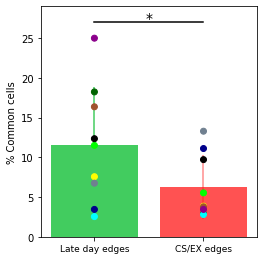

In [414]:
df = {'Late day edges' : pd.Series(common_edges_late_day_first20, index=['ali24', 'ali25', 'ali26','2982','4540','2712','2713','2714','8089']),'CS/EX edges' : pd.Series(common_edges_CS_EX_active_only, index=['ali24', 'ali25', 'ali26','2982','4540','2712','2713','2714','8089'])}
shared_edges = pd.DataFrame(df)
shared_edges = pd.DataFrame(df)
print(shared_edges)
ax=makePairedScatterPlot_modified_colors(shared_edges,(4,4),['#42CC5F',[1,.1,.1,0.5]])
plt.plot([0,1],[27,27], 'k')
ax.set_ylim([0,29])
plt.text(0.5,27, '*', horizontalalignment='center', fontsize=14)
#plt.savefig('common_edges_2.png',format='png')
plt.savefig('common_edges_final.eps',format='eps')

## Day before Extinction heatmaps

In [415]:
def makeAliFilenames(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                if ((m_day != 2) | (m_sess != 2)): #Skip d2_s2.  Only do d5_s2
                    mouse_dir = 'ali{}_d{}_s{}/'.format(m_num, m_day, m_sess)
                    directories.append(mouse_dir)
                    filenames[mouse_dir] = 'trace_kyleFinal_matched_BinaryVideo.hdf5'
                   
    return directories, filenames

In [416]:
def makeRebeccaFilenames(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                mouse_dir = '{}/{}_d{}_s{}/'.format(m_num, m_num, m_day, m_sess)
                directories.append(mouse_dir)
                filenames[mouse_dir] = 'trace_kyleFinal_BinaryVideo.hdf5'
    return directories, filenames

In [417]:
def combineFilenames(base, dirs, fnDict):
    #Combine Filenames into list for multiple directories with a common base.  fnDict is a dictionary of the filename for each directory
    outFiles = []
    for d in dirs:
        outFiles.append(os.path.join(base+d+fnDict[d]))
    return outFiles

In [418]:
#Initialize Input Values
#Ali Mice
aliBase = '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/'
aliMice, aliDays, aliSessions = ([24,25,26], [4], [1,2])
aliFolders, aliFilenames = makeAliFilenames(aliMice, aliDays, aliSessions)
aliFiles = combineFilenames(aliBase, aliFolders, aliFilenames)
#Rebecca Mice
rBase = '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/'

rMice, rDays, rSessions = ([2982,4540], [8], [1])
rFolders, rFilenames = makeRebeccaFilenames(rMice, rDays, rSessions)
rFiles = combineFilenames(rBase, rFolders, rFilenames)
#New Rebecca Mic_
nrBase = '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/'
nrMice, nrDays, nrSessions = ([2712, 2713,2714,8089], [4], [1]) #Also have 2 as full imaging session.  Drop 2714 because of data quality
nrFolders, nrFilenames = makeRebeccaFilenames(nrMice, nrDays, nrSessions)
nrFiles = combineFilenames(nrBase, nrFolders, nrFilenames)
#Combine All Filenames into one List
allFiles = aliFiles + rFiles + nrFiles
print(allFiles)

['/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali24_d4_s1/trace_kyleFinal_matched_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali24_d4_s2/trace_kyleFinal_matched_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali25_d4_s1/trace_kyleFinal_matched_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali25_d4_s2/trace_kyleFinal_matched_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali26_d4_s1/trace_kyleFinal_matched_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata_2/Kyle_Hansen/AliEyeBlink/ali26_d4_s2/trace_kyleFinal_matched_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/2982/2982_d8_s1/trace_kyleFinal_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata_2/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/4540/4540_d8_s1/trace_kyleFinal_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata_2/eng_research_ha

In [419]:
aliSounds = loadFiles(aliFiles, 'binSounds', whichData='Ali')
rSounds = loadFiles(rFiles, 'binSounds', whichData='Rebecca')
nrSounds = loadFiles(nrFiles, 'binSounds', whichData='Rebecca', fixedSize=39500)
sound_traces = pd.concat([aliSounds,rSounds,nrSounds], axis=1)
#sound_traces = pd.concat([rSounds,nrSounds], axis=1)

In [420]:
aliPuffs = loadFiles(aliFiles, 'binPuffs', whichData='Ali')
rPuffs = loadFiles(rFiles, 'binPuffs', whichData='Rebecca')
nrPuffs = loadFiles(nrFiles, 'binPuffs', whichData='Rebecca', fixedSize=39500)
puff_traces = pd.concat([aliPuffs,rPuffs,nrPuffs], axis=1)

In [421]:
aliTrials = loadFiles(aliFiles, 'binTrials', whichData='Ali')
rTrials = loadFiles(rFiles, 'binTrials', whichData='Rebecca')
nrTrials = loadFiles(nrFiles, 'binTrials', whichData='Rebecca', fixedSize=39500)
#trial_traces = pd.concat([rTrials,nrTrials], axis=1)
trial_traces = pd.concat([aliTrials,rTrials,nrTrials], axis=1)

In [422]:
aliTraces = loadTraces(aliFiles, 'Ali')
nrTraces = loadTraces(nrFiles, 'Rebecca')
rTraces = loadTraces(rFiles, 'Rebecca')

In [423]:
print('Ali Blocks')
aliTraceBlocks, aliTraceNoBlocks = makeTraceTrialBlocks(aliTraces, aliSounds) 
print('Rebecca Blocks')
rTraceBlocks, rTraceNoBlocks = makeTraceTrialBlocks(rTraces, rSounds)
print('New Rebecca Blocks')
nrTraceBlocks, nrTraceNoBlocks = makeTraceTrialBlocks(nrTraces, nrSounds)

Ali Blocks
ali24_d4_s1
ali24_d4_s2
ali25_d4_s1
ali25_d4_s2
ali26_d4_s1
ali26_d4_s2
Rebecca Blocks
2982_d8_s1
4540_d8_s1
New Rebecca Blocks
2712_d4_s1
2713_d4_s1
2714_d4_s1
8089_d4_s1


In [424]:
#Colormap Creation from Other Colormap
full_gist = cm.get_cmap('gist_stern',256)
topgist_cm = ListedColormap(full_gist(np.linspace(0.25, 1, 256)))

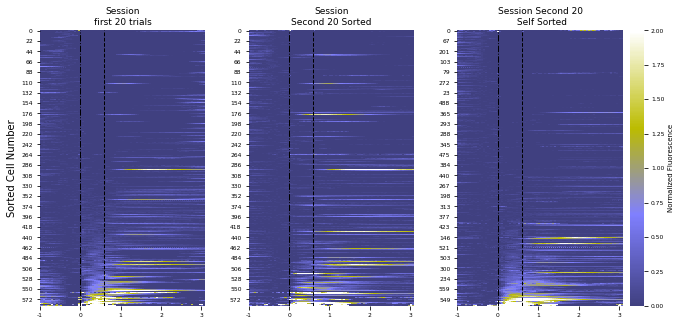

In [425]:
#Plotting for Figure Generation (Figure 2Cii - Day 5 Last Day and Extinction Comparisons)
#aliTraceBlocks should come from aliMatched, not matched traces in the section "Make Temporal Blocks for Averaged Plots"
#Fixed Plot Parameters
cmax = 2
cmin = 0
start_ind=20 #40
end_ind=32 #52
sort_start=40 #40
sort_end=52 #80
#Font Details
label_size=7
tick_size=6
title_size=9
#Make Plots
fig, all_ax = plt.subplots(figsize=(10, 5.1), nrows=1, ncols=3) #(5, 2.5)

#First Plot
sel_ax1 = all_ax[0]
Nfirst=20
block_df=aliTraceBlocks['ali26_d4_s1'].loc[:, aliTraceBlocks['ali26_d4_s1'].columns.get_level_values('trial').isin(range(Nfirst))]
cur_block1=block_df.groupby(level=['cell_num'], axis=1).mean()
bef_interval_mean = cur_block1.loc[28:39,:].mean(axis=0)
cur_block1=cur_block1-bef_interval_mean
sort_inds1=np.argsort(cur_block1.loc[sort_start:sort_end,:].mean())

cur_sorted1 = cur_block1.loc[20:101,sort_inds1]
cur_sorted1.columns = range(cur_block1.shape[1]) #Renumber Columns
sns.heatmap(cur_sorted1.T, ax=sel_ax1, vmin=cmin, vmax=cmax, cbar=False, cmap=topgist_cm)
sel_ax1.axvline(x=start_ind, linestyle='-.', color='k', linewidth=1)
sel_ax1.axvline(x=end_ind, linestyle='--', color='k', linewidth=1)
sel_ax1.set_xticks(range(0,81,20))
sel_ax1.set_xticklabels(range(-1,4,1), rotation=0)
sel_ax1.tick_params(labelsize=tick_size)
sel_ax1.set_xlabel('', fontsize=label_size, labelpad=1)
#sel_ax1.set_xlabel('Time (sec)', fontsize=label_size, labelpad=1)
sel_ax1.set_ylabel('Sorted Cell Number')
sel_ax1.set_title('Session\nfirst 20 trials', fontsize=title_size)
sel_ax1.set_position([0.1, 0.125, 0.23, 0.75])

#Middle Plot
sel_ax2 = all_ax[1]
Ntrials = 40
block_df=aliTraceBlocks['ali26_d4_s1'].loc[:, aliTraceBlocks['ali26_d4_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
cur_block2=block_df.groupby(level=['cell_num'], axis=1).mean()
bef_interval_mean = cur_block2.loc[28:39,:].mean(axis=0)
cur_block2=cur_block2-bef_interval_mean

cur_sorted2 = cur_block2.loc[20:101,sort_inds1]
cur_sorted2.columns = cur_sorted1.columns #Renumber Columns to match First
sns.heatmap(cur_sorted2.T, ax=sel_ax2, vmin=cmin, vmax=cmax, cbar=False, cmap=topgist_cm)
sel_ax2.axvline(x=start_ind, linestyle='-.', color='k', linewidth=1)
sel_ax2.axvline(x=end_ind, linestyle='--', color='k', linewidth=1)
sel_ax2.set_xticks(range(0,81,20))
sel_ax2.set_xticklabels(range(-1,4,1), rotation=0)
sel_ax2.tick_params(labelsize=tick_size)
sel_ax2.set_xlabel('', fontsize=label_size, labelpad=1)
#sel_ax2.set_xlabel('Time (sec)', fontsize=label_size, labelpad=1)
sel_ax2.set_title('Session\nSecond 20 Sorted', fontsize=title_size)
sel_ax2.set_position([0.39, 0.125, 0.23, 0.75])

# Last plot
sel_ax3 = all_ax[2]
cur_block3 = cur_sorted2
sort_inds3 = np.argsort(cur_block3.loc[sort_start:sort_end,:].mean())
cur_sorted3 = cur_block3.loc[:,sort_inds3]
sns.heatmap(cur_sorted3.T, ax=sel_ax3, vmin=cmin, vmax=cmax, cmap=topgist_cm)
sel_ax3.axvline(x=start_ind, linestyle='-.', color='k', linewidth=1)
sel_ax3.axvline(x=end_ind, linestyle='--', color='k', linewidth=1)
sel_ax3.set_xticks(range(0,81,20))
sel_ax3.set_xticklabels(range(-1,4,1), rotation=0)
sel_ax3.tick_params(labelsize=tick_size)
sel_ax3.set_xlabel('', fontsize=label_size, labelpad=1)
#sel_ax3.set_xlabel('Time (sec)', fontsize=label_size, labelpad=1)
sel_ax3.set_title('Session Second 20\n Self Sorted', fontsize=title_size)
sel_ax3.set_position([0.68, 0.125, 0.23, 0.75])

#Colorbar Font Sizing
cbar_axes=fig.axes[3]
cbar_axes.tick_params(labelsize=tick_size)
cbar_axes.set_ylabel('Normalized Fluorescence', fontsize=label_size)
cbar_axes.set_position([0.92, 0.125, 0.08, 0.75])

#plt.savefig('ali26_daybefore_avg_sorting.png', bbox_inches='tight', format='png', dpi=1200, transparent=True)
plt.savefig('ali26_daybefore_avg_sorting.eps', format='eps')

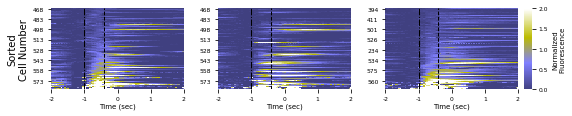

In [426]:
#Plotting for Figure Generation Test 2 after fixing Sorting(Figure 2Ciii - Day 5 Last Day and Extinction Comparisons Zoom In)
#Fixed Plot Parameters
#Fixed Parameters
pctShow = 0.2
pctPick = 1-pctShow
#Make Plots
fig, all_ax = plt.subplots(figsize=(8, 1.5), nrows=1, ncols=3) #(5, 0.75)

#First Plot
indPick1 = int(np.floor(pctPick*cur_sorted1.shape[1]))
sel_ax1 = all_ax[0]
sns.heatmap(cur_sorted1.iloc[:,indPick1:].T, ax=sel_ax1, vmin=cmin, vmax=cmax, cbar=False, cmap=topgist_cm)
sel_ax1.axvline(x=start_ind, linestyle='-.', color='k', linewidth=1)
sel_ax1.axvline(x=end_ind, linestyle='--', color='k', linewidth=1)
sel_ax1.set_xticks(range(0,201,20))
sel_ax1.set_xticklabels(range(-2,9,1), rotation=0)
sel_ax1.tick_params(labelsize=tick_size)
sel_ax1.set_xlim([0, 80])
sel_ax1.set_xlabel('Time (sec)', fontsize=label_size, labelpad=1)
sel_ax1.set_ylabel('Sorted\nCell Number')
sel_ax1.set_position([0.1, 0.125, 0.23, 0.75])

#Middle Plot
indPick2 = int(np.floor(pctPick*cur_sorted2.shape[1]))
sel_ax2 = all_ax[1]
sns.heatmap(cur_sorted2.iloc[:,indPick2:].T, ax=sel_ax2, vmin=cmin, vmax=cmax, cbar=False, cmap=topgist_cm)
sel_ax2.axvline(x=start_ind, linestyle='-.', color='k', linewidth=1)
sel_ax2.axvline(x=end_ind, linestyle='--', color='k', linewidth=1)
sel_ax2.set_xticks(range(0,201,20))
sel_ax2.set_xticklabels(range(-2,9,1), rotation=0)
sel_ax2.tick_params(labelsize=tick_size)
sel_ax2.set_xlim([0, 80])
sel_ax2.set_xlabel('Time (sec)', fontsize=label_size, labelpad=1)
sel_ax2.set_position([0.39, 0.125, 0.23, 0.75])

#Last Plot
indPick3 = int(np.floor(pctPick*cur_sorted3.shape[1]))
sel_ax3 = all_ax[2]
sns.heatmap(cur_sorted3.iloc[:,indPick3:].T, ax=sel_ax3, vmin=cmin, vmax=cmax, cmap=topgist_cm)
sel_ax3.axvline(x=start_ind, linestyle='-.', color='k', linewidth=1)
sel_ax3.axvline(x=end_ind, linestyle='--', color='k', linewidth=1)
sel_ax3.set_xticks(range(0,201,20))
sel_ax3.set_xticklabels(range(-2,9,1), rotation=0)
sel_ax3.tick_params(labelsize=tick_size)
sel_ax3.set_xlim([0, 80])
sel_ax3.set_xlabel('Time (sec)', fontsize=label_size, labelpad=1)
sel_ax3.set_position([0.68, 0.125, 0.23, 0.75])

#Colorbar Font Sizing
cbar_axes=fig.axes[3]
cbar_axes.tick_params(labelsize=tick_size)
cbar_axes.set_ylabel('Normalized\nFluorescence', fontsize=label_size)
cbar_axes.set_position([0.92, 0.125, 0.08, 0.75])
cbar_axes.set_aspect(10)

#plt.savefig('ali26_d4_Comparison_Zoom_subtracted.png', bbox_inches='tight', format='png', dpi=1200, transparent=True)
plt.savefig('ali26_d4_Comparison_Zoom_subtracted.eps',format='eps')